# Exploratory Data Analysis

# Problem Statement

Here at SolaraTech, I'm tackling a crucial problem: how to squeeze the most power out of our solar panels day in, day out.

The goal is to create models that can accurately peg our daily solar efficiency into three buckets: Low, Medium, and High.

If I nail this, we'll have a smart AI model that can look at tomorrow's weather and tell us how our panels will perform.

---

## Data Ingestion

The analysis starts by ingesting data from SQLite databases using a custom `DataIngestion` class. 

This class does the following:

1. Connects to a SQLite database
2. Retrieves the name of the first table in the database
3. Fetches all data from that table into a pandas DataFrame

This class is then used to load our weather and air quality data.

In [1]:
import sqlite3
import pandas as pd

class DataIngestion():
    def __init__ (self, db_path):
        self.db_path = db_path

    def get_df(self):
        # establish a connection with the database using sqlite3
        conn = sqlite3.connect(self.db_path)

        # obtain table name
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        table_name = cursor.fetchone()[0]        

        # query to fetch the data and load the data into a pandas DataFrame
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql_query(query, conn)

        cursor.close()
        conn.close()

        return df
  
weather_ingestor  = DataIngestion('data/weather.db')
air_quality_ingestor = DataIngestion('data/air_quality.db')

# Load weather and air quality data
weather_df = weather_ingestor.get_df()
air_quality_df = air_quality_ingestor .get_df()


# Data Overview
Firstly let's take an overview of the columns, data types, and non-null counts for each dataset.

In [2]:
air_quality_df.head()

data_ref        date pm25_north pm25_south  \
0  4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea  01/04/2014         20         16   
1  c9d3c825-fd94-4e61-a4bc-2cf0f2208de0  02/04/2014         18         14   
2  6d445ffb-d4c2-4f94-a27e-224fabe46d10  03/04/2014         12         12   
3  7a404c50-710f-451a-9a42-a66bb783a3d0  04/04/2014         --          -   
4  0d3194a7-ad1a-456e-9bf8-b1bae730977b  05/04/2014         18         19   

  pm25_east pm25_west pm25_central psi_north psi_south psi_east psi_west  \
0        18        23           19        58        56       57       66   
1         -        22           16        57        53       54       61   
2        10        14           10        55        53       52       59   
3        24        19           25        58        57       55        -   
4        21        13           17        64        64       66        -   

  psi_central  
0          59  
1          56  
2          54  
3          56  
4          66

In [3]:
weather_df

data_ref        date  \
0     4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea  01/04/2014   
1     c9d3c825-fd94-4e61-a4bc-2cf0f2208de0  02/04/2014   
2     6d445ffb-d4c2-4f94-a27e-224fabe46d10  03/04/2014   
3     7a404c50-710f-451a-9a42-a66bb783a3d0  04/04/2014   
4     0d3194a7-ad1a-456e-9bf8-b1bae730977b  05/04/2014   
...                                    ...         ...   
3512  cf6a7375-6049-4098-9612-43dcbef0b343  21/11/2015   
3513  cdc5b607-ee26-4a9c-a4ac-bd4f8b9f18bc  10/06/2020   
3514  9f9533f5-41c1-4b5a-9b3f-a3f57ee3647a  27/10/2021   
3515  07afbfbb-3e93-467e-afa6-8efd4aaca1e0  03/06/2021   
3516  c3a06585-7b5e-41e6-8926-f5291bd8e1c6  15/08/2016   

     Daily Rainfall Total (mm) Highest 30 Min Rainfall (mm)  \
0                            -                            2   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                         23.4                         15.2   
...                        ...                          ...   
3512                         0                            0   
3513                      13.4                           11   
3514                       3.8                           --   
3515                       1.2                          1.2   
3516                         0                            0   

     Highest 60 Min Rainfall (mm) Highest 120 Min Rainfall (mm)  \
0                               2                             2   
1                               0                            --   
2                               0                             0   
3                               0                             0   
4                            17.2                          17.4   
...                           ...                           ...   
3512                            0                             0   
3513                         12.6                          13.4   
3514                          3.8                           3.8   
3515                          1.2                           1.2   
3516                            0                             0   

     Min Temperature (deg C) Maximum Temperature (deg C)  \
0                       28.4                        32.4   
1                       28.8                        32.6   
2                       29.3                          --   
3                       28.6                        32.4   
4                       26.4                          28   
...                      ...                         ...   
3512                    27.6                        31.7   
3513                    29.4                           -   
3514                    29.1                        33.1   
3515                    29.6                        32.5   
3516                    29.3                        32.3   

     Min Wind Speed (km/h) Max Wind Speed (km/h)  Sunshine Duration (hrs)  \
0                      7.5                  25.9                     8.07   
1                       --                  33.1                     7.57   
2                       --                  43.2                     6.72   
3                      7.4                  33.1                     7.55   
4                      5.4                  28.1                     5.27   
...                    ...                   ...                      ...   
3512                   6.2                  28.8                     7.91   
3513                  14.4                    50                     4.52   
3514                   7.3                  29.6                     7.59   
3515                  11.1                     -                     6.68   
3516                  10.8                  32.4                     7.61   

      Cloud Cover (%)  Wet Bulb Temperature (deg F)  Relative Humidity (%)  \
0                18.0                         -59.3

In [4]:
air_quality_df.describe()


data_ref        date pm25_north  \
count                                   3875        3875       3836   
unique                                  3197        3197         74   
top     a5f11eb5-41b1-4c1c-bae5-9d536ee2e58c  13/09/2014         11   
freq                                       5           5        308   

       pm25_south pm25_east pm25_west pm25_central psi_north psi_south  \
count        3836      3836      3836         3836      3836      3836   
unique         86        76        85           68       112       113   
top            10         9         8           10        52        52   
freq          290       313       318          322       261       236   

       psi_east psi_west psi_central  
count      3836     3836        3836  
unique      108      117         105  
top          52       52          53  
freq        260      208         224

In [5]:
print(air_quality_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_ref      3875 non-null   object
 1   date          3875 non-null   object
 2   pm25_north    3836 non-null   object
 3   pm25_south    3836 non-null   object
 4   pm25_east     3836 non-null   object
 5   pm25_west     3836 non-null   object
 6   pm25_central  3836 non-null   object
 7   psi_north     3836 non-null   object
 8   psi_south     3836 non-null   object
 9   psi_east      3836 non-null   object
 10  psi_west      3836 non-null   object
 11  psi_central   3836 non-null   object
dtypes: object(12)
memory usage: 363.4+ KB
None


In [6]:
weather_df.describe()

Sunshine Duration (hrs)  Cloud Cover (%)  Wet Bulb Temperature (deg F)  \
count              3501.000000      3501.000000                   3517.000000   
mean                  7.018320        28.682376                     52.946062   
std                   1.389904        20.788299                     25.842174   
min                   0.000000         2.000000                    -60.700000   
25%                   6.710000        17.000000                     58.400000   
50%                   7.400000        22.000000                     58.900000   
75%                   7.840000        30.000000                     59.400000   
max                   9.150000       100.000000                     61.800000   

       Relative Humidity (%)  Air Pressure (hPa)  
count            3517.000000         3517.000000  
mean               97.366761         1008.668467  
std                 5.043705            3.513724  
min                68.600000          998.000000  
25%                96.700000         1006.000000  
50%               100.000000         1009.000000  
75%               100.000000         1011.000000  
max               100.000000         1020.000000

In [7]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       3517 non-null   object 
 1   date                           3517 non-null   object 
 2   Daily Rainfall Total (mm)      3517 non-null   object 
 3   Highest 30 Min Rainfall (mm)   3517 non-null   object 
 4   Highest 60 Min Rainfall (mm)   3517 non-null   object 
 5   Highest 120 Min Rainfall (mm)  3517 non-null   object 
 6   Min Temperature (deg C)        3517 non-null   object 
 7   Maximum Temperature (deg C)    3517 non-null   object 
 8   Min Wind Speed (km/h)          3517 non-null   object 
 9   Max Wind Speed (km/h)          3502 non-null   object 
 10  Sunshine Duration (hrs)        3501 non-null   float64
 11  Cloud Cover (%)                3501 non-null   float64
 12  Wet Bulb Temperature (deg F)   3517 non-null   f

In [8]:
weather_df.dtypes

data_ref                          object
date                              object
Daily Rainfall Total (mm)         object
Highest 30 Min Rainfall (mm)      object
Highest 60 Min Rainfall (mm)      object
Highest 120 Min Rainfall (mm)     object
Min Temperature (deg C)           object
Maximum Temperature (deg C)       object
Min Wind Speed (km/h)             object
Max Wind Speed (km/h)             object
Sunshine Duration (hrs)          float64
Cloud Cover (%)                  float64
Wet Bulb Temperature (deg F)     float64
Relative Humidity (%)            float64
Air Pressure (hPa)                 int64
Dew Point Category                object
Wind Direction                    object
Daily Solar Panel Efficiency      object
dtype: object

In [9]:
air_quality_df.dtypes

data_ref        object
date            object
pm25_north      object
pm25_south      object
pm25_east       object
pm25_west       object
pm25_central    object
psi_north       object
psi_south       object
psi_east        object
psi_west        object
psi_central     object
dtype: object

In [6]:
print("Missing values in Weather Data:")
print(weather_df.isnull().sum())

Missing values in Weather Data:
data_ref                          0
date                              0
Daily Rainfall Total (mm)         0
Highest 30 Min Rainfall (mm)      0
Highest 60 Min Rainfall (mm)      0
Highest 120 Min Rainfall (mm)     0
Min Temperature (deg C)           0
Maximum Temperature (deg C)       0
Min Wind Speed (km/h)             0
Max Wind Speed (km/h)            15
Sunshine Duration (hrs)          16
Cloud Cover (%)                  16
Wet Bulb Temperature (deg F)      0
Relative Humidity (%)             0
Air Pressure (hPa)                0
Dew Point Category                0
Wind Direction                    0
Daily Solar Panel Efficiency      0
dtype: int64


In [7]:
print("\nMissing values in Air Quality Data:")
print(air_quality_df.isnull().sum())


Missing values in Air Quality Data:
data_ref         0
date             0
pm25_north      39
pm25_south      39
pm25_east       39
pm25_west       39
pm25_central    39
psi_north       39
psi_south       39
psi_east        39
psi_west        39
psi_central     39
dtype: int64


In [11]:
# Print the set of unique string values in the column
weather_string_columns = [
    'Dew Point Category','Wind Direction', 'Daily Solar Panel Efficiency'    
]

for string_cols in weather_string_columns:
    unique_strings = set(weather_df[string_cols].unique())
    print(f"Unique strings in {string_cols} before : {unique_strings}")

Unique strings in Dew Point Category before : {'Normal', 'MODERATE', 'HIGH', 'Below Average', 'High', 'high', 'Extreme', 'VERY LOW', 'VL', 'High Level', 'L', 'Very Low', 'Minimal', 'Very High', 'low', 'LOW', 'H', 'Moderate', 'moderate', 'VH', 'VERY HIGH', 'M', 'very low', 'very high', 'Low'}
Unique strings in Wind Direction before : {'north', 'NE.', 'WEST', 'northwest', 'Southward', 'east', 'NE', 'N', 'SE', 'W.', 'E', 'NW.', 'SOUTHEAST', 'Northward', 'NORTH', 'SW', 'S', 'NORTHEAST', 'southeast', 'west', 'W', 'NW', 'EAST', 'S.', 'northeast', 'E.', 'N.', 'south', 'SOUTH', 'SW.', 'NORTHWEST', 'SE.'}
Unique strings in Daily Solar Panel Efficiency before : {'Low', 'Medium', 'High'}


## Key Observations
From the above overview, it is obvious that:
1. The dtypes of the variables are all objects, and are likely strings. -> Will need to change the types to integers and floats for numerical data, date into datetime data and string data as strings
2. There are missing numerical values denoted by '-' and '--'. -> Will need to convert them into NA and so further preprocessing. The missing values are then imputed using the mean for numerical data and using the mode for categorical data.
3. For the string columns of Dew Point Category and Wind Direction, the strings must be cleaned and be consistent (with casing and shortforms) -> Will need to clean the strings
4. For rainfall, the standard deviation is extremely large. This could be because there could be massive rainfall or no rainfall at all. I shall not remove outliers for rainfall columns.


# Data Cleaning

After ingesting our weather and air quality data, the next crucial step is to clean and preprocess the data. I use a custom `Cleaning` class to perform various cleaning operations on our datasets. Let's walk through the cleaning process


The Cleaning class takes three arguments:

1. The DataFrame to be cleaned
2. A list of numeric columns
3. A list of string columns

Upon initialization, the class automatically performs data cleaning, removes outliers, and checks the cleaned data.

In [31]:
import pandas as pd
import numpy as np

class Cleaning:
    def __init__(self, df, numeric_cols, string_cols):
        self.df = df
        self.numeric_cols = numeric_cols
        self.string_cols = string_cols

        self.clean_data()  # Perform data cleaning
        self.check_data()  # Check data after cleaning

    def clean_data(self):
        self.remove_duplicates()
        self.df = self.clean_numerical_data()
        self.df = self.clean_string_data()
        self.df = self.clean_date_data()
        self.remove_outliers()
        self.clean_missing_data()  
        print("Data cleaned!")

    def remove_duplicates(self):
        self.df.drop_duplicates(subset='data_ref', inplace=True)

    def clean_missing_data(self):
        self.df = self.impute_numerical_data()
        self.df = self.impute_string_data()
        return self.df

    def clean_numerical_data(self):
        try:
            for numeric_col in self.numeric_cols:
                # Convert the column to numeric, coercing errors to NaN
                self.df[numeric_col] = pd.to_numeric(self.df[numeric_col], errors='coerce')

                # Convert to integer if there are no NaN values
                if self.df[numeric_col].isnull().sum() == 0:
                    self.df[numeric_col] = self.df[numeric_col].astype(int)
        except Exception as e:
            print(f"An error occurred in cleaning numerical data: {e}")
        
        return self.df 

    def clean_string_data(self):
        # Replace placeholders with NaN
        self.df = self.df.replace(['-', '--'], np.nan)

        # Clean dew point categories
        def clean_dew_point(category):
            category = str(category).lower().strip()
            dew_point_map = {
                'vh': 'Very High', 'very high': 'Very High',
                'high': 'High', 'h': 'High',
                'moderate': 'Moderate', 'medium': 'Moderate', 'm': 'Moderate',
                'low': 'Low', 'l': 'Low',
                'very low': 'Very Low', 'vl': 'Very Low', 'below average': 'Very Low',
                'extreme': 'Extreme', 'minimal': 'Very Low', 'normal': 'Moderate'
            }
            return dew_point_map.get(category, np.nan)

        # Clean wind direction categories
        def clean_wind_direction(direction):
            direction = str(direction).lower().strip()
            direction_map = {
                'n': 'North', 'north': 'North', 'n.': 'North', 'northward': 'North',
                's': 'South', 'south': 'South', 's.': 'South', 'southward': 'South',
                'e': 'East', 'east': 'East', 'e.': 'East',
                'w': 'West', 'west': 'West', 'w.': 'West',
                'ne': 'North East', 'northeast': 'North East', 'ne.': 'North East',
                'nw': 'North West', 'northwest': 'North West', 'nw.': 'North West',
                'se': 'South East', 'southeast': 'South East', 'se.': 'South East',
                'sw': 'South West', 'southwest': 'South West', 'sw.': 'South West'
            }
            return direction_map.get(direction, np.nan)

        try:
            if 'Dew Point Category' in self.df.columns:
                self.df['Dew Point Category'] = self.df['Dew Point Category'].apply(clean_dew_point)

            if 'Wind Direction' in self.df.columns:
                self.df['Wind Direction'] = self.df['Wind Direction'].apply(clean_wind_direction)

        except KeyError as e:
            print(f"Key error: {e}")

        return self.df  

    # Cleans date column date
    def clean_date_data(self):
        
        if 'date' in self.df.columns: 
            try:
                self.df['date'] = pd.to_datetime(self.df['date'], format='%d/%m/%Y')
            except Exception as e:
                print(f"An error occurred while converting date: {e}")

        return self.df  
    # Removes outlier using IQR method
    def remove_outliers(self):
        print("Removing outliers...")
        for col in self.numeric_cols:
            if col not in rainfall_columns:
                Q1 = self.df[col].quantile(0.25)
                Q3 = self.df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                # Remove outliers
                self.df = self.df[(self.df[col] >= lower_bound) & (self.df[col] <= upper_bound)]
            
    # Impute numerical data using the mean
    def impute_numerical_data(self):
        for col in self.numeric_cols:
            # Fill missing values with the mean for numeric columns
            self.df[col] = self.df[col].fillna(self.df[col].mean())

            # Round the column values to 1 decimal place after filling missing values
            self.df[col] = self.df[col].round(1)

        return self.df  
    # Impute categorical data using mode
    def impute_string_data(self):
        for col in self.string_cols:
            # Fill missing values with the mode for string columns
            if not self.df[col].isnull().all(): 
                self.df[col]= self.df[col].fillna(self.df[col].mode()[0])
        return self.df  

    # Performs checks on df to see if missing values exist and categories are cleaned
    def check_data(self):
        print("Checking data...")
        all_numeric = True
        non_numeric_counts = {}

        # Check for non-numeric values in numeric columns
        for numeric_col in self.numeric_cols:
            non_numeric_values = self.df[numeric_col][self.df[numeric_col].isna() | self.df[numeric_col].isnull()]
            non_numeric_counts[numeric_col] = len(non_numeric_values)
            
            if non_numeric_counts[numeric_col] > 0:
                all_numeric = False
                print(f"Non-numeric values found in {numeric_col}: {non_numeric_counts[numeric_col]} occurrences")
                print(f"Sample of non-numeric values: {set(non_numeric_values.head())}")

        if all_numeric:
            print("No non-numeric values found in numeric columns.")
        else:
            print("Non-numeric values found in some numeric columns.")

        for string_col in self.string_cols:
            unique_strings = set(self.df[string_col].unique())
            print(f"Unique Strings in {string_col} after cleaning: {unique_strings}")
        print("********************************************************")

rainfall_columns = [
    'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 
    'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)'

]

weather_numeric_columns = [
    'Daily Rainfall Total (mm)', 'Highest 30 Min Rainfall (mm)', 
    'Highest 60 Min Rainfall (mm)', 'Highest 120 Min Rainfall (mm)', 
    'Min Temperature (deg C)', 'Maximum Temperature (deg C)', 
    'Min Wind Speed (km/h)', 'Max Wind Speed (km/h)', 
    'Sunshine Duration (hrs)', 'Cloud Cover (%)', 
    'Wet Bulb Temperature (deg F)', 'Relative Humidity (%)', 
    'Air Pressure (hPa)'
]

weather_string_columns = [
    'Dew Point Category', 'Wind Direction', 'Daily Solar Panel Efficiency'    
]

air_quality_numeric_columns = [
    'pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central', 
    'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central'
]

air_quality_string_columns = []

# Create cleaner objects
weather_cleaner = Cleaning(weather_df, weather_numeric_columns, weather_string_columns)
air_quality_cleaner = Cleaning(air_quality_df, air_quality_numeric_columns, air_quality_string_columns)



Removing outliers...
Data cleaned!
Checking data...
No non-numeric values found in numeric columns.
Unique Strings in Dew Point Category after cleaning: {'Low', 'Extreme', 'Very Low', 'High', 'Moderate', 'Very High'}
Unique Strings in Wind Direction after cleaning: {'North', 'North West', 'North East', 'South West', 'West', 'South', 'South East', 'East'}
Unique Strings in Daily Solar Panel Efficiency after cleaning: {'High', 'Low', 'Medium'}
********************************************************
Removing outliers...
Data cleaned!
Checking data...
No non-numeric values found in numeric columns.
********************************************************


In [13]:
print(weather_cleaner.df.dtypes, air_quality_cleaner.df.dtypes)

data_ref                                 object
date                             datetime64[ns]
Daily Rainfall Total (mm)               float64
Highest 30 Min Rainfall (mm)            float64
Highest 60 Min Rainfall (mm)            float64
Highest 120 Min Rainfall (mm)           float64
Min Temperature (deg C)                 float64
Maximum Temperature (deg C)             float64
Min Wind Speed (km/h)                   float64
Max Wind Speed (km/h)                   float64
Sunshine Duration (hrs)                 float64
Cloud Cover (%)                         float64
Wet Bulb Temperature (deg F)              int32
Relative Humidity (%)                     int32
Air Pressure (hPa)                        int32
Dew Point Category                       object
Wind Direction                           object
Daily Solar Panel Efficiency             object
dtype: object data_ref                object
date            datetime64[ns]
pm25_north             float64
pm25_south             float6

In [32]:
air_quality_cleaner.df.head()

data_ref       date  pm25_north  pm25_south  \
0   4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea 2014-04-01        20.0        16.0   
2   6d445ffb-d4c2-4f94-a27e-224fabe46d10 2014-04-03        12.0        12.0   
6   92ef8e57-7949-4b5f-8e70-ed3deb883060 2014-04-07        12.0        12.0   
11  e7c7d092-32c4-4775-8d75-6d4b50295ef2 2014-04-12        19.0        14.0   
17  7aa77391-40ac-49d3-b5dc-893a8c6c09dd 2014-04-18        23.0        12.0   

    pm25_east  pm25_west  pm25_central  psi_north  psi_south  psi_east  \
0        18.0       23.0          19.0       58.0       56.0      57.0   
2        10.0       14.0          10.0       55.0       53.0      52.0   
6        15.0       14.0          10.0       47.0       42.0      51.0   
11       21.0       16.0          16.0       59.0       57.0      61.0   
17       16.0       19.0          17.0       68.0       59.0      61.0   

    psi_west  psi_central  
0       66.0         59.0  
2       59.0         54.0  
6       46.0         47.0  
11      56.0         57.0  
17      67.0         63.0

In [33]:
weather_cleaner.df.head()

data_ref       date  \
3   7a404c50-710f-451a-9a42-a66bb783a3d0 2014-04-04   
10  b617992d-2d16-4ec7-8463-c51a7a7583fd 2014-04-11   
11  e7c7d092-32c4-4775-8d75-6d4b50295ef2 2014-04-12   
12  cd66147d-b481-4e94-9e81-1c3624282865 2014-04-13   
14  a40a6c76-6d72-4e1a-81b9-faef3ab79c85 2014-04-15   

    Daily Rainfall Total (mm)  Highest 30 Min Rainfall (mm)  \
3                         0.0                           0.0   
10                        2.8                           1.4   
11                        0.9                           1.4   
12                        0.0                           0.0   
14                        0.0                           0.0   

    Highest 60 Min Rainfall (mm)  Highest 120 Min Rainfall (mm)  \
3                            0.0                            0.0   
10                           2.6                            2.8   
11                           2.8                            0.8   
12                           0.8                            0.0   
14                           0.0                            0.0   

    Min Temperature (deg C)  Maximum Temperature (deg C)  \
3                      28.6                         32.4   
10                     27.5                         33.0   
11                     26.8                         30.2   
12                     28.5                         33.5   
14                     28.5                         33.4   

    Min Wind Speed (km/h)  Max Wind Speed (km/h)  Sunshine Duration (hrs)  \
3                     7.4                   33.1                      7.6   
10                    6.1                   34.6                      7.2   
11                    5.0                   24.1                      7.4   
12                    8.3                   30.6                      7.9   
14                    7.9                   33.1                      7.6   

    Cloud Cover (%)  Wet Bulb Temperature (deg F)  Relative Humidity (%)  \
3              20.0                            59                    100   
10             37.0                            58                    100   
11             35.0                            58                    100   
12             16.0                            59                    100   
14             13.0                            59                     97   

    Air Pressure (hPa) Dew Point Category Wind Direction  \
3                 1011          Very High           West   
10                1006               High     North East   
11                1005           Moderate     South East   
12                1010          Very High     North West   
14                1006               High           East   

   Daily Solar Panel Efficiency  
3                        Medium  
10                       Medium  
11                          Low  
12                       Medium  
14                       Medium

From the above, it can be seen that the dtypes have been changed and the data has been cleaned. I shall now merge the datasets on the unique data_ref id as well as date.

In [34]:
# Merge datasets on 'data_ref' and 'date'
df = pd.merge(weather_cleaner.df, air_quality_cleaner.df, on=['data_ref', 'date'])

In [36]:
df.head()

data_ref       date  Daily Rainfall Total (mm)  \
0  e7c7d092-32c4-4775-8d75-6d4b50295ef2 2014-04-12                        0.9   
1  7aa77391-40ac-49d3-b5dc-893a8c6c09dd 2014-04-18                        0.0   
2  29b0b0a3-bdba-49da-9714-193c5f063488 2014-05-03                        0.0   
3  6da5d020-653a-4d02-8e0c-5309a4896a6d 2014-05-11                        0.0   
4  d51745cf-799a-484b-b32f-a427b0652af9 2014-05-24                        0.0   

   Highest 30 Min Rainfall (mm)  Highest 60 Min Rainfall (mm)  \
0                           1.4                           2.8   
1                           0.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.7                           0.0   

   Highest 120 Min Rainfall (mm)  Min Temperature (deg C)  \
0                            0.8                     26.8   
1                            0.0                     28.2   
2                            0.0                     29.6   
3                            0.8                     29.0   
4                            0.0                     28.4   

   Maximum Temperature (deg C)  Min Wind Speed (km/h)  Max Wind Speed (km/h)  \
0                         30.2                    5.0                   24.1   
1                         30.9                    6.4                   29.2   
2                         33.7                   10.3                   29.2   
3                         33.6                    6.3                   37.8   
4                         32.6                    9.8                   34.6   

   ...  pm25_north  pm25_south  pm25_east  pm25_west  pm25_central psi_north  \
0  ...        19.0        14.0       21.0       16.0          16.0      59.0   
1  ...        23.0        12.0       16.0       19.0          17.0      68.0   
2  ...        11.0         8.0        9.0       12.0          10.0      52.0   
3  ...        18.0        14.0       19.0       20.0          18.0      57.0   
4  ...        18.0        17.0       11.0       17.0          13.0      59.0   

  psi_south psi_east  psi_west  psi_central  
0      57.0     61.0      56.0         57.0  
1      59.0     61.0      67.0         63.0  
2      46.0     43.0      54.0         47.0  
3      53.0     55.0      58.0         55.0  
4      56.0     54.0      57.0         56.0  

[5 rows x 28 columns]

---

# EDA

After cleaning our weather and air quality data, I performed an in-depth Exploratory Data Analysis using a custom `EDA` class. This class implements various methods for univariate, bivariate, and multivariate analysis, as well as time series analysis. Let's walk through each component of our EDA process

1. The `univariate_analysis` method provides a comprehensive view of individual variables.
2. The `bivariate_analysis` method explores relationships between pairs of variables.
3. The `multivariate_analysis` method explores insights into relationships among multiple variables
4. The `time_series_analysis` method focuses on temporal patterns in the data

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

class EDA:
    def __init__(self, df):
        self.df = df
        self.dew_point_order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']
        self.solar_efficiency_order = ['Low', 'Medium', 'High']

    def univariate_analysis(self, column):
        
        plt.figure(figsize=(12, 6))
        if column == 'Dew Point Category':
            sns.countplot(data=self.df, x=column, order=self.dew_point_order)
        elif self.df[column].dtype == 'object':
            sns.countplot(data=self.df, x=column, order=self.df[column].value_counts().index)
        else:
            sns.histplot(data=self.df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # summary statistics for variables 
        print(f"Summary Statistics for {column}:")
        if self.df[column].dtype == 'object':
            if column == 'Dew Point Category':
                print(self.df[column].value_counts().reindex(self.dew_point_order))
            else:
                print(self.df[column].value_counts())

            print(f"\nUnique values: {self.df[column].nunique()}")
            print(f"Mode: {self.df[column].mode()[0]}")
        else:
            print(self.df[column].describe())
    
    def bivariate_analysis(self, feature, target='Daily Solar Panel Efficiency'):
        df_copy = self.df.copy()

        plt.figure(figsize=(12, 6))
        
        feature_data = df_copy[feature]
        target_data = df_copy[target]
        
        if feature_data.dtype.name == 'object':
            if target_data.dtype.name != 'object':
                order = self.dew_point_order if feature == 'Dew Point Category' else None
                sns.boxplot(data=df_copy, x=feature, y=target, order=order)
                plt.title(f'{target} by {feature}')
            else:
                sns.heatmap(pd.crosstab(feature_data, target_data), annot=True, fmt='d', cmap='YlGnBu')
                plt.title(f'Heatmap of {feature} vs {target}')
        else:
            # Group by feature and target to calculate size
            grouped = df_copy.groupby([feature, target]).size().reset_index(name='counts')

            # Scatter plot with sizes based on counts
            sns.scatterplot(
                data=grouped,
                x=feature,
                y=target,
                size='counts',
                sizes=(20, 200),  # Adjust point size range if needed
                legend=False
            )
            plt.title(f'{target} vs {feature}')
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Add correlation calculation for numeric features
        if feature_data.dtype.name != 'object' and target_data.dtype.name != 'object':
            correlation = feature_data.corr(target_data)
            print(f"Correlation between {feature} and {target}: {correlation:.2f}")
            

    def multivariate_analysis(self):
        # Ordinal encoding for 'Dew Point Category'
        self.df['Dew Point Category Numeric'] = self.df['Dew Point Category'].map(
            {category: idx for idx, category in enumerate(self.dew_point_order)}
        )
        
        # Ordinal encoding for 'Daily Solar Panel Efficiency'
        self.df['Solar Efficiency Numeric'] = self.df['Daily Solar Panel Efficiency'].map(
            {category: idx for idx, category in enumerate(self.solar_efficiency_order)}
        )
        
        # Correlation heatmap
        plt.figure(figsize=(20, 16))
        numeric_df = self.df.select_dtypes(include=[np.number])
        correlation_matrix = numeric_df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
        plt.title('Correlation Heatmap of Numeric Variables (including Encoded Categorical Variables)')
        plt.tight_layout()
        plt.show()

    def time_series_analysis(self, column, date_column='date'):
        """
        Plots the autocorrelation of the specified column.
        
        Args:
            column (str): The name of the column to analyze.
            date_column (str): The name of the column containing dates. Default is 'date'.
        """
        # Ensure the date column is in datetime format and set it as the index
        df_copy = self.df.copy()
        if date_column in df_copy.columns:
            df_copy[date_column] = pd.to_datetime(df_copy[date_column])
            df_copy.set_index(date_column, inplace=True)

        # Check if the column exists
        if column not in df_copy.columns:
            raise ValueError(f"The column '{column}' does not exist in the DataFrame.")

        # Plot the autocorrelation
        plt.figure(figsize=(15, 8))
        autocorrelation_plot(df_copy[column])
        plt.title(f'Autocorrelation Plot for {column}')
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.tight_layout()
        plt.show()

eda = EDA(df)


## Univariate Analysis

A distribution plot (histogram for numeric variables, count plot for categorical variables), and summary statistics is printed

For numeric variables I shall print descriptive statistics

For categorical variables, I shall print value counts, number of unique values, and mode

Univariate Analysis


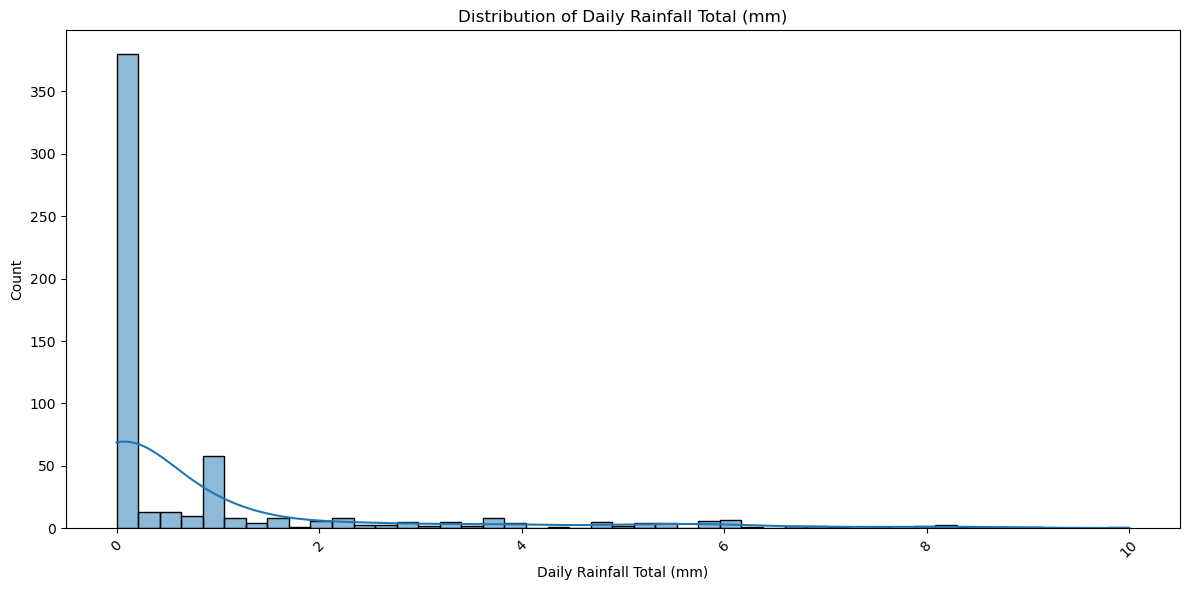

Summary Statistics for Daily Rainfall Total (mm):
count    586.000000
mean       0.899317
std        1.806020
min        0.000000
25%        0.000000
50%        0.000000
75%        0.900000
max       10.000000
Name: Daily Rainfall Total (mm), dtype: float64


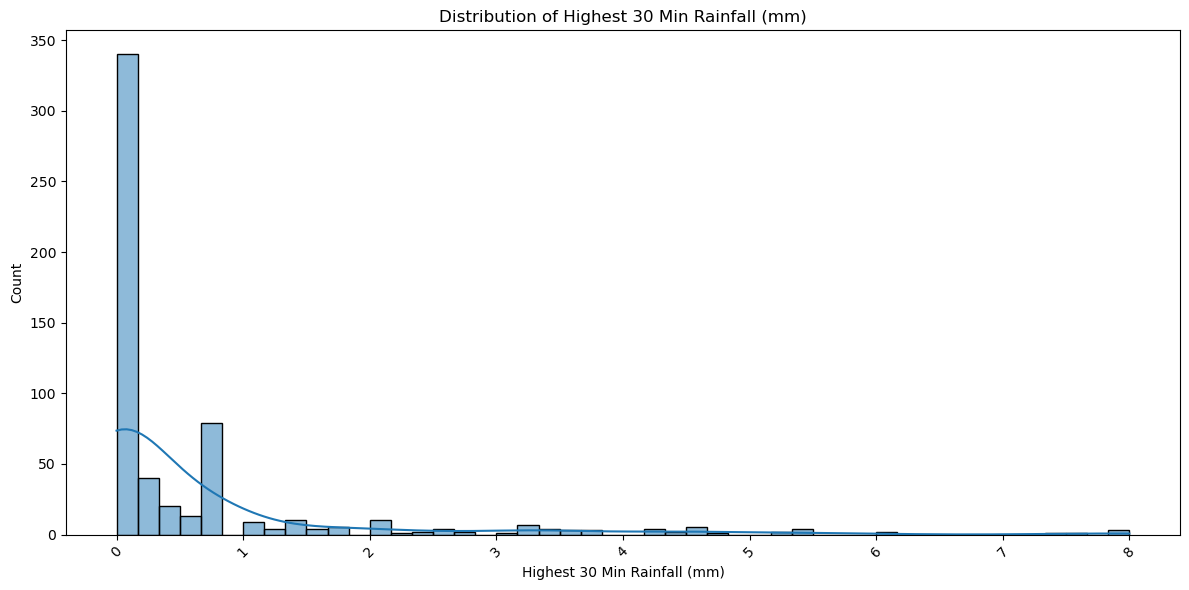

Summary Statistics for Highest 30 Min Rainfall (mm):
count    586.000000
mean       0.621502
std        1.293078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.700000
max        8.000000
Name: Highest 30 Min Rainfall (mm), dtype: float64


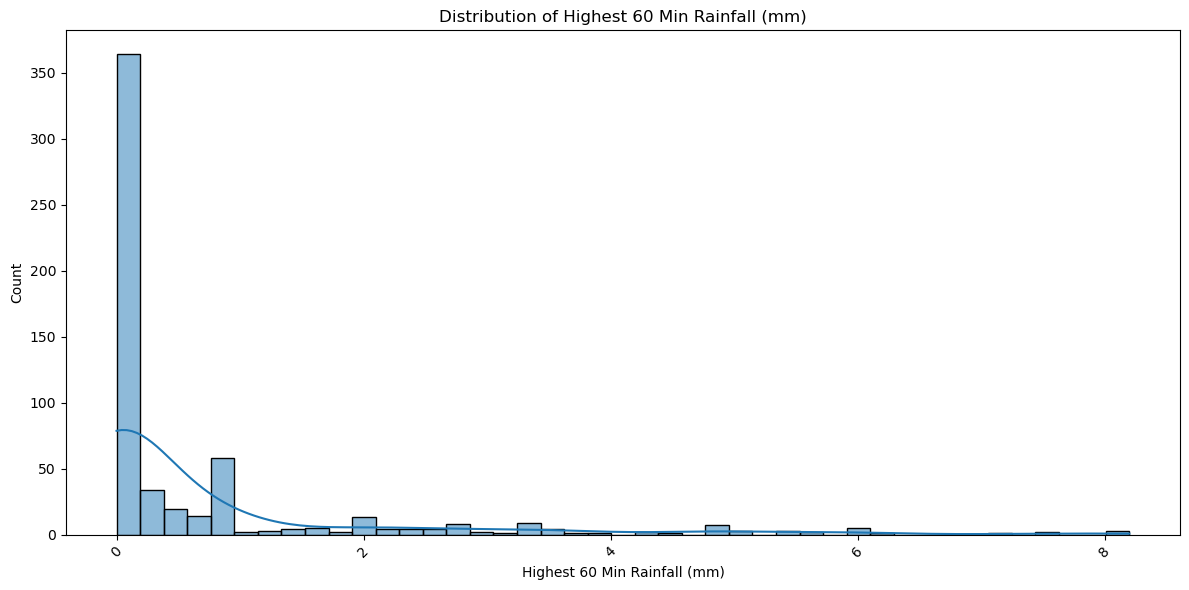

Summary Statistics for Highest 60 Min Rainfall (mm):
count    586.000000
mean       0.688055
std        1.449985
min        0.000000
25%        0.000000
50%        0.000000
75%        0.800000
max        8.200000
Name: Highest 60 Min Rainfall (mm), dtype: float64


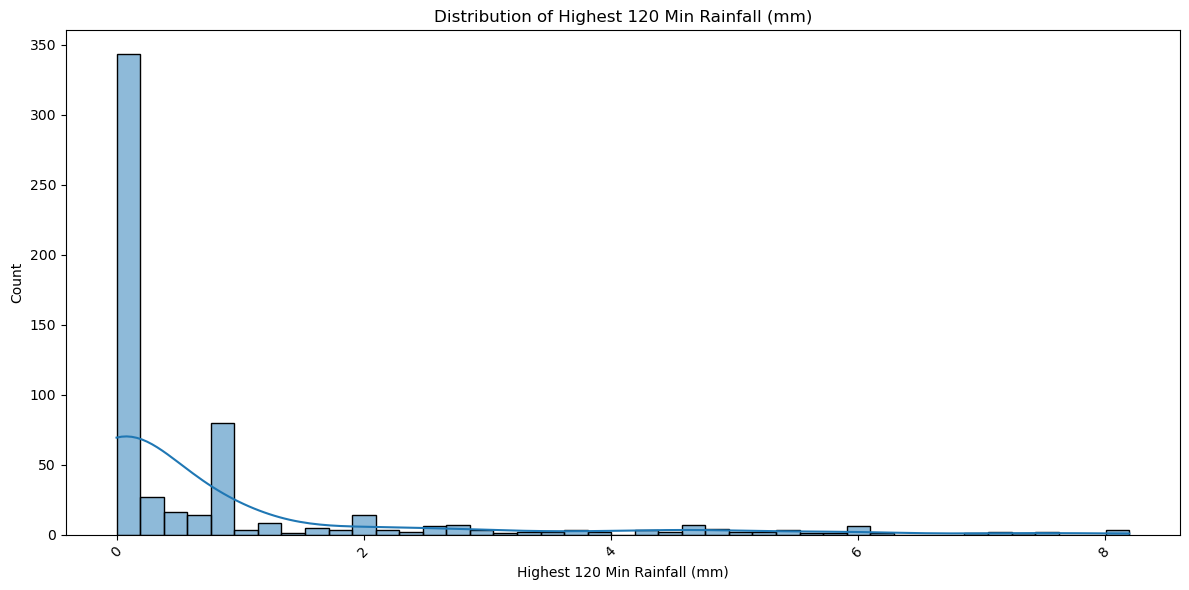

Summary Statistics for Highest 120 Min Rainfall (mm):
count    586.000000
mean       0.790785
std        1.568444
min        0.000000
25%        0.000000
50%        0.000000
75%        0.800000
max        8.200000
Name: Highest 120 Min Rainfall (mm), dtype: float64


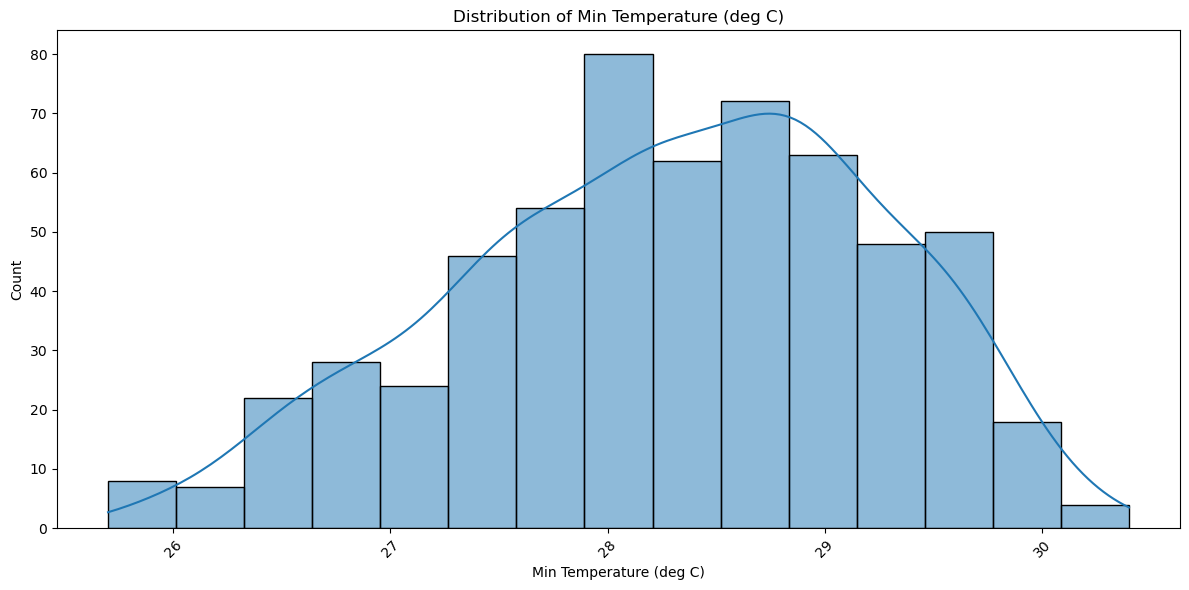

Summary Statistics for Min Temperature (deg C):
count    586.000000
mean      28.289420
std        0.958359
min       25.700000
25%       27.600000
50%       28.400000
75%       29.000000
max       30.400000
Name: Min Temperature (deg C), dtype: float64


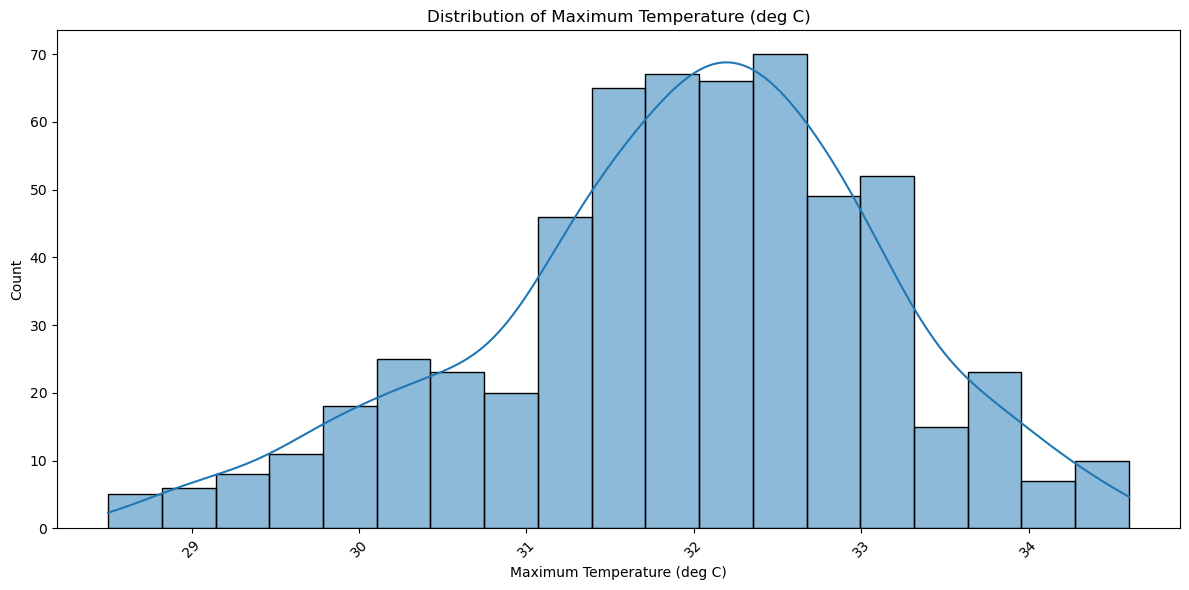

Summary Statistics for Maximum Temperature (deg C):
count    586.000000
mean      31.934642
std        1.176658
min       28.500000
25%       31.300000
50%       32.000000
75%       32.700000
max       34.600000
Name: Maximum Temperature (deg C), dtype: float64


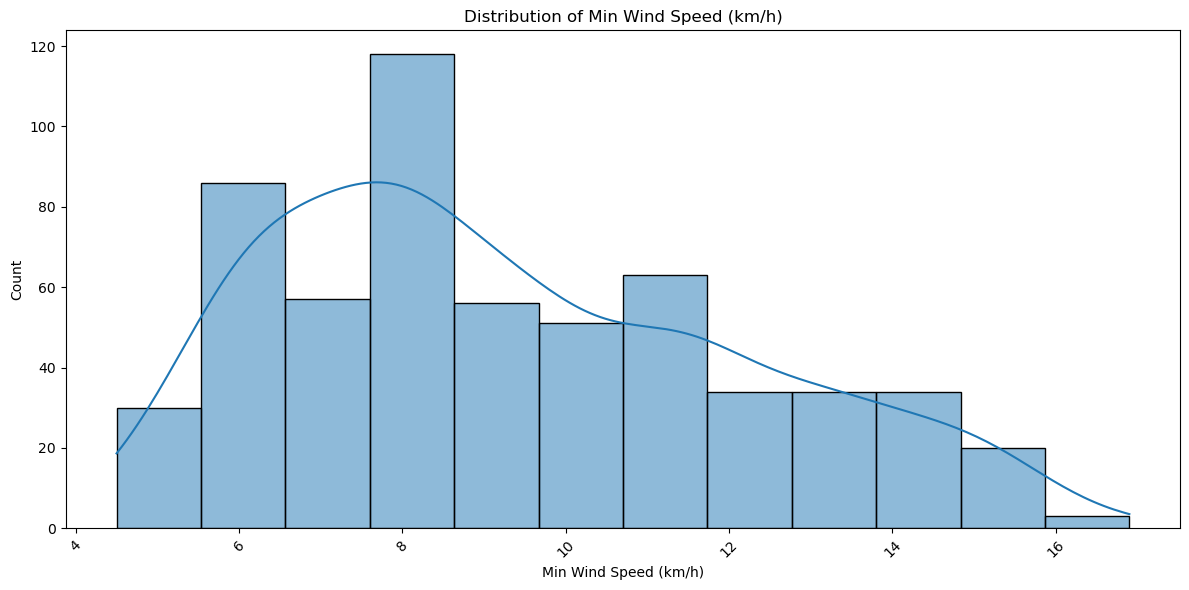

Summary Statistics for Min Wind Speed (km/h):
count    586.000000
mean       9.329181
std        2.866014
min        4.500000
25%        7.100000
50%        8.700000
75%       11.500000
max       16.900000
Name: Min Wind Speed (km/h), dtype: float64


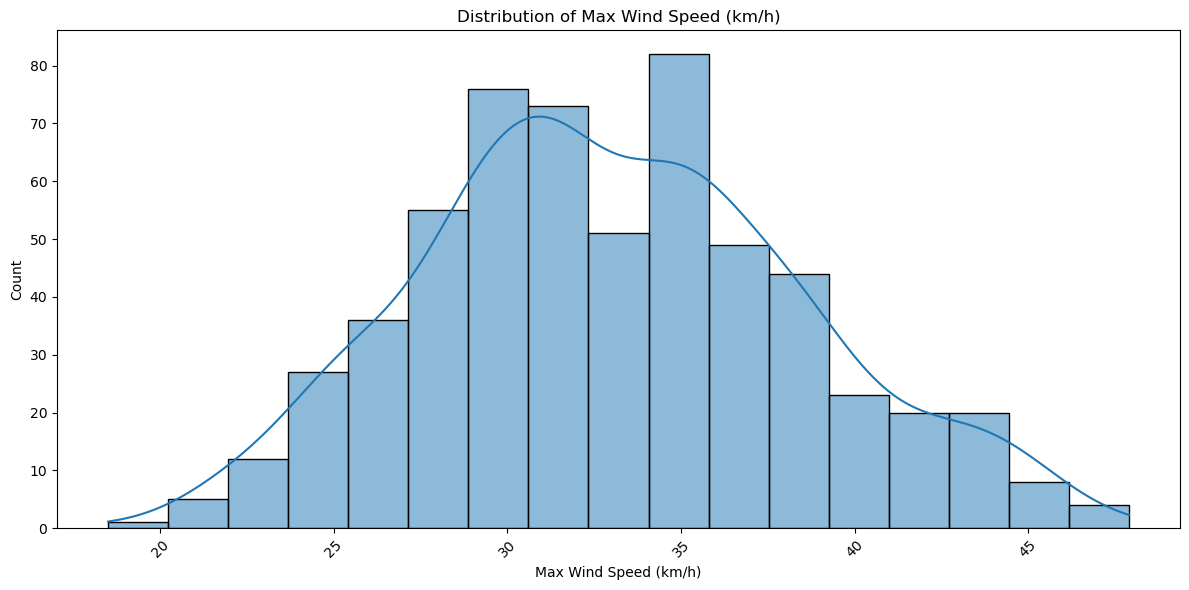

Summary Statistics for Max Wind Speed (km/h):
count    586.000000
mean      33.039761
std        5.491704
min       18.500000
25%       29.200000
50%       32.400000
75%       36.700000
max       47.900000
Name: Max Wind Speed (km/h), dtype: float64


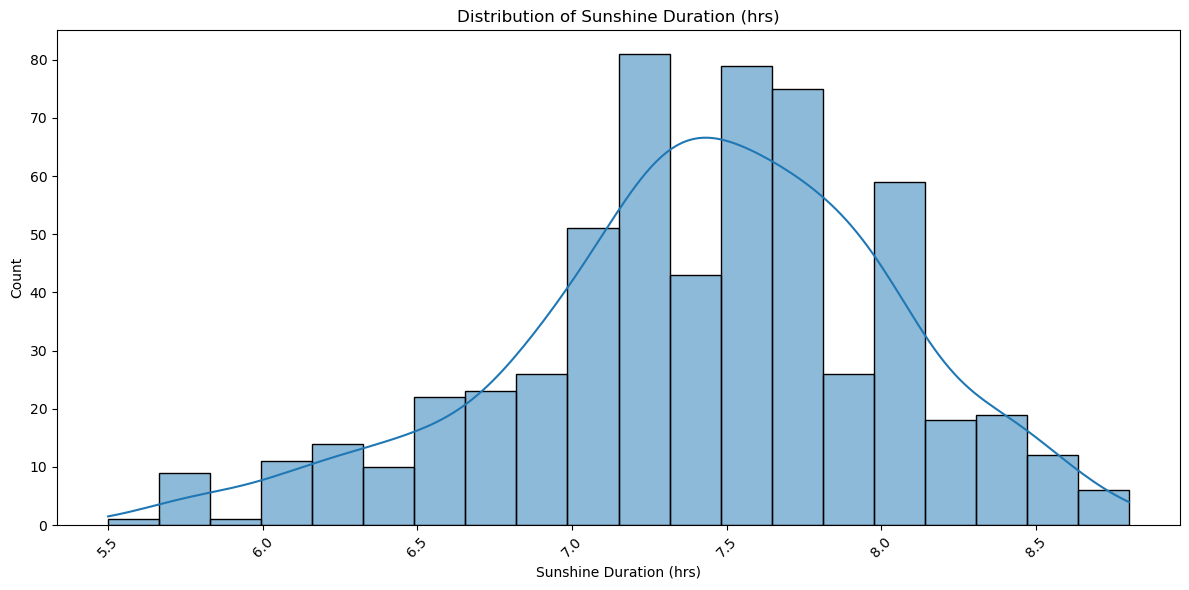

Summary Statistics for Sunshine Duration (hrs):
count    586.000000
mean       7.419966
std        0.608398
min        5.500000
25%        7.100000
50%        7.500000
75%        7.800000
max        8.800000
Name: Sunshine Duration (hrs), dtype: float64


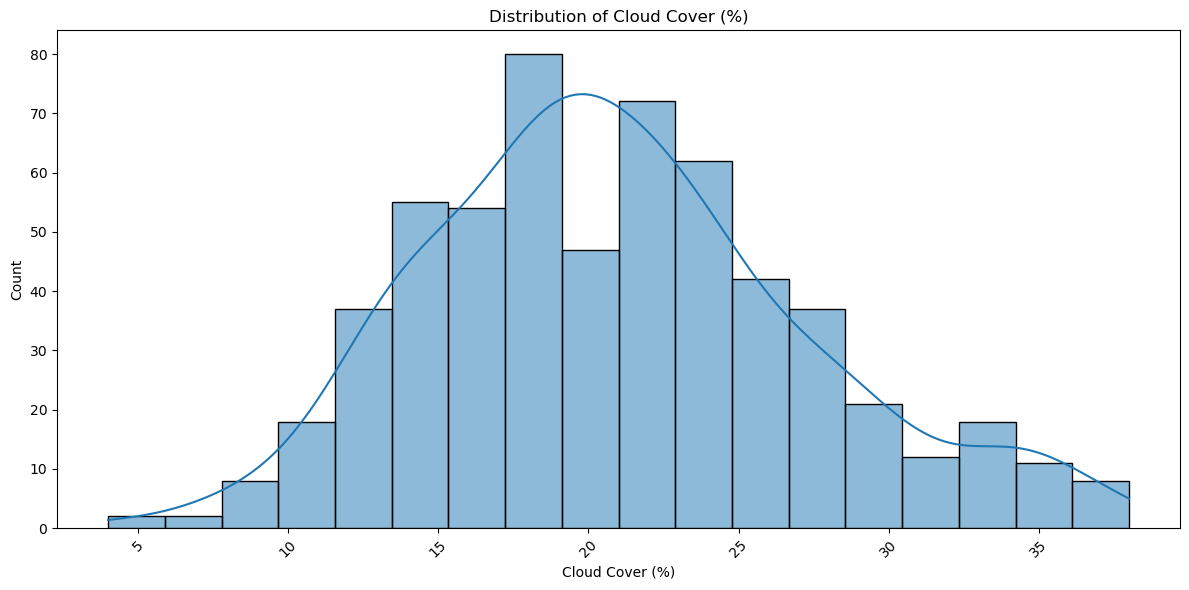

Summary Statistics for Cloud Cover (%):
count    586.000000
mean      20.894198
std        6.350105
min        4.000000
25%       17.000000
50%       20.000000
75%       25.000000
max       38.000000
Name: Cloud Cover (%), dtype: float64


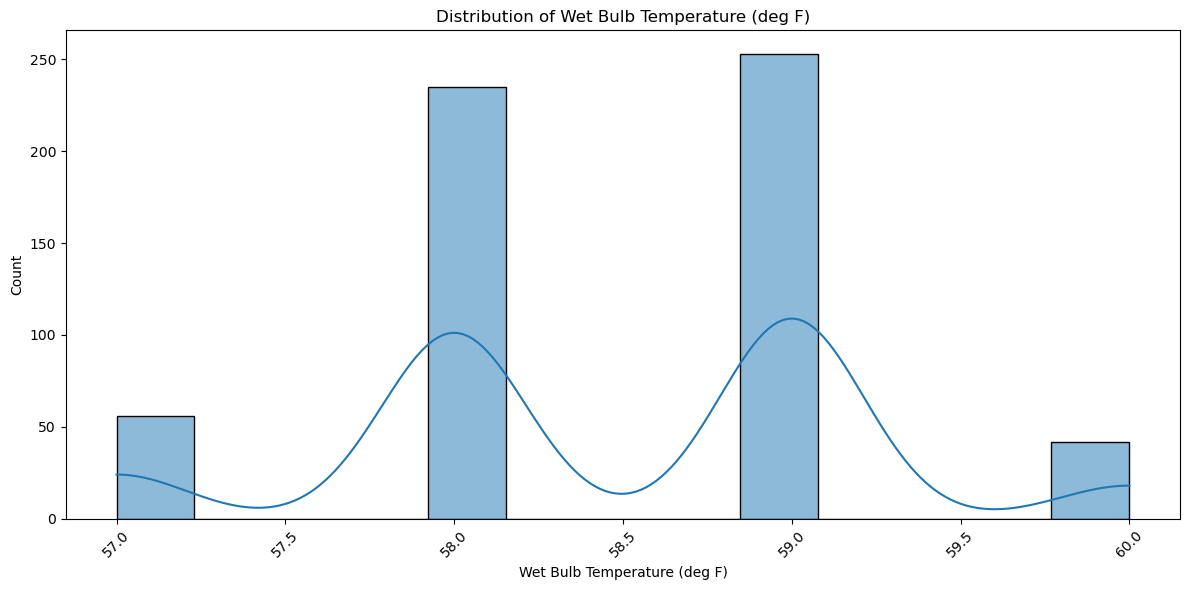

Summary Statistics for Wet Bulb Temperature (deg F):
count    586.000000
mean      58.479522
std        0.764886
min       57.000000
25%       58.000000
50%       59.000000
75%       59.000000
max       60.000000
Name: Wet Bulb Temperature (deg F), dtype: float64


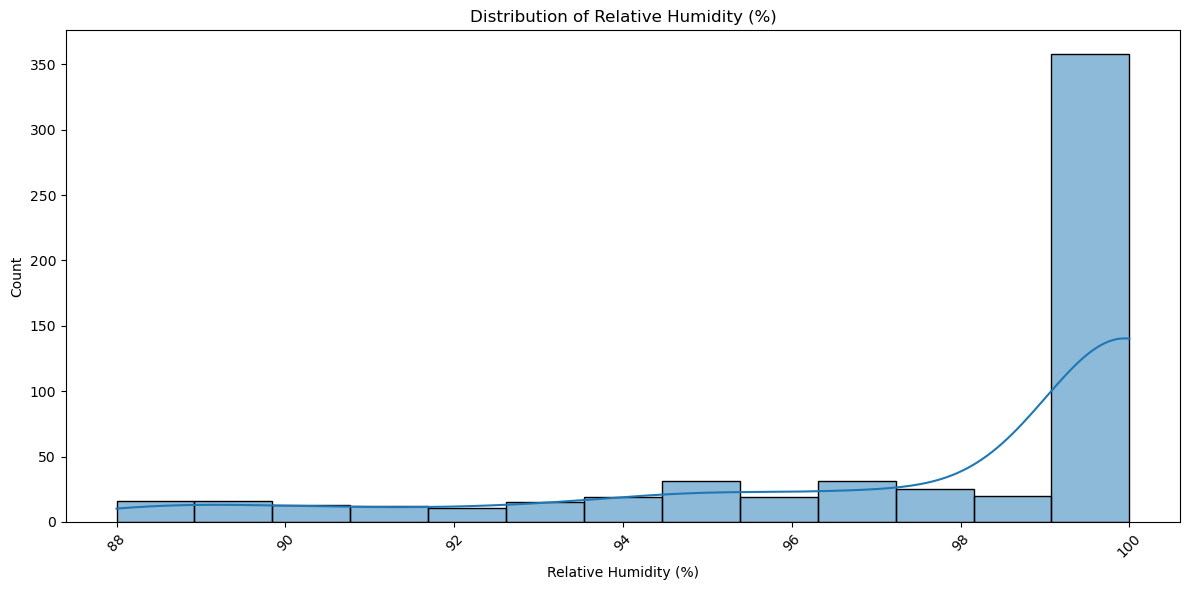

Summary Statistics for Relative Humidity (%):
count    586.000000
mean      97.769625
std        3.507720
min       88.000000
25%       96.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: Relative Humidity (%), dtype: float64


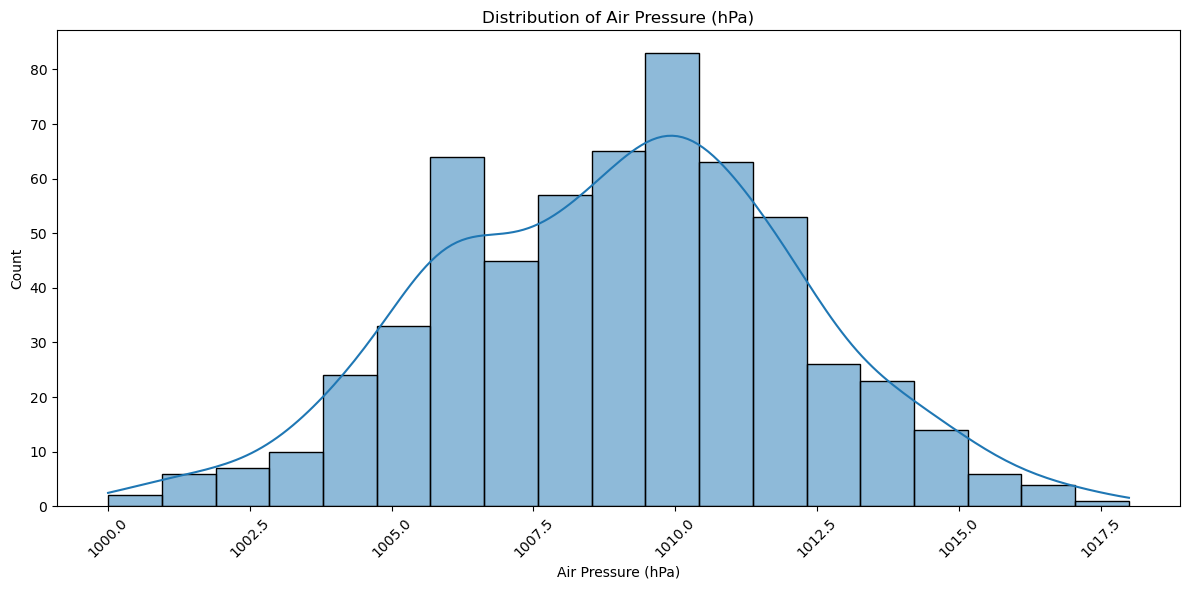

Summary Statistics for Air Pressure (hPa):
count     586.000000
mean     1008.979522
std         3.236479
min      1000.000000
25%      1007.000000
50%      1009.000000
75%      1011.000000
max      1018.000000
Name: Air Pressure (hPa), dtype: float64


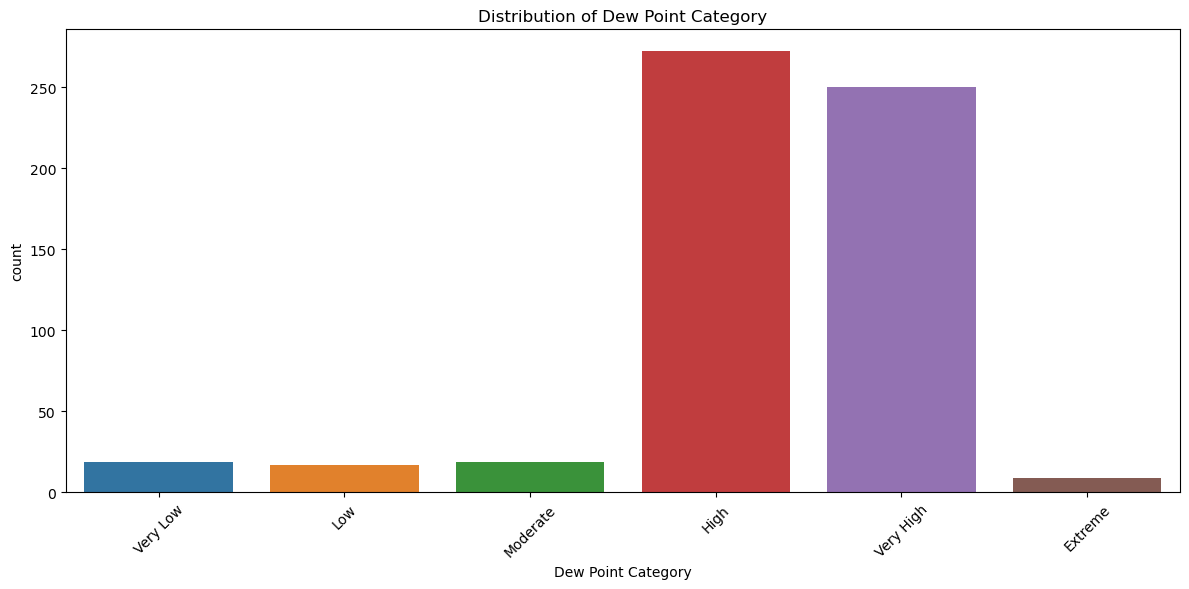

Summary Statistics for Dew Point Category:
Very Low      19
Low           17
Moderate      19
High         272
Very High    250
Extreme        9
Name: Dew Point Category, dtype: int64

Unique values: 6
Mode: High


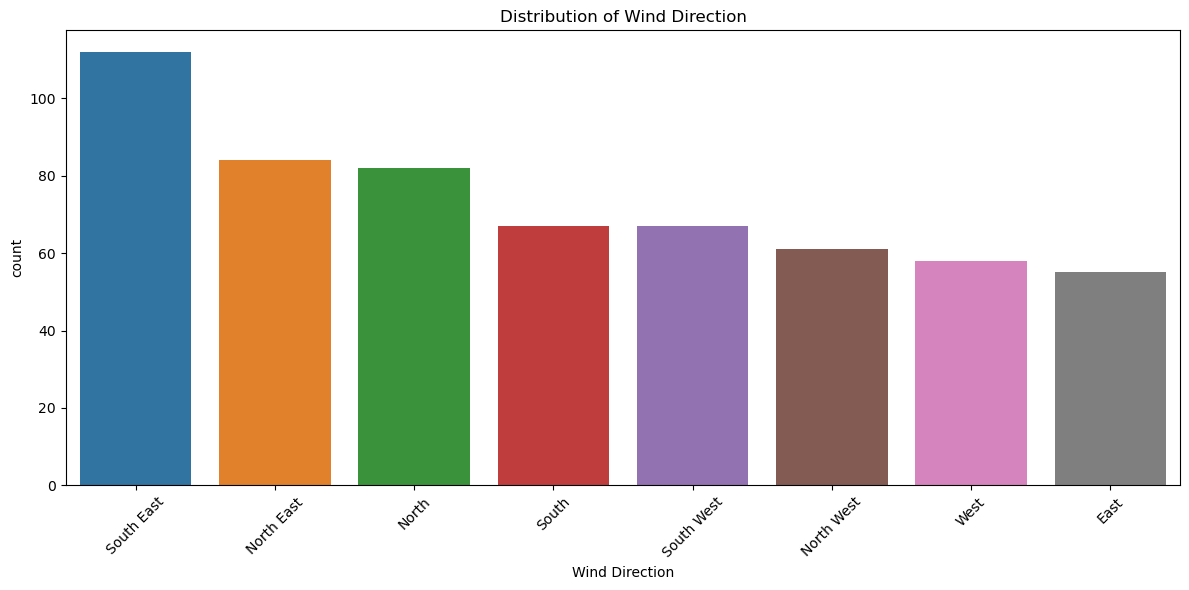

Summary Statistics for Wind Direction:
South East    112
North East     84
North          82
South          67
South West     67
North West     61
West           58
East           55
Name: Wind Direction, dtype: int64

Unique values: 8
Mode: South East


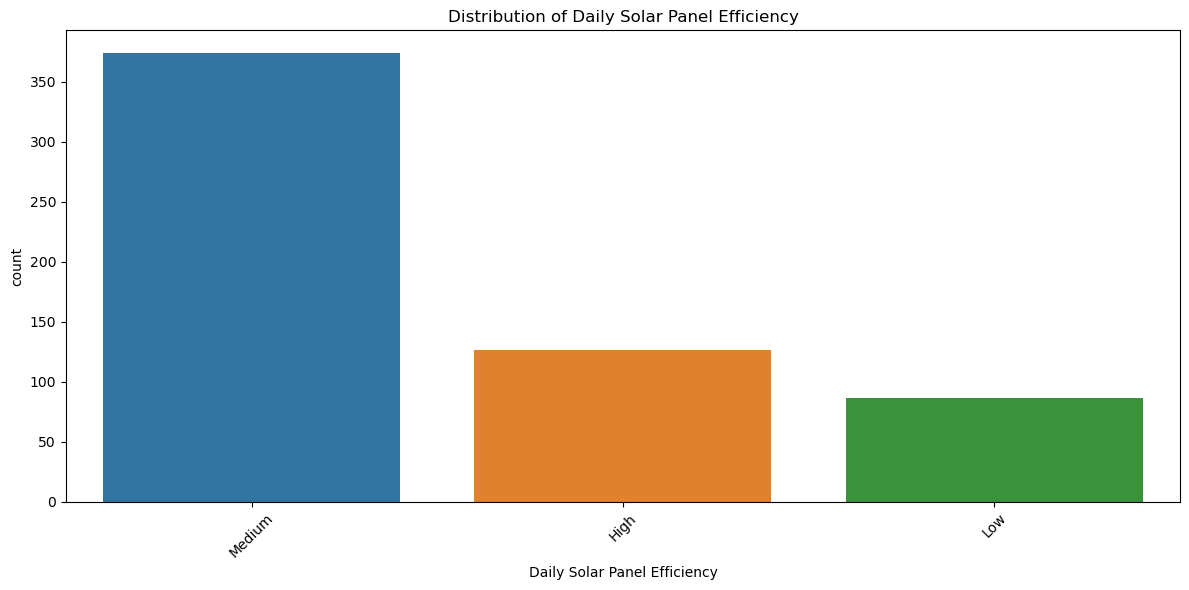

Summary Statistics for Daily Solar Panel Efficiency:
Medium    374
High      126
Low        86
Name: Daily Solar Panel Efficiency, dtype: int64

Unique values: 3
Mode: Medium


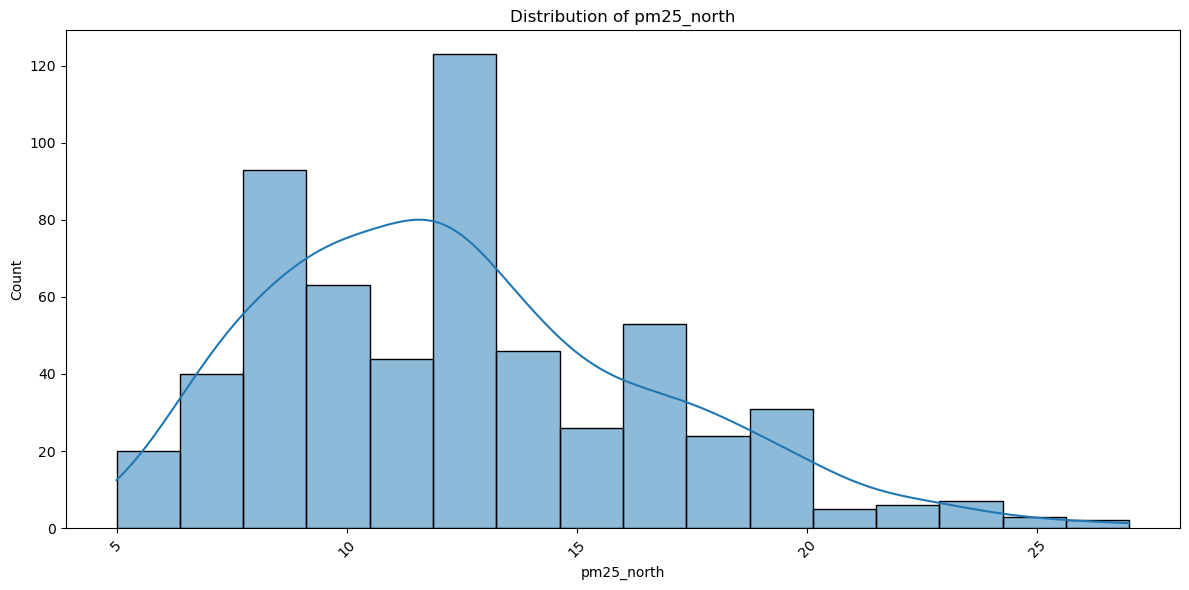

Summary Statistics for pm25_north:
count    586.000000
mean      12.447099
std        4.154466
min        5.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       27.000000
Name: pm25_north, dtype: float64


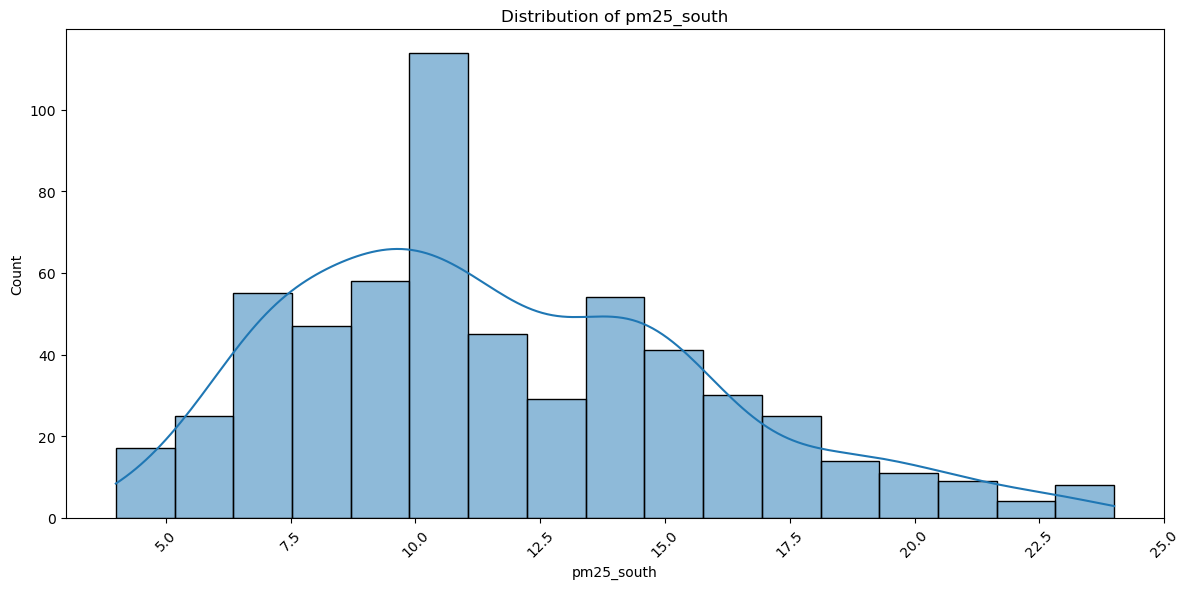

Summary Statistics for pm25_south:
count    586.000000
mean      11.709898
std        4.152372
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       24.000000
Name: pm25_south, dtype: float64


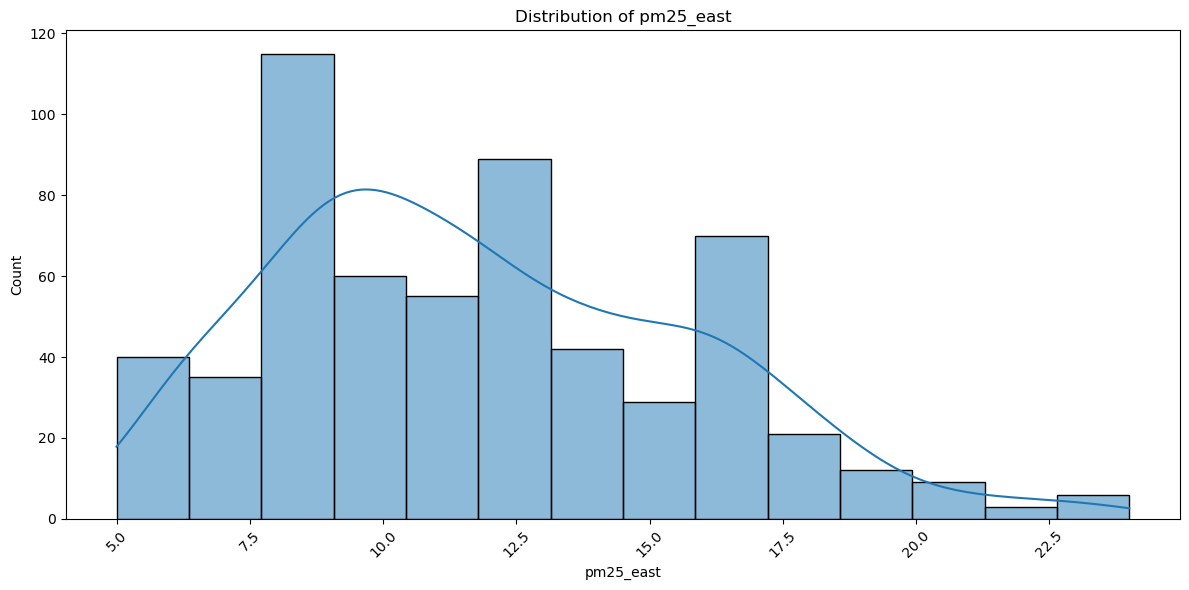

Summary Statistics for pm25_east:
count    586.000000
mean      11.854949
std        3.904122
min        5.000000
25%        9.000000
50%       11.000000
75%       15.000000
max       24.000000
Name: pm25_east, dtype: float64


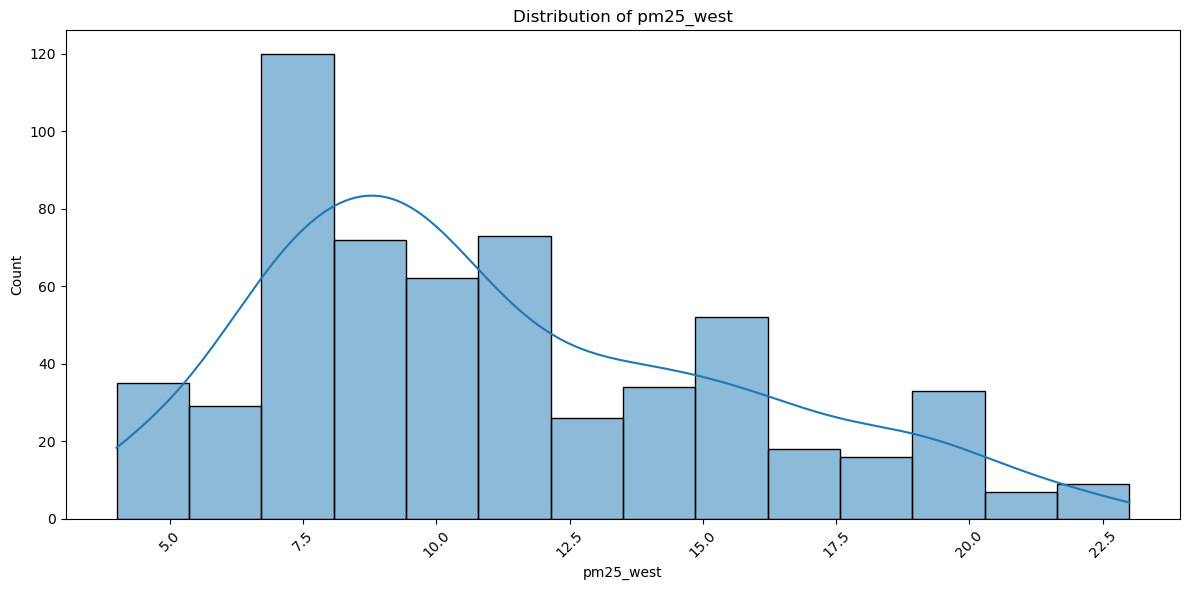

Summary Statistics for pm25_west:
count    586.000000
mean      11.153584
std        4.377522
min        4.000000
25%        8.000000
50%       10.000000
75%       14.000000
max       23.000000
Name: pm25_west, dtype: float64


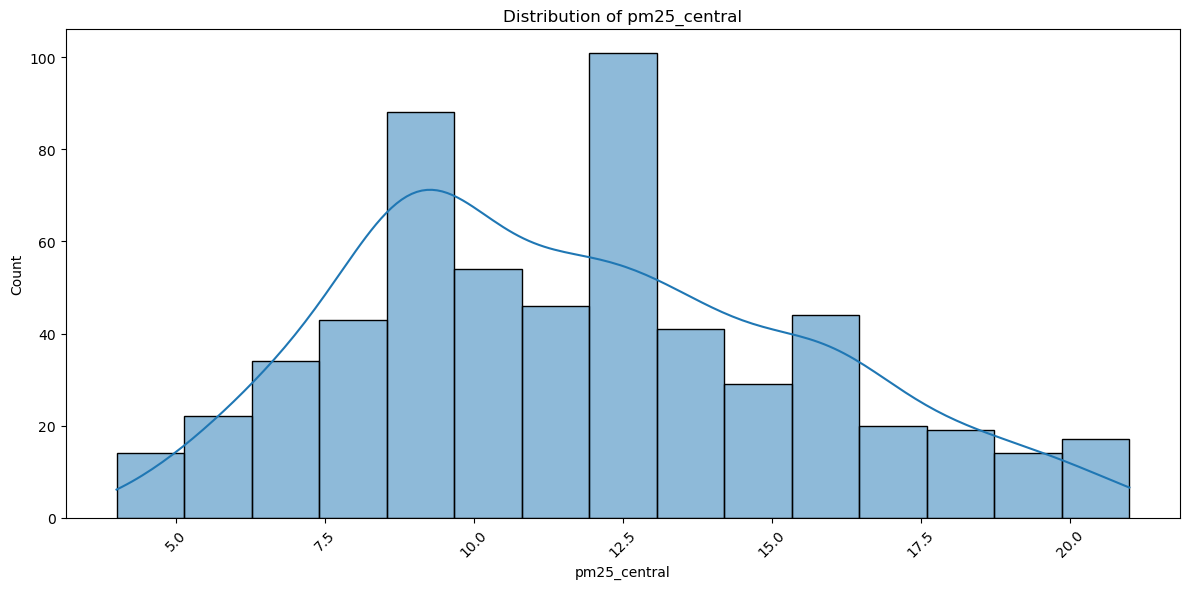

Summary Statistics for pm25_central:
count    586.000000
mean      11.745734
std        3.765592
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       21.000000
Name: pm25_central, dtype: float64


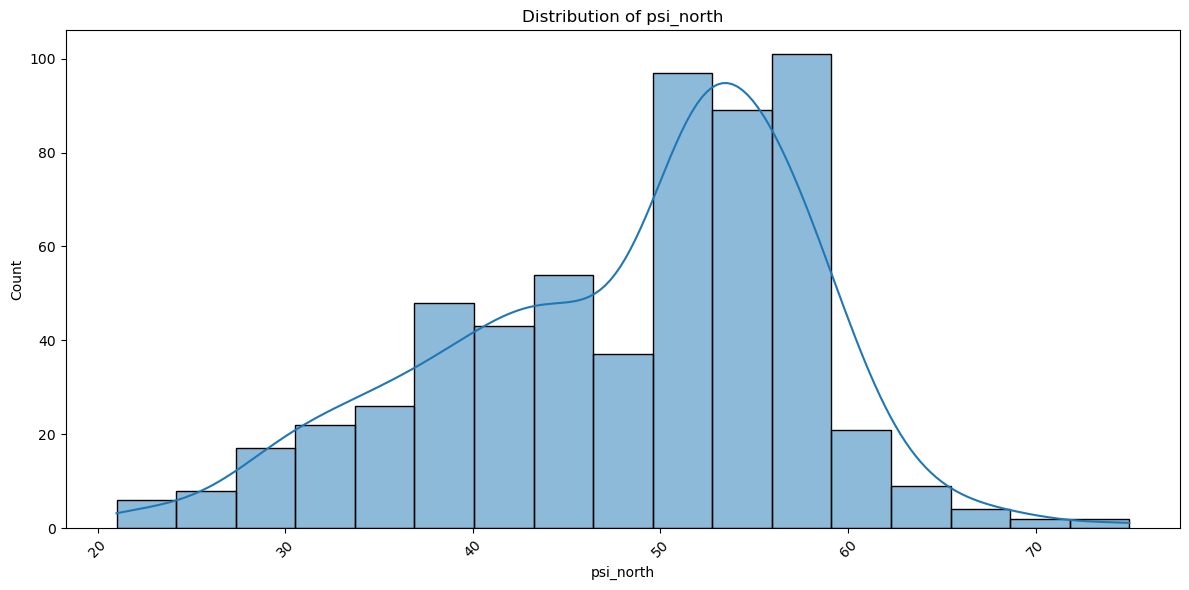

Summary Statistics for psi_north:
count    586.00000
mean      48.34471
std        9.55366
min       21.00000
25%       41.25000
50%       51.00000
75%       55.00000
max       75.00000
Name: psi_north, dtype: float64


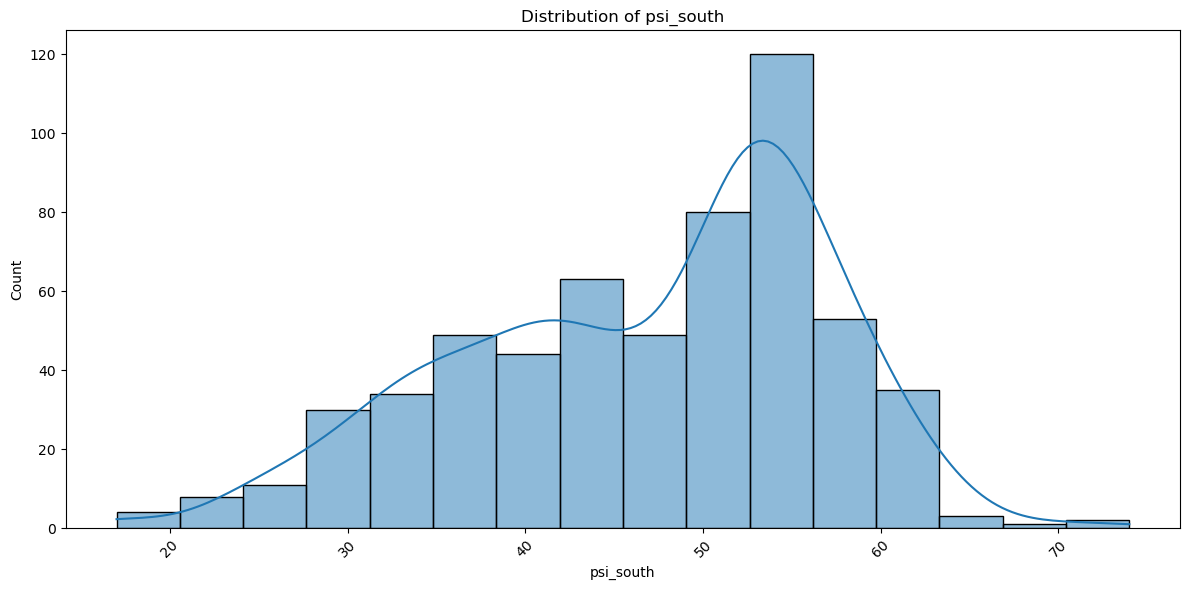

Summary Statistics for psi_south:
count    586.000000
mean      46.858362
std       10.206353
min       17.000000
25%       39.000000
50%       50.000000
75%       54.750000
max       74.000000
Name: psi_south, dtype: float64


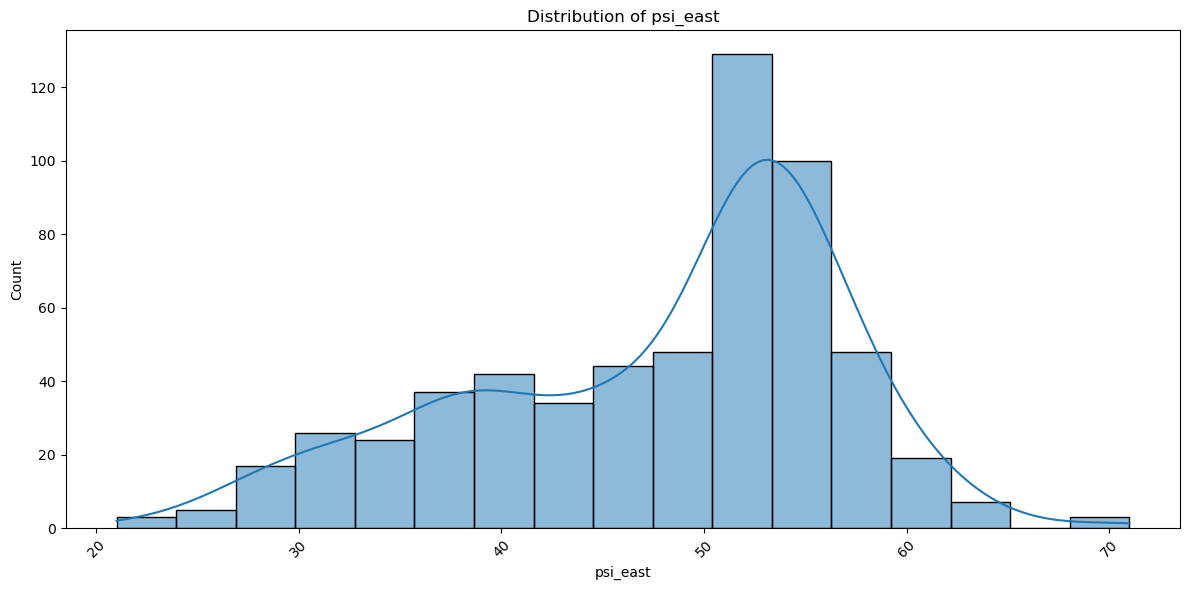

Summary Statistics for psi_east:
count    586.000000
mean      47.774744
std        9.270509
min       21.000000
25%       41.000000
50%       51.000000
75%       54.000000
max       71.000000
Name: psi_east, dtype: float64


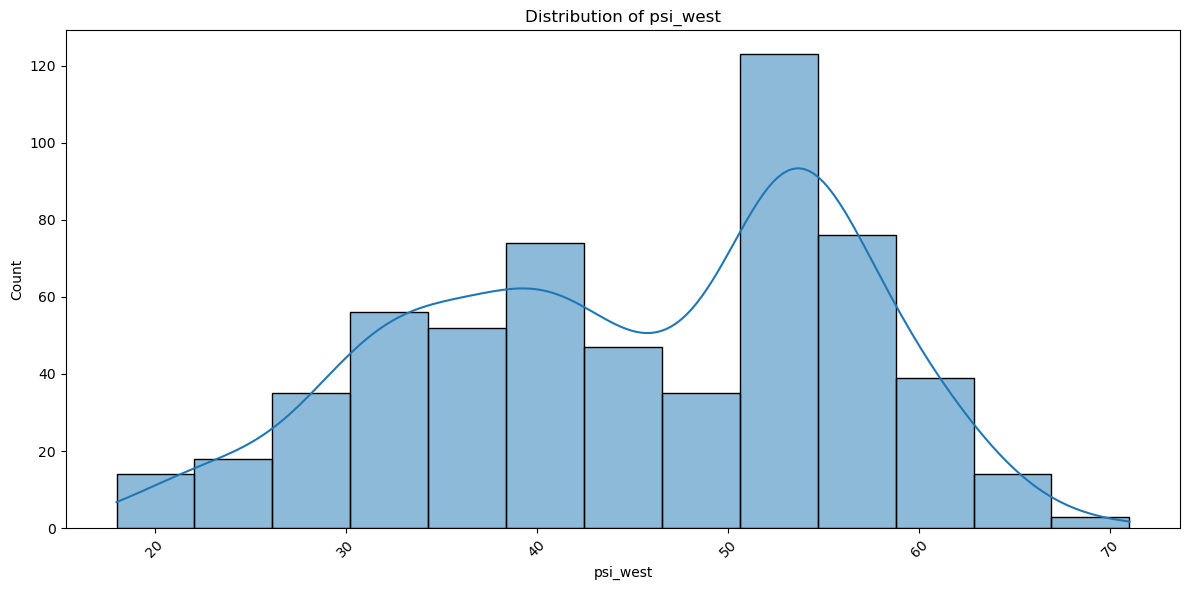

Summary Statistics for psi_west:
count    586.000000
mean      44.986348
std       11.205759
min       18.000000
25%       36.000000
50%       46.000000
75%       54.000000
max       71.000000
Name: psi_west, dtype: float64


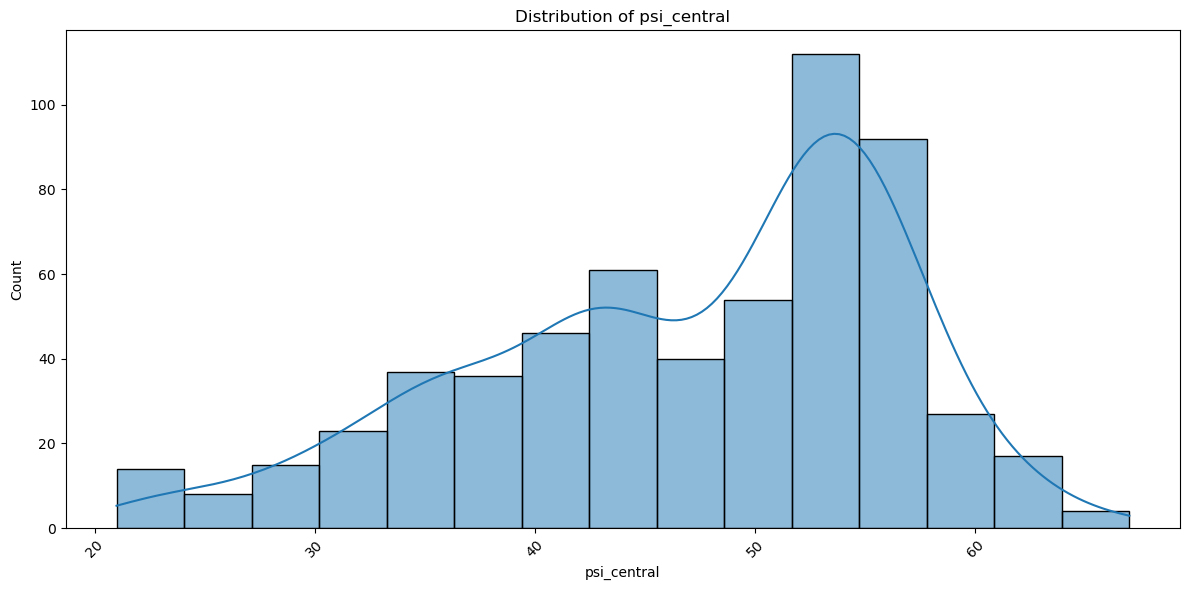

Summary Statistics for psi_central:
count    586.000000
mean      46.919795
std        9.505125
min       21.000000
25%       41.000000
50%       50.000000
75%       54.000000
max       67.000000
Name: psi_central, dtype: float64


In [19]:
print("Univariate Analysis")
for column in eda.df.columns:
    if column not in ['data_ref', 'date']:
        eda.univariate_analysis(column)

### Key Observations

For numerical data, there is no observable trends and patterns with most variables

For categorical data, there is an imbalanced in the number of labels (`Daily Solar Panel Efficiency`). -> thus, there is a need to oversample. I will use SMOTENC, a variant that can upsamples both numerical and categorical features, and treats categorical features differently from numerical ones during the synthetic sample generation process. This is done in `model.py`.

In this way, it properly handles both numerical and categorical features, maintains the integrity of categorical data during the oversampling process, and lead to more realistic synthetic samples.

Here are the assumptions that I have assumed:
1. Assumption: Synthetic features preserve real-world relationships
   - I assume that any synthetic features in our dataset maintain the underlying relationships present in real-world data.
  
2. Assumption: Synthetic data doesn't introduce bias
   - I assume that the process of creating synthetic data hasn't inadvertently introduced biases that don't exist in real-world scenarios.
   
3. Assumption: Synthetic features enhance rather than distort predictive power
   - I assume that synthetic features, if present, are designed to improve model performance without overfitting.
   
For `Dew Point Category`, the dew points are mostly high or very high.

For rainfall data, the distribution is heavily right-skewed, which is typical for rainfall data. Most days have little to no rainfall, with occasional heavy rainfall events. The "outliers" in this case are likely legitimate heavy rainfall events, which are crucial for understanding the full range of weather conditions affecting solar panel efficiency.


---

## Bivariate Analysis

After examining individual variables, I then conduct a bivariate analysis to understand the relationships between each feature and our target variable. This step is crucial for identifying potentially important predictors for our solar efficiency model. 



Bivariate Analysis


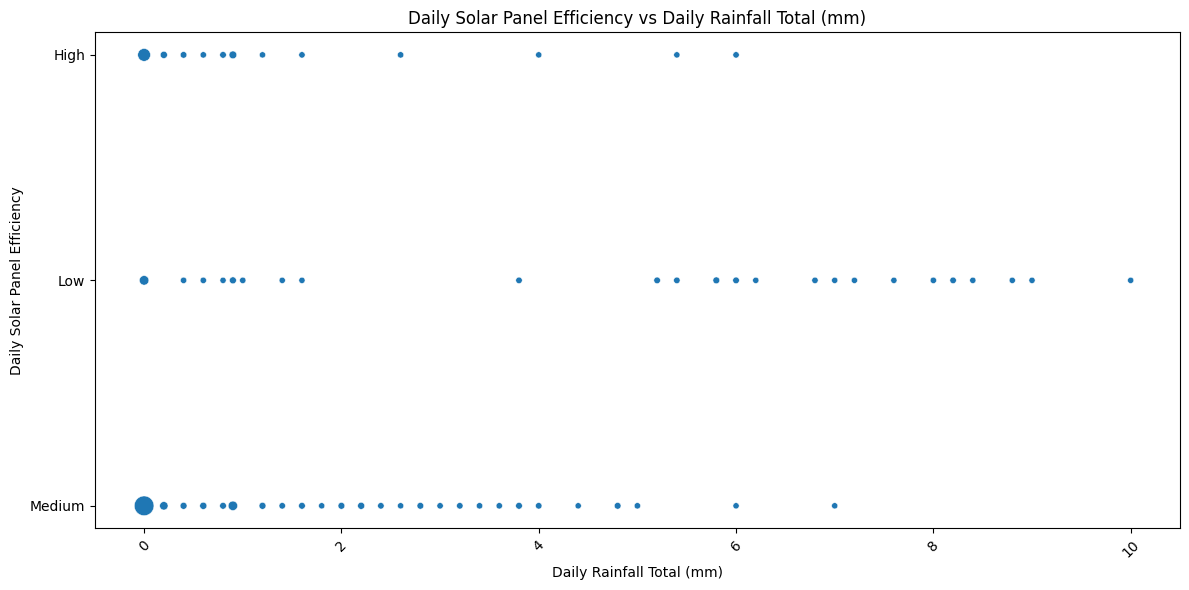

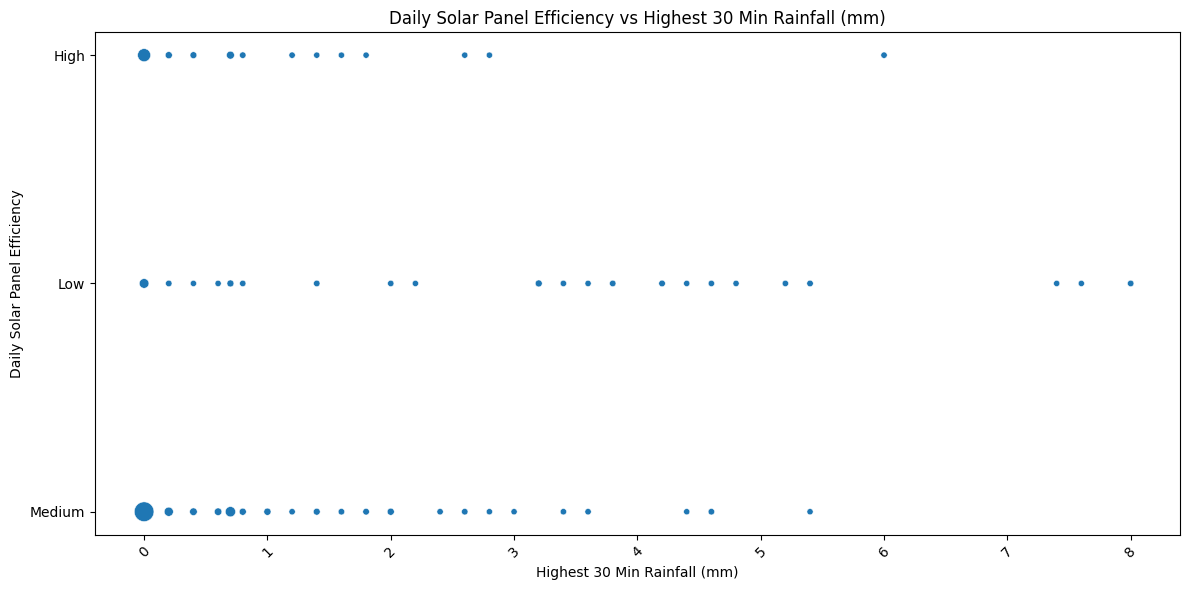

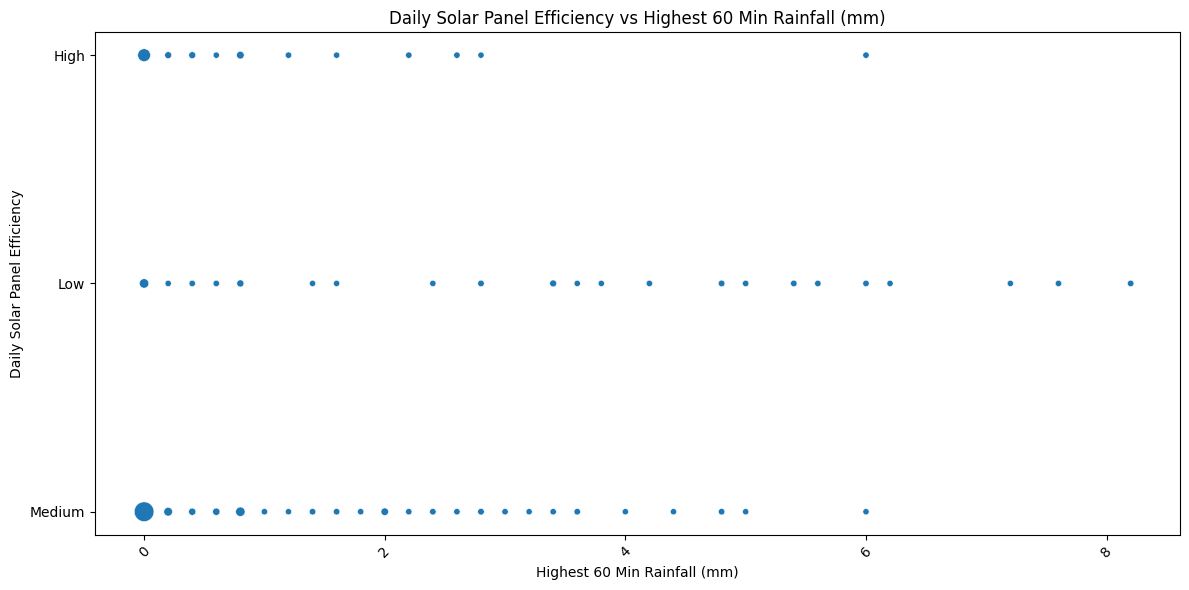

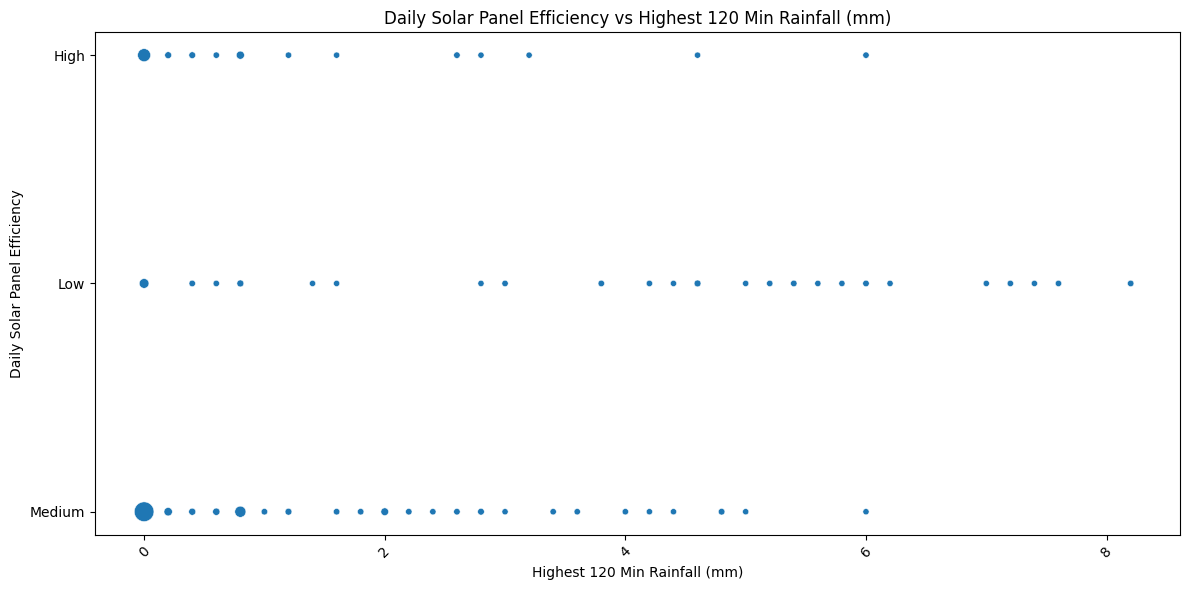

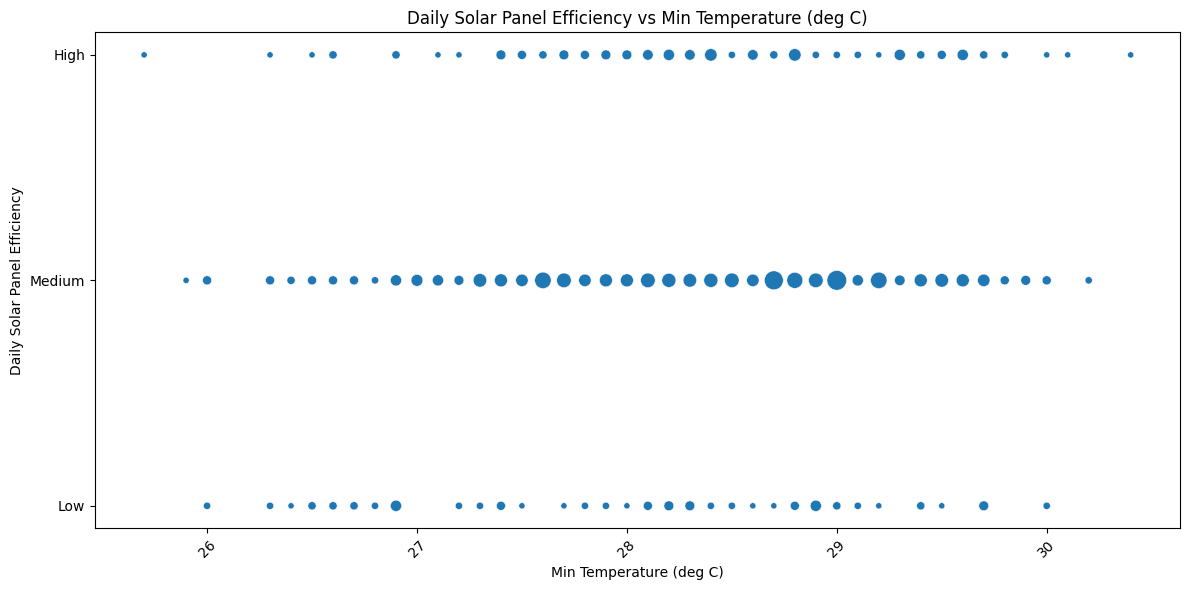

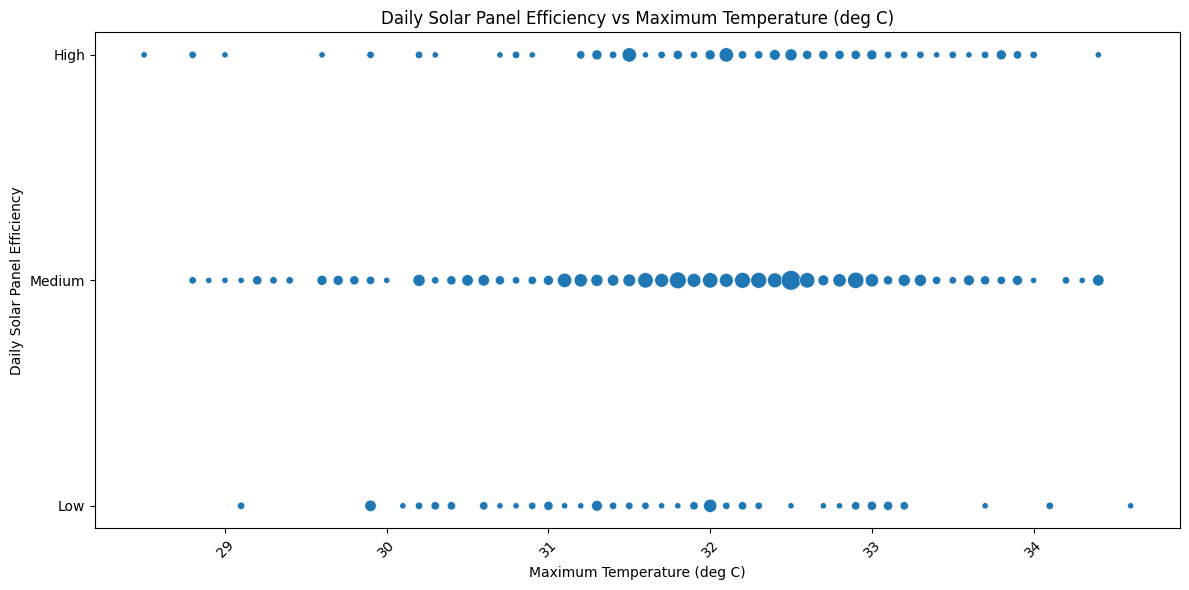

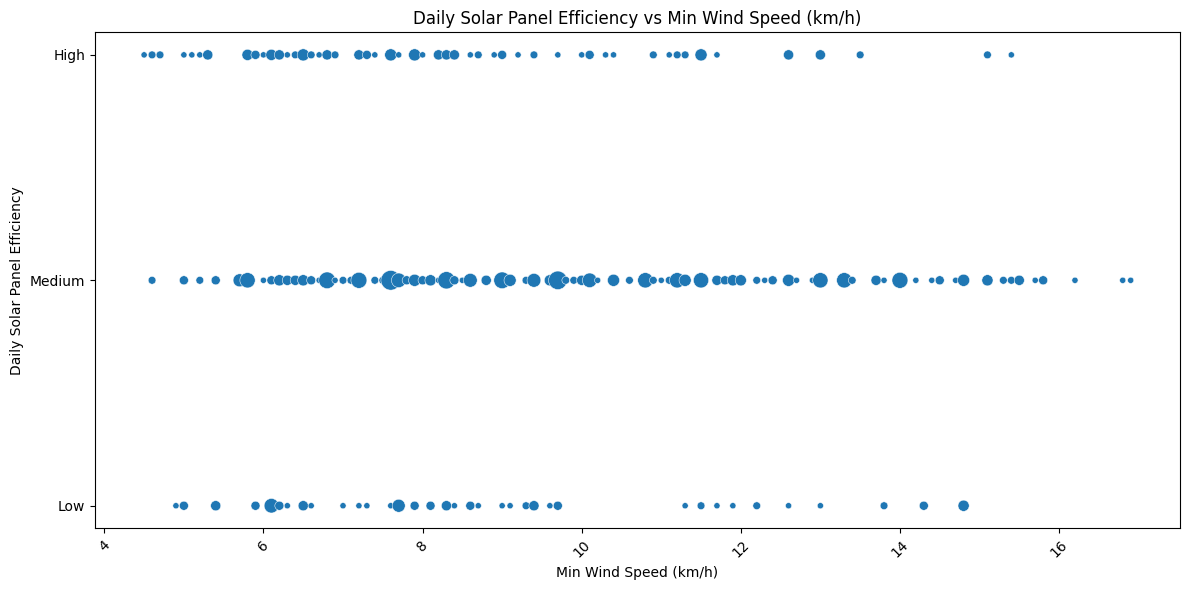

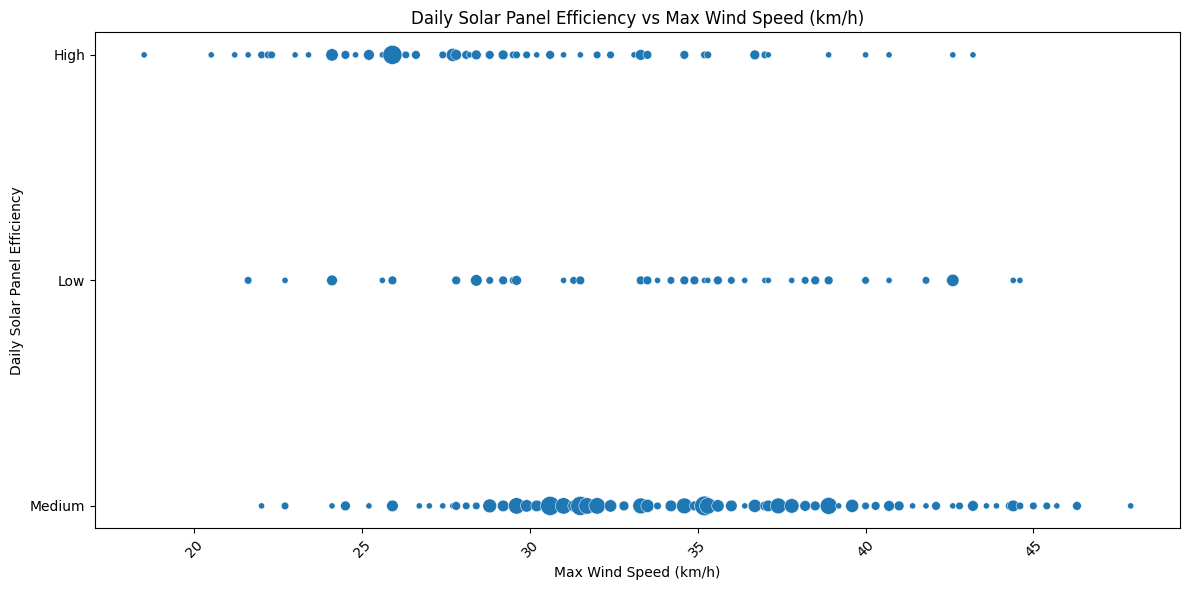

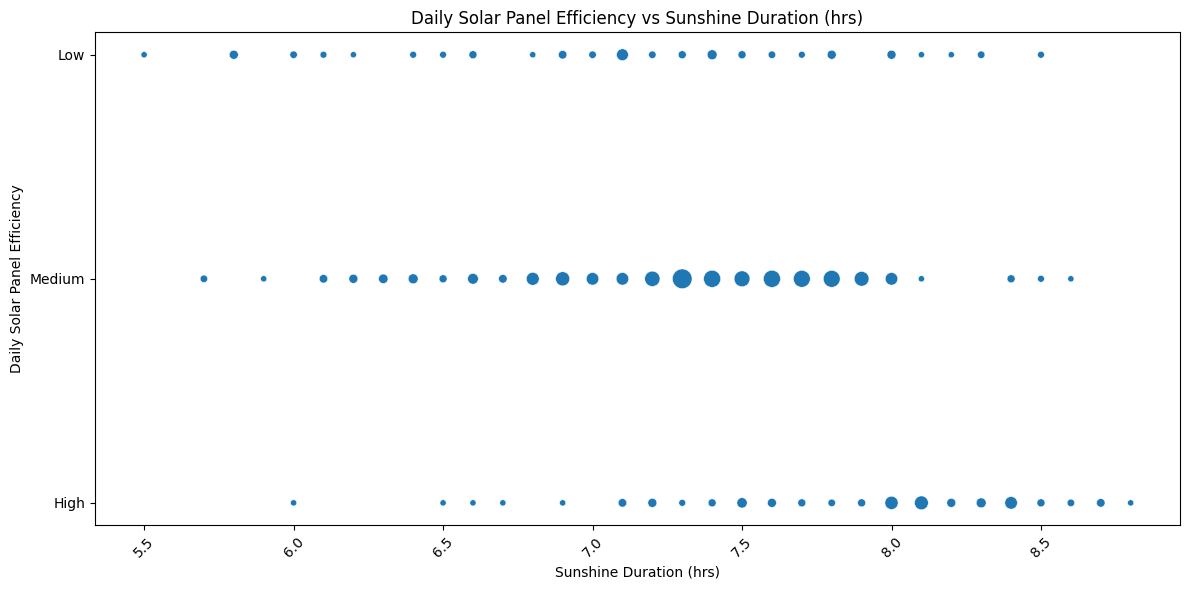

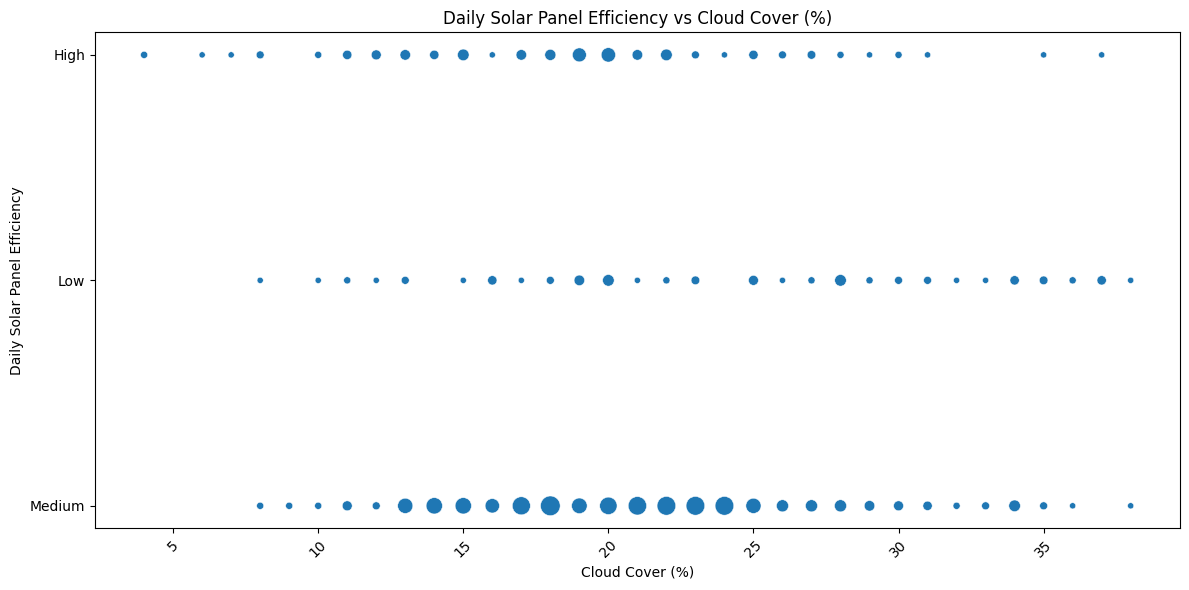

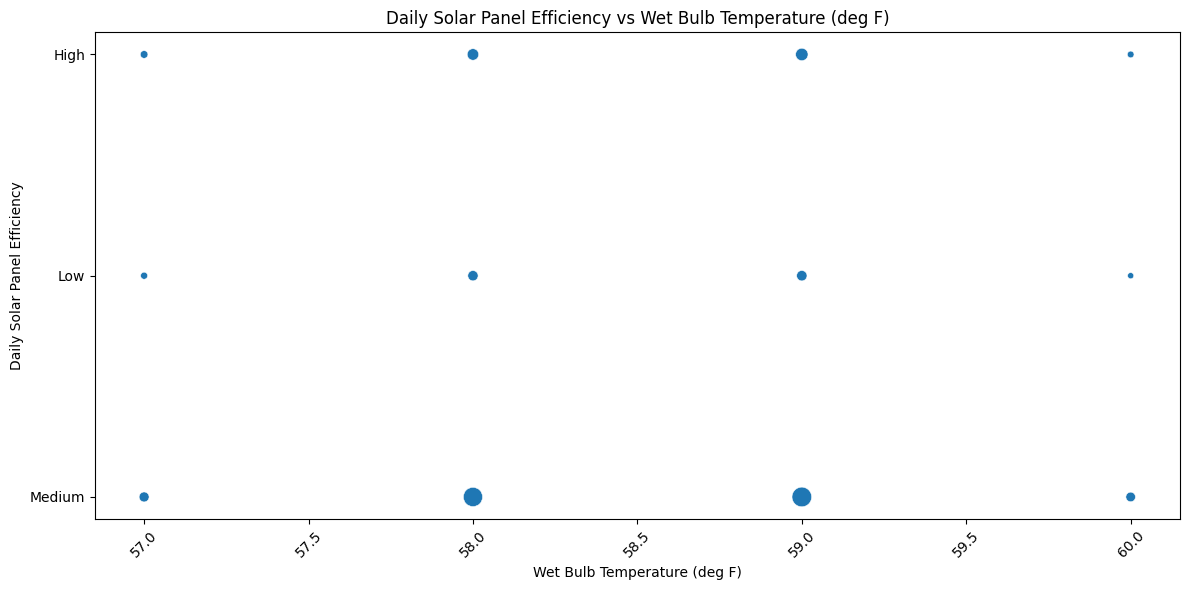

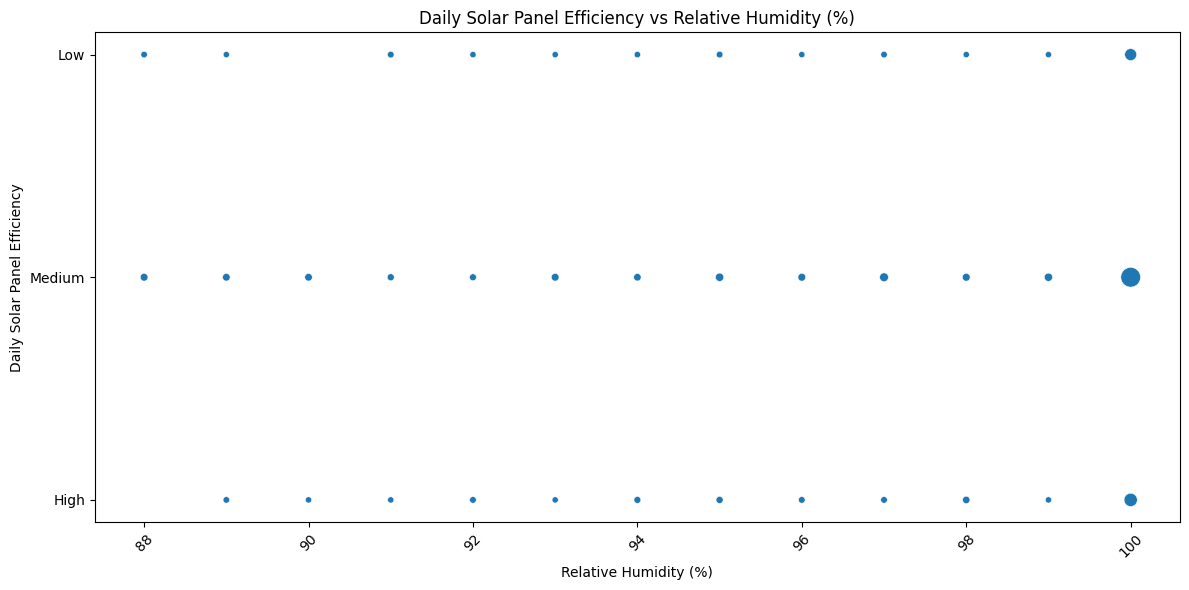

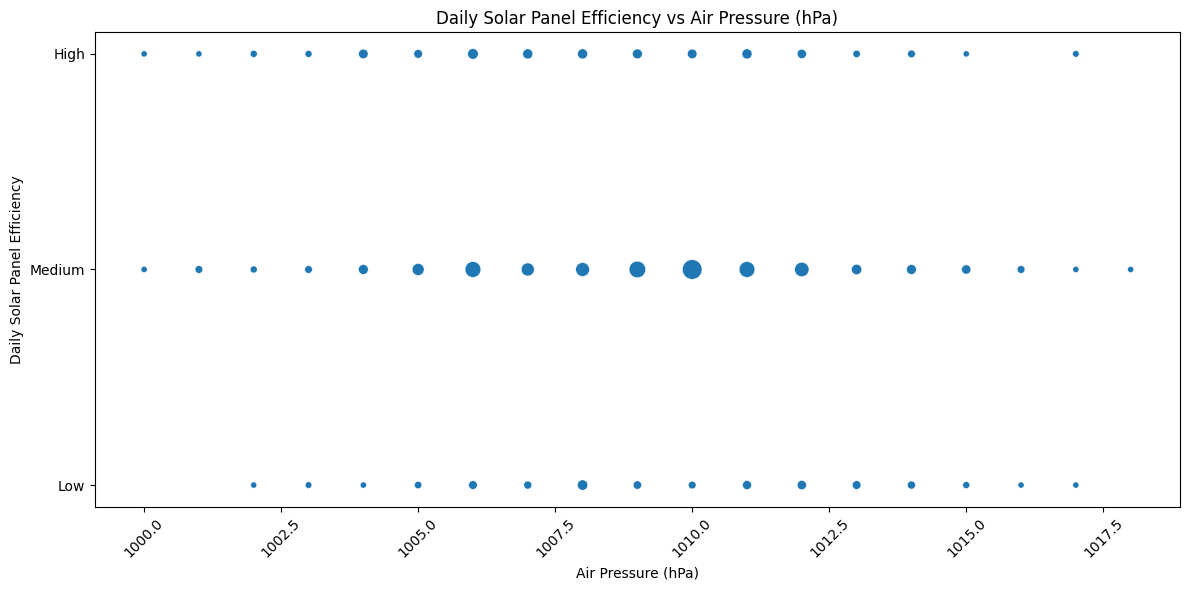

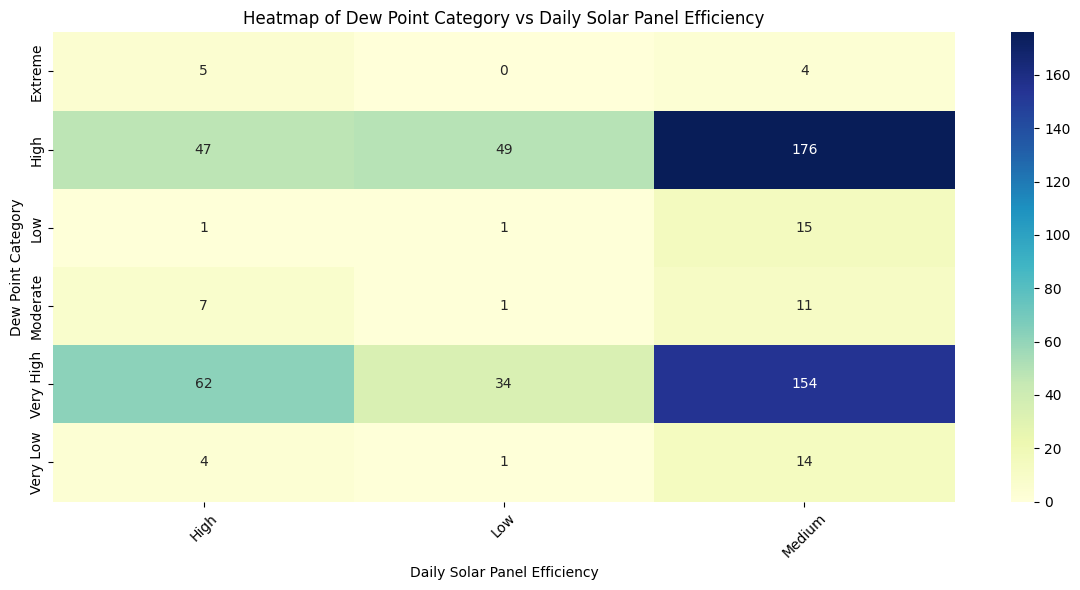

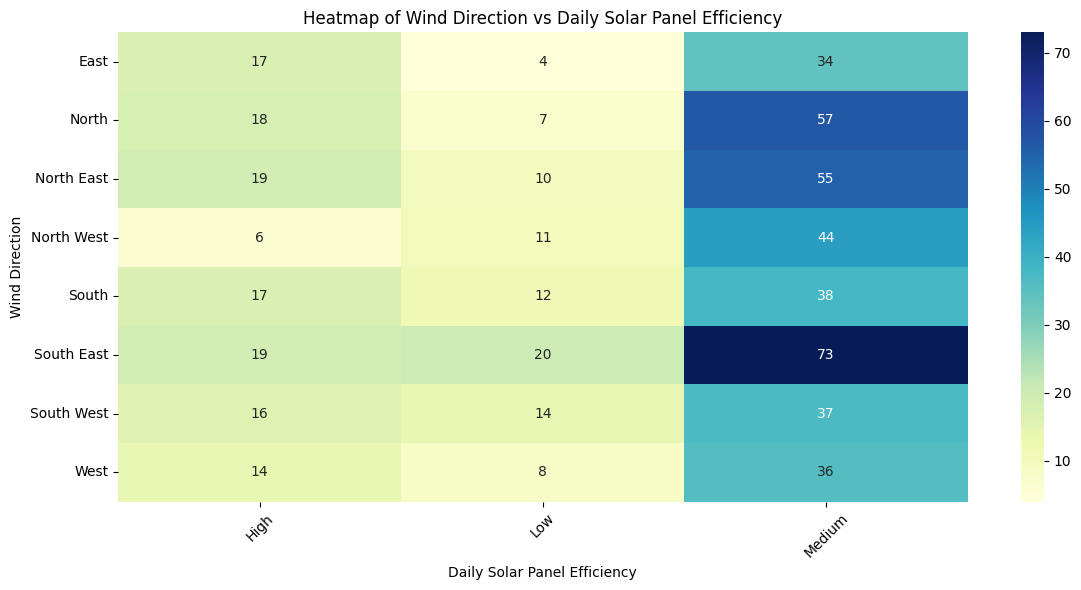

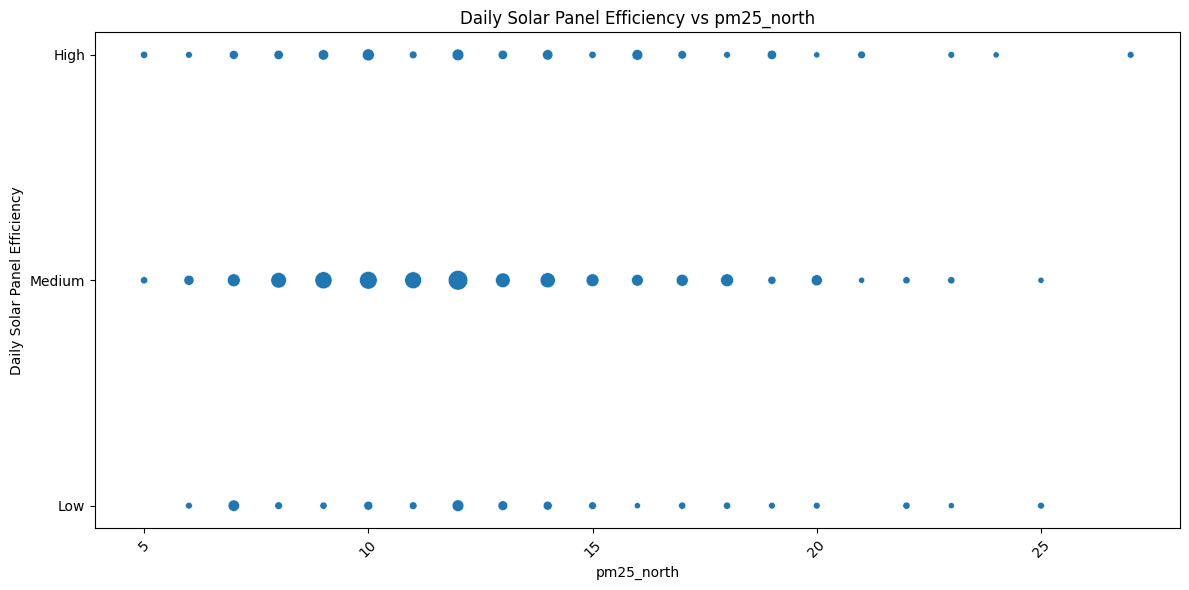

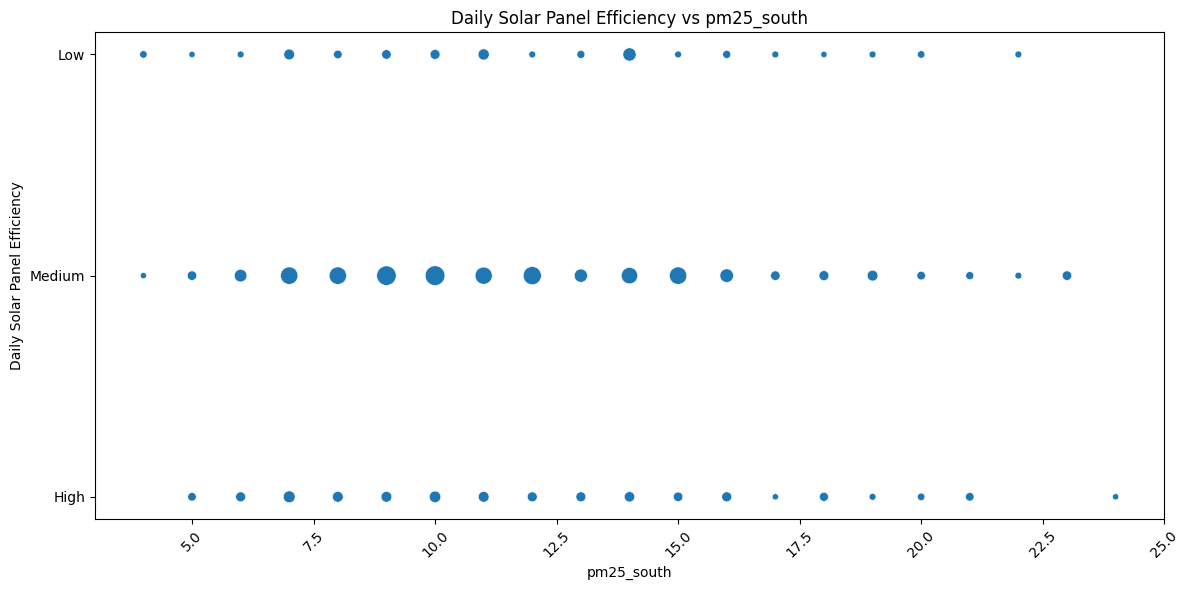

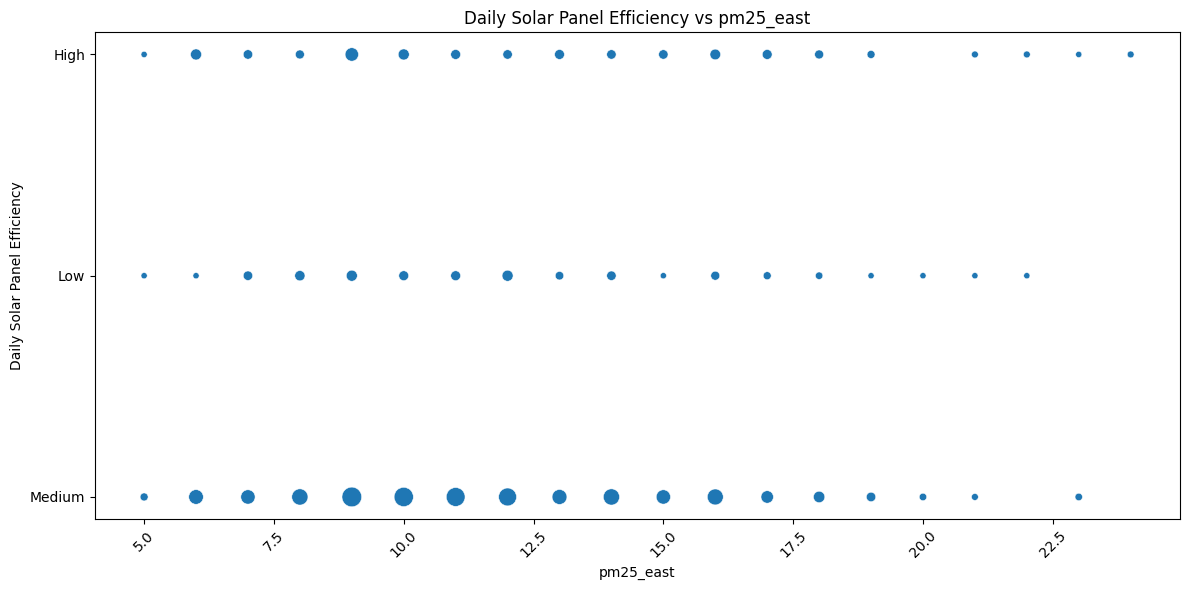

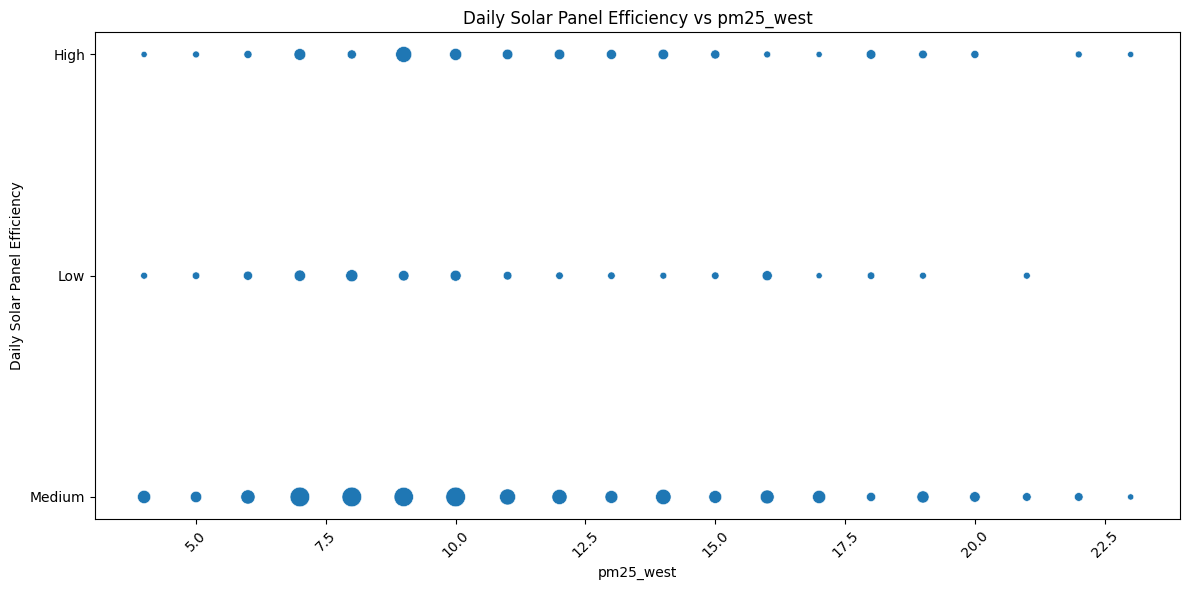

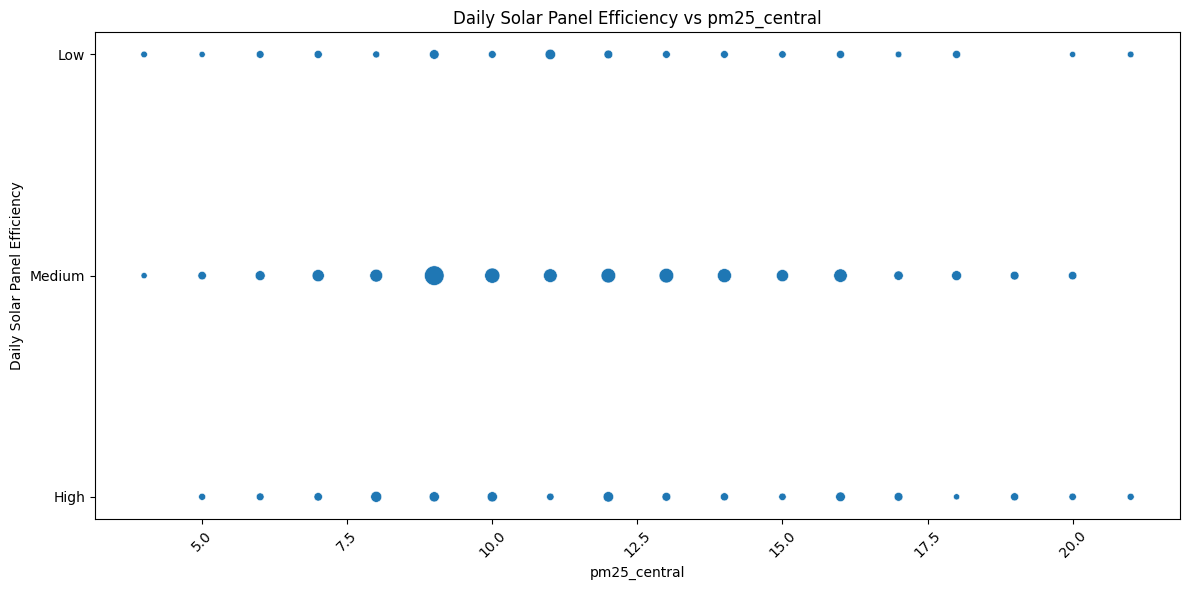

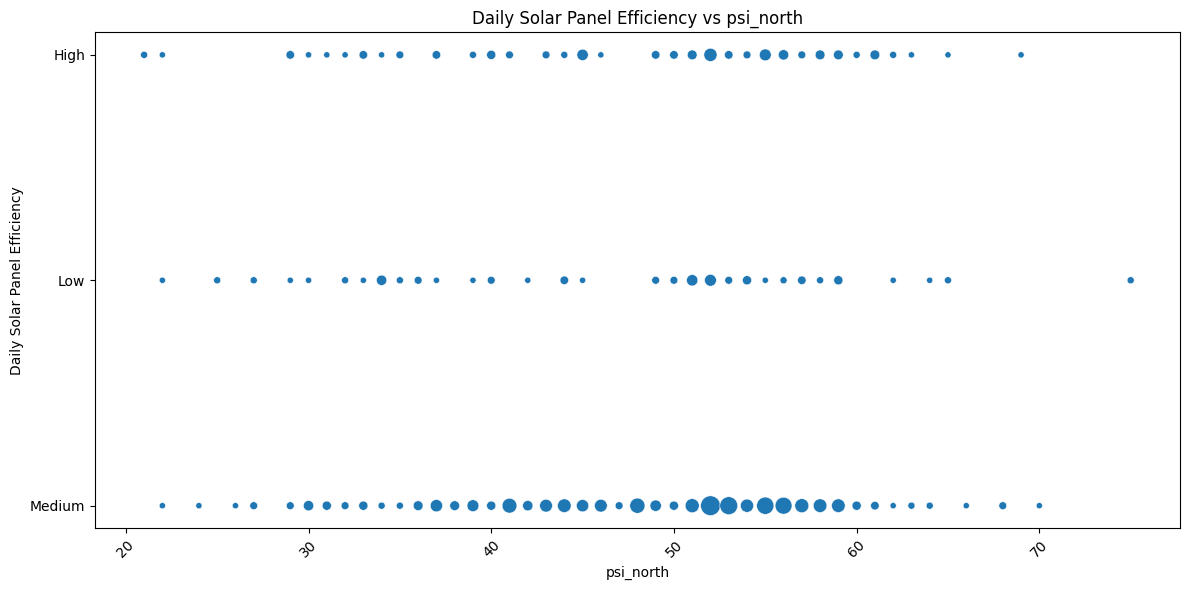

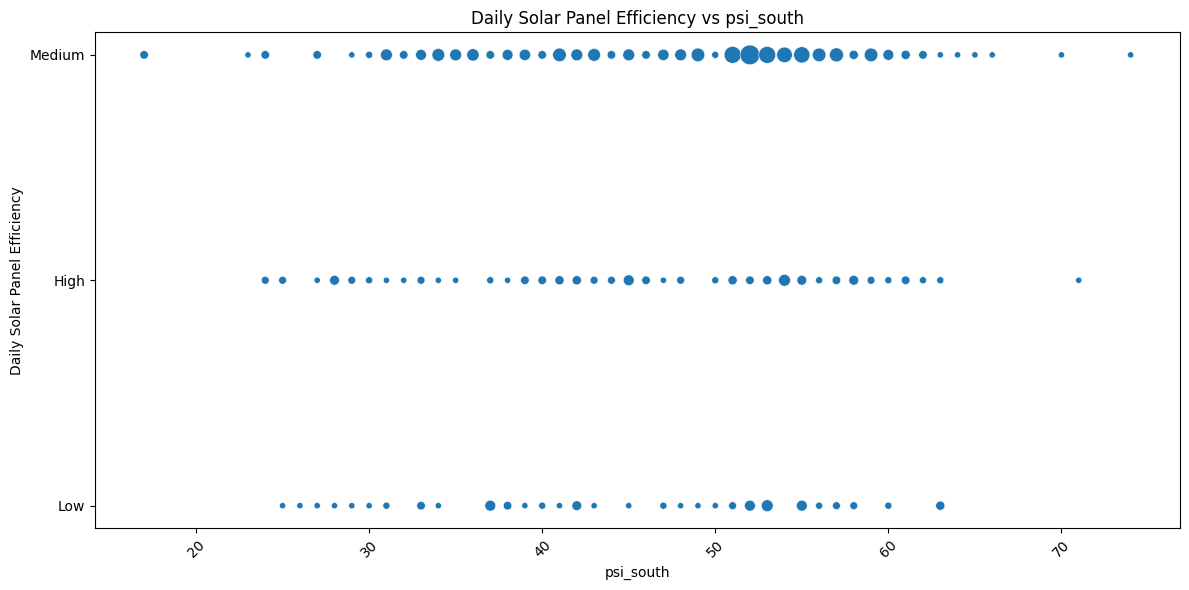

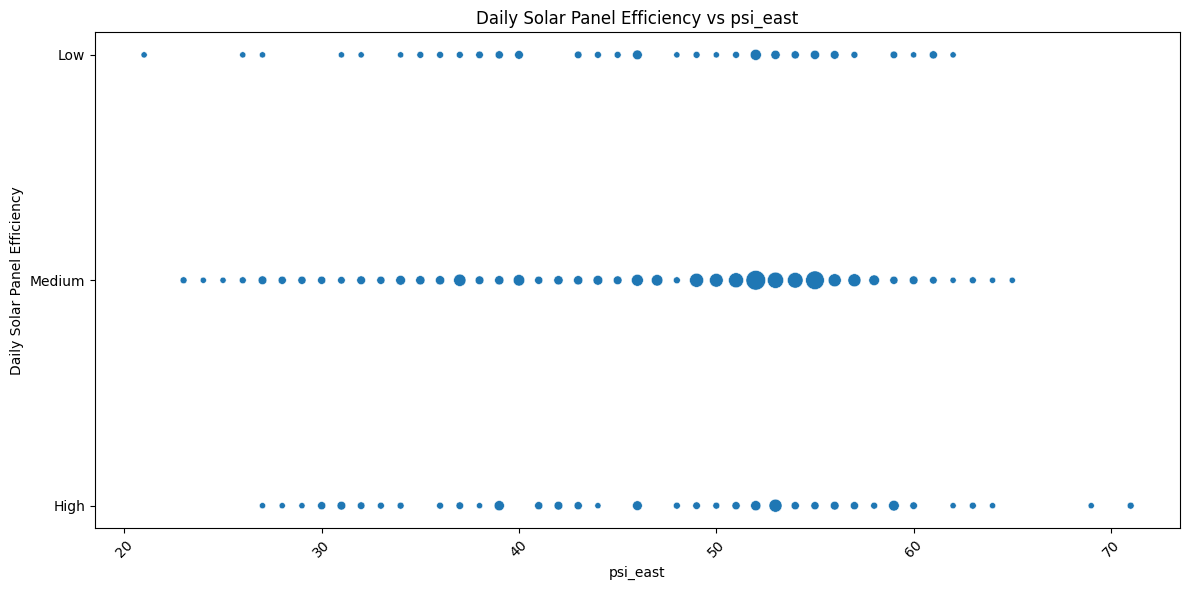

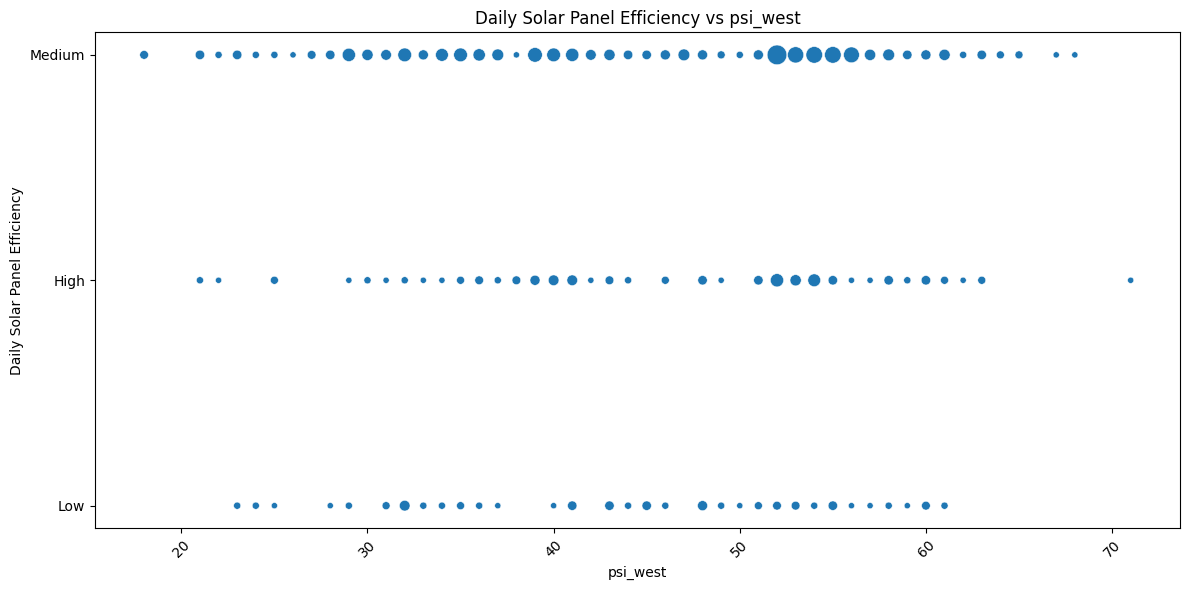

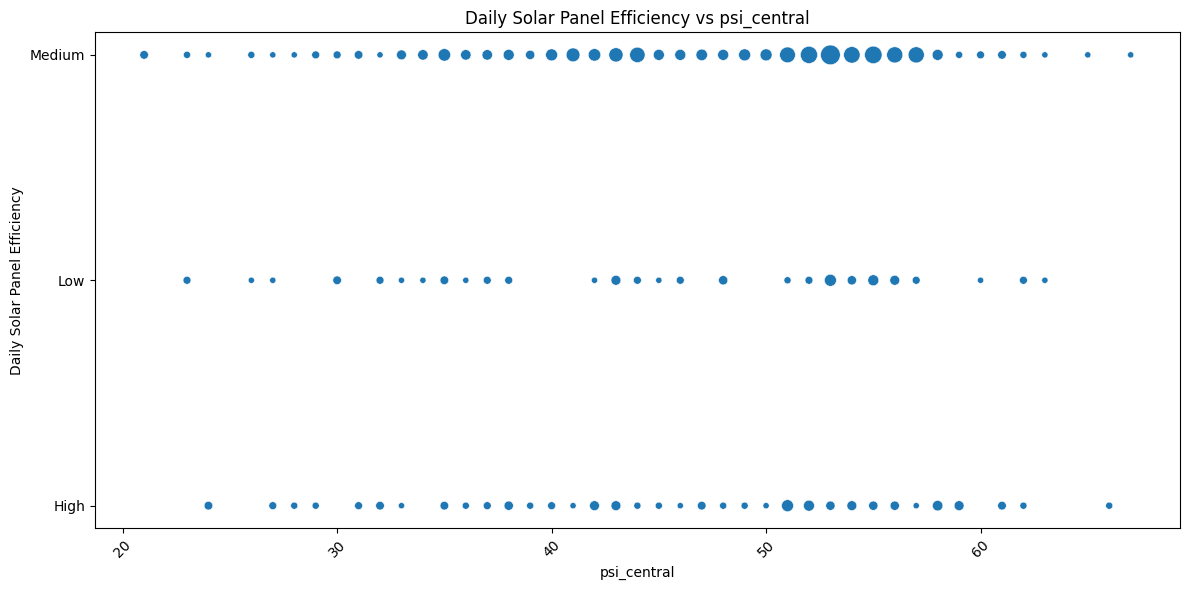

In [16]:
print("\nBivariate Analysis")
target_variable = 'Daily Solar Panel Efficiency'

for column in eda.df.columns:
    if column not in ['data_ref', 'date', target_variable]:
        eda.bivariate_analysis(column, target_variable)

### Key Observations

1. Wind Direction vs Daily Solar Panel Efficiency：
- South East winds are associated with the highest number of Medium efficiency days (35).
- North and North East winds are linked to a high number of Medium efficiency days (29 each).
- Low efficiency days are relatively evenly distributed across wind directions.
- High efficiency days are less common, with South having the most (10).

2. Dew Point Category vs Daily Solar Panel Efficiency
- High and Very High dew point categories are associated with the most Medium efficiency days (69 and 71 respectively).
- High efficiency days occur most often in High and Very High dew point conditions (27 each).
- Low efficiency days are rare across all dew point categories.
- Extreme dew point conditions are uncommon and show no clear pattern with efficiency.

3. Daily Solar Panel Efficiency vs Relative Humidity
- Medium efficiency is observed across a wide range of humidity levels.
- High efficiency tends to occur at lower to mid-range humidity levels.
- Low efficiency is less common and appears across various humidity levels.
- There's no clear linear relationship between humidity and efficiency.

4. Daily Solar Panel Efficiency vs Wet Bulb Temperature
- Medium efficiency occurs across the entire range of wet bulb temperatures.
- High efficiency tends to be more common at higher wet bulb temperatures.
- Low efficiency is observed across various wet bulb temperatures but is less frequent.
- There's a slight trend suggesting higher wet bulb temperatures may favor better efficiency.

---

## Multivariate Analysis


Multivariate Analysis


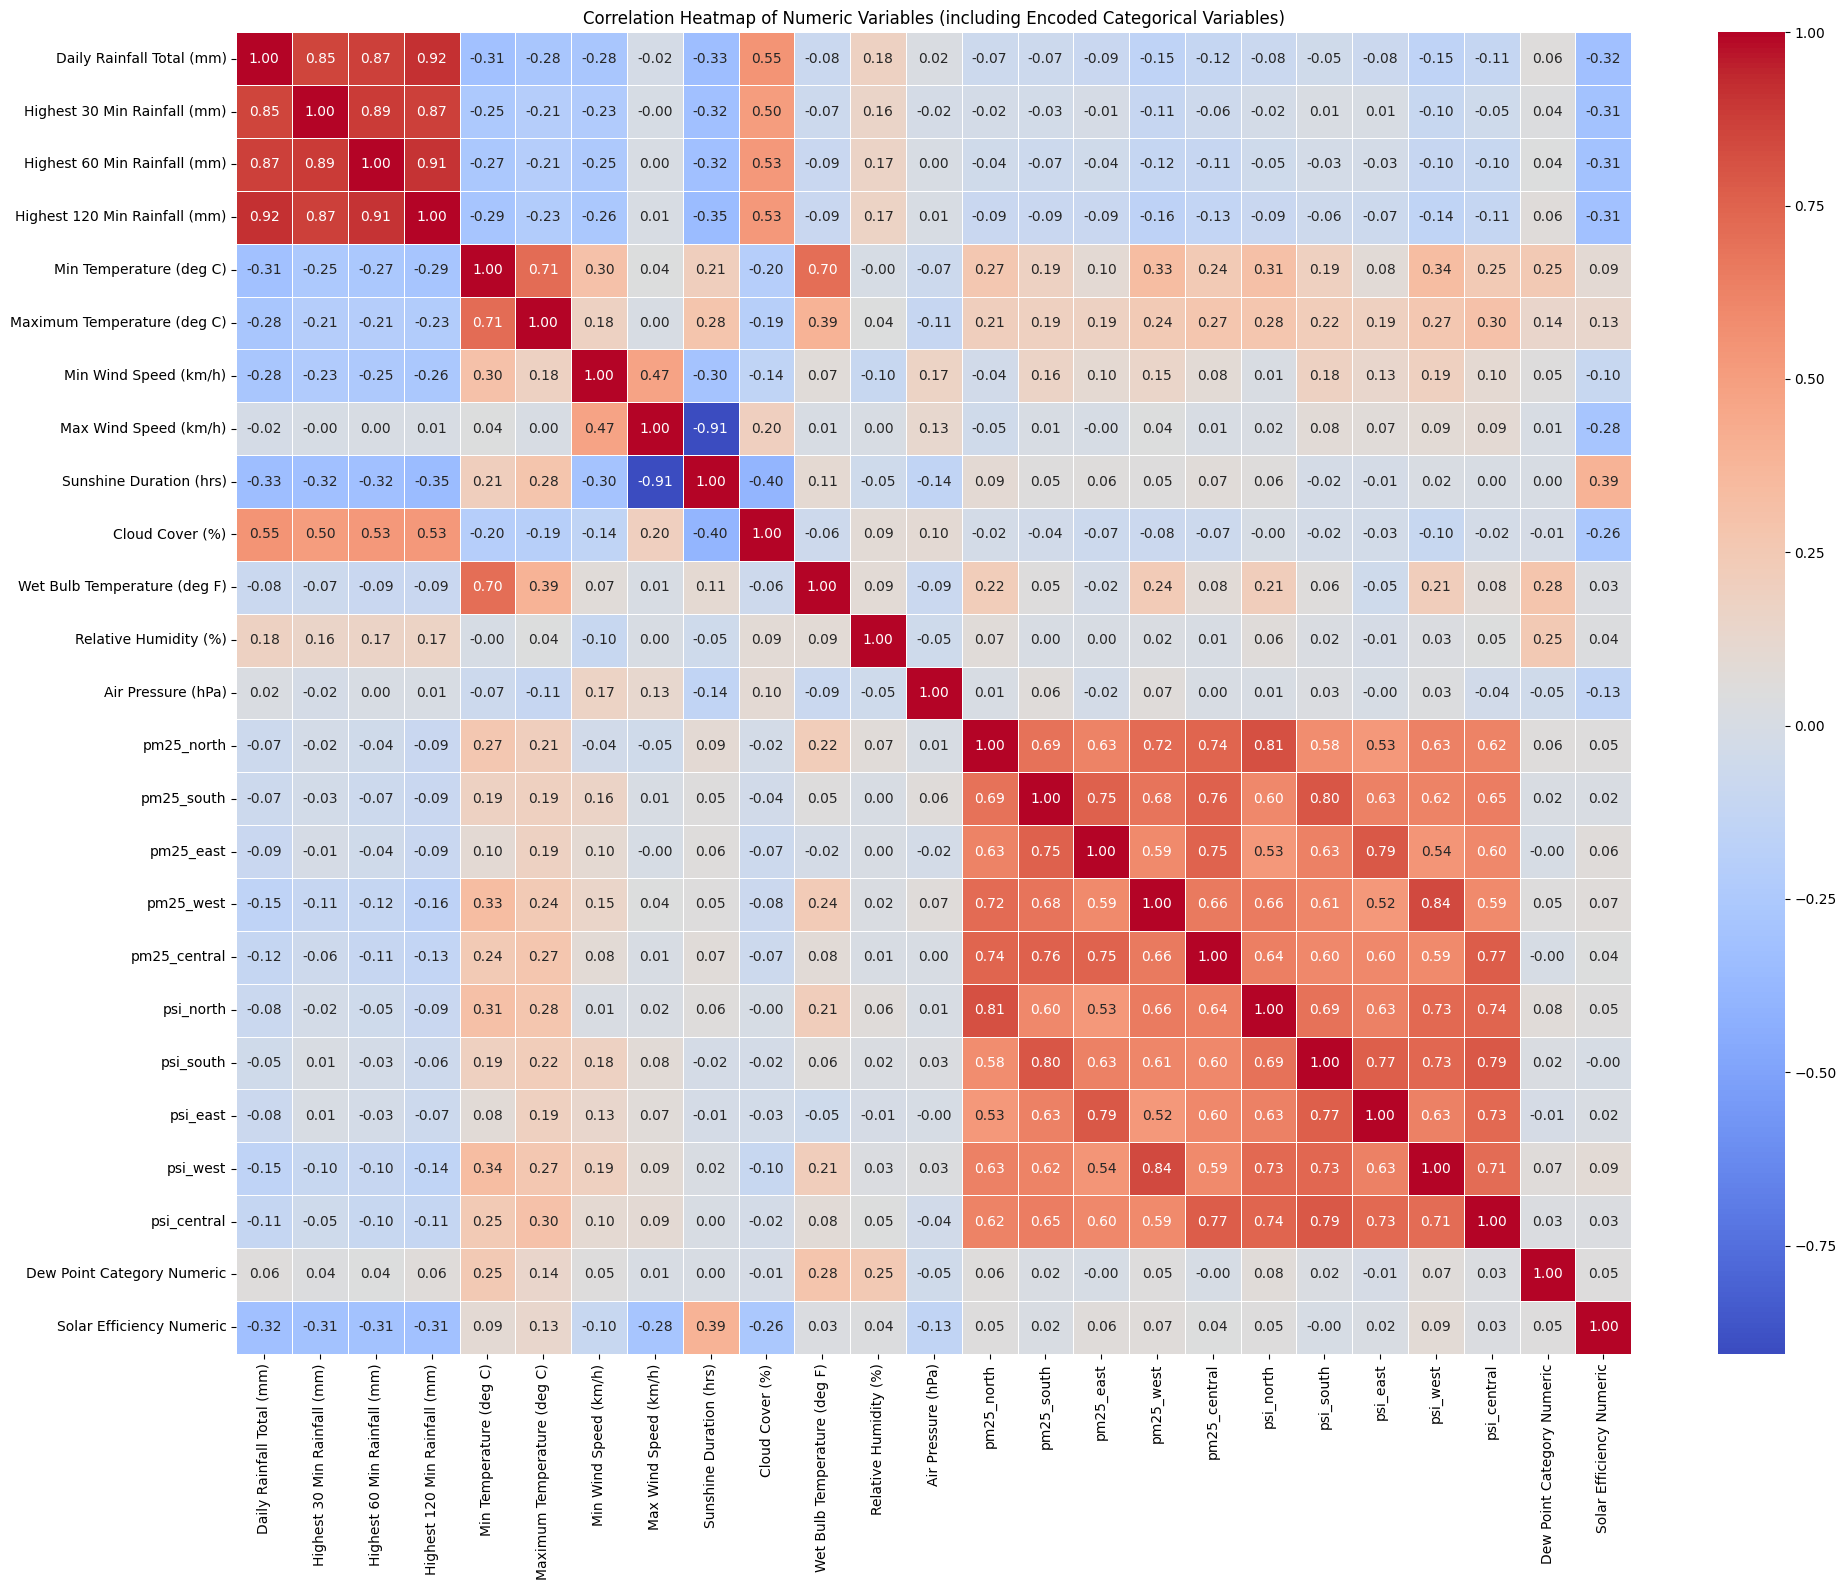

In [60]:
print("\nMultivariate Analysis")
eda.multivariate_analysis()

### Key Observations

From the correlation heatmap, it can be observed that:
1. Strong Positive Correlations:
   - PM2.5 measurements (pm25_north, pm25_south, pm25_east, pm25_west, pm25_central) show very strong positive correlations with each other (0.97-1.00).
   - PSI measurements (psi_north, psi_south, psi_east, psi_west, psi_central) also exhibit strong positive correlations among themselves (0.98-1.00).
   - PM2.5 and PSI measurements are strongly positively correlated with each other (0.97-1.00), indicating a close relationship between these air quality metrics.

2. Moderate Positive Correlations:
   - Minimum and Maximum Temperature show a moderate positive correlation (0.67).
   - Rainfall measurements (30 min, 60 min, 120 min) are moderately to strongly correlated with each other (0.77-0.90).

3. Weak to Moderate Negative Correlations:
   - Temperature (both min and max) shows weak to moderate negative correlations with relative humidity (-0.40 to -0.54).
   - Cloud Cover has weak negative correlations with Sunshine Duration (-0.37) and Temperature (-0.31 to -0.38).

From the pairplot, it can be observed that:
   - PM2.5 and PSI show the strongest relationship among all variable pairs.
   - Temperature shows a weak positive relationship with air quality metrics (PM2.5 and PSI).
   - Relative humidity doesn't show strong linear relationships with other variables, but is clearly associated with dew point categories.

---

## Time Series Analysis

In [54]:
eda.df.columns

Index(['data_ref', 'date', 'Daily Rainfall Total (mm)',
       'Highest 30 Min Rainfall (mm)', 'Highest 60 Min Rainfall (mm)',
       'Highest 120 Min Rainfall (mm)', 'Min Temperature (deg C)',
       'Maximum Temperature (deg C)', 'Min Wind Speed (km/h)',
       'Max Wind Speed (km/h)', 'Sunshine Duration (hrs)', 'Cloud Cover (%)',
       'Wet Bulb Temperature (deg F)', 'Relative Humidity (%)',
       'Air Pressure (hPa)', 'Dew Point Category', 'Wind Direction',
       'Daily Solar Panel Efficiency', 'pm25_north', 'pm25_south', 'pm25_east',
       'pm25_west', 'pm25_central', 'psi_north', 'psi_south', 'psi_east',
       'psi_west', 'psi_central', 'Dew Point Category Numeric',
       'Solar Efficiency Numeric'],
      dtype='object')


Time Series Analysis


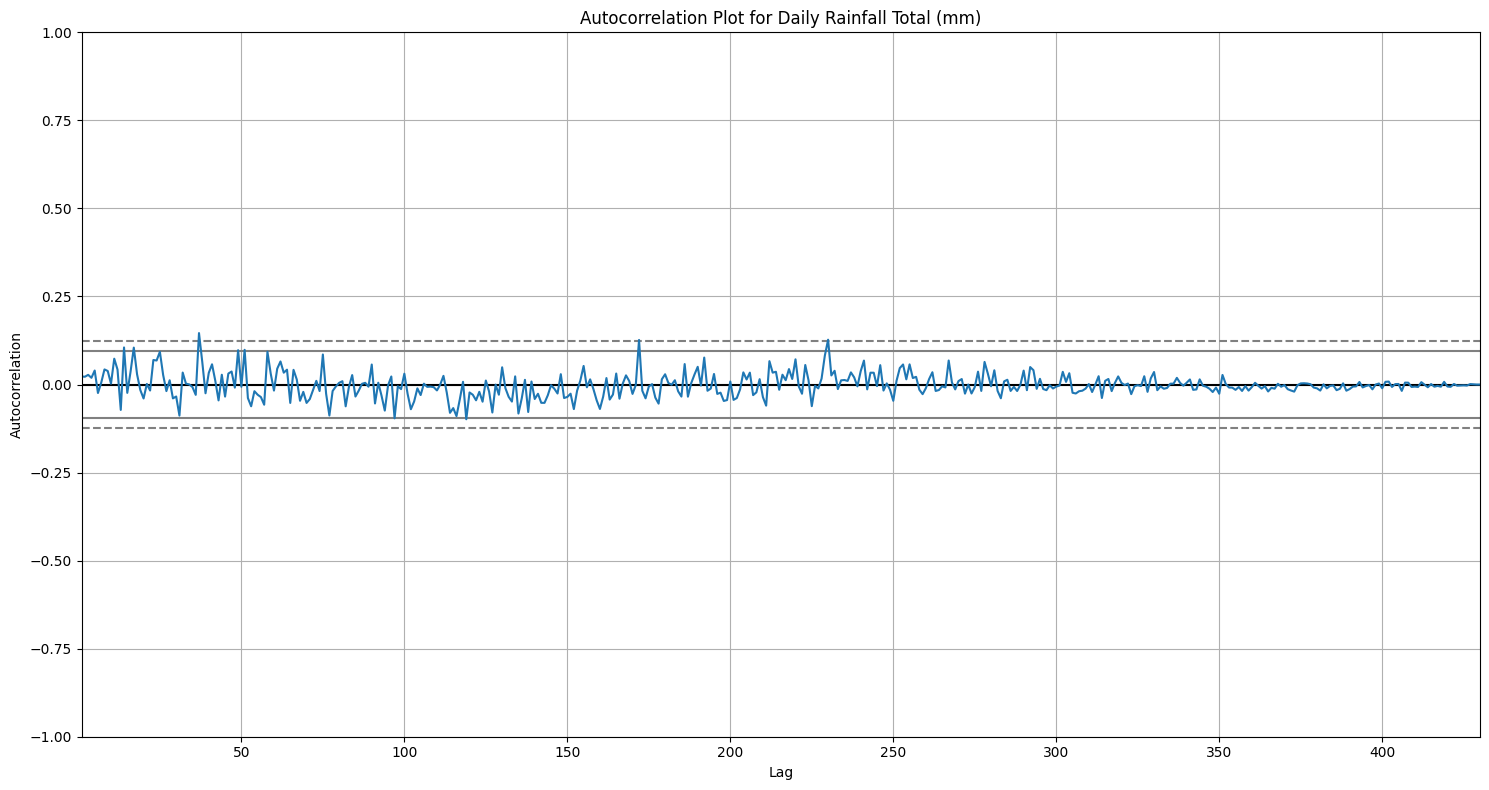

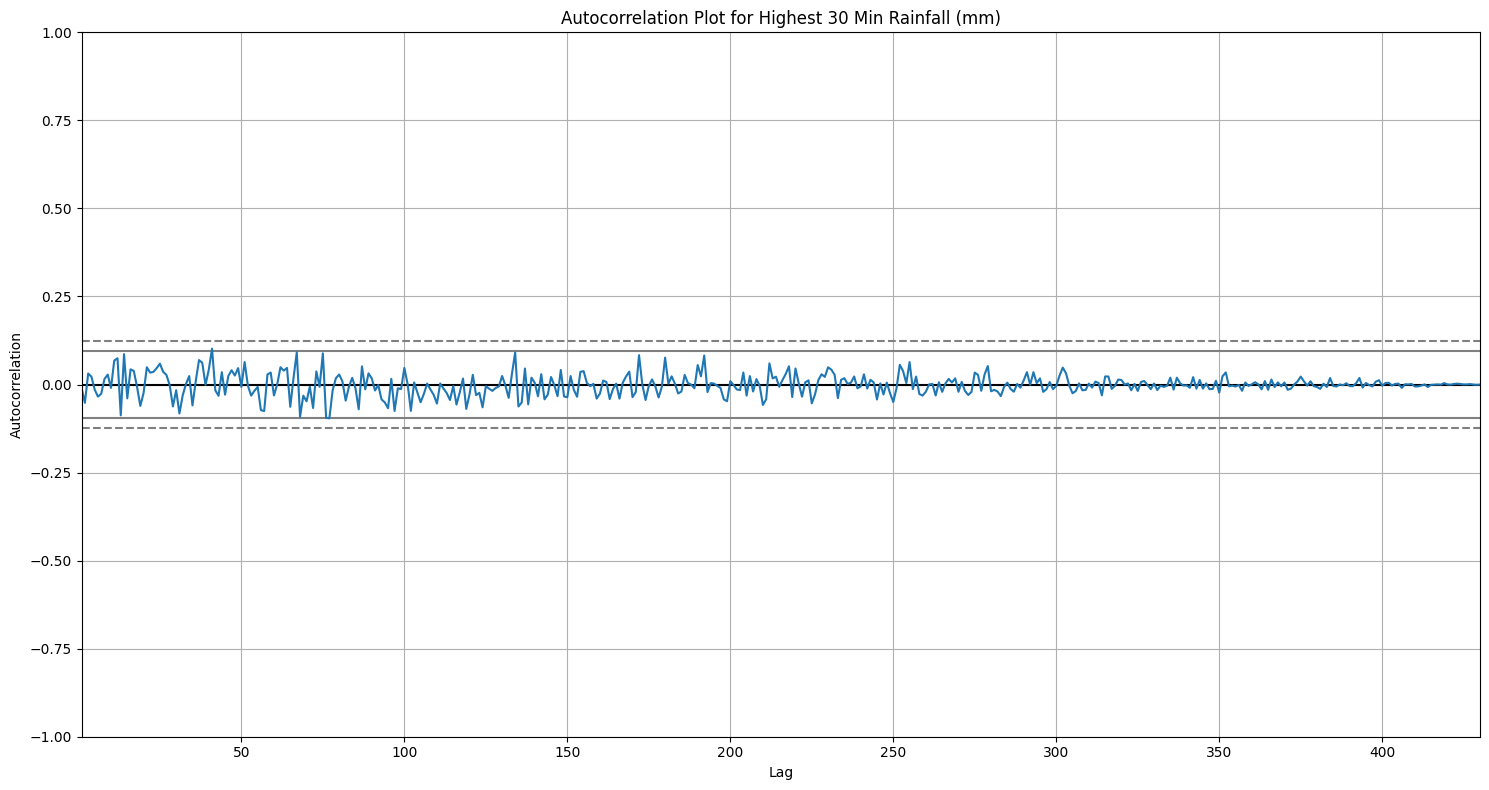

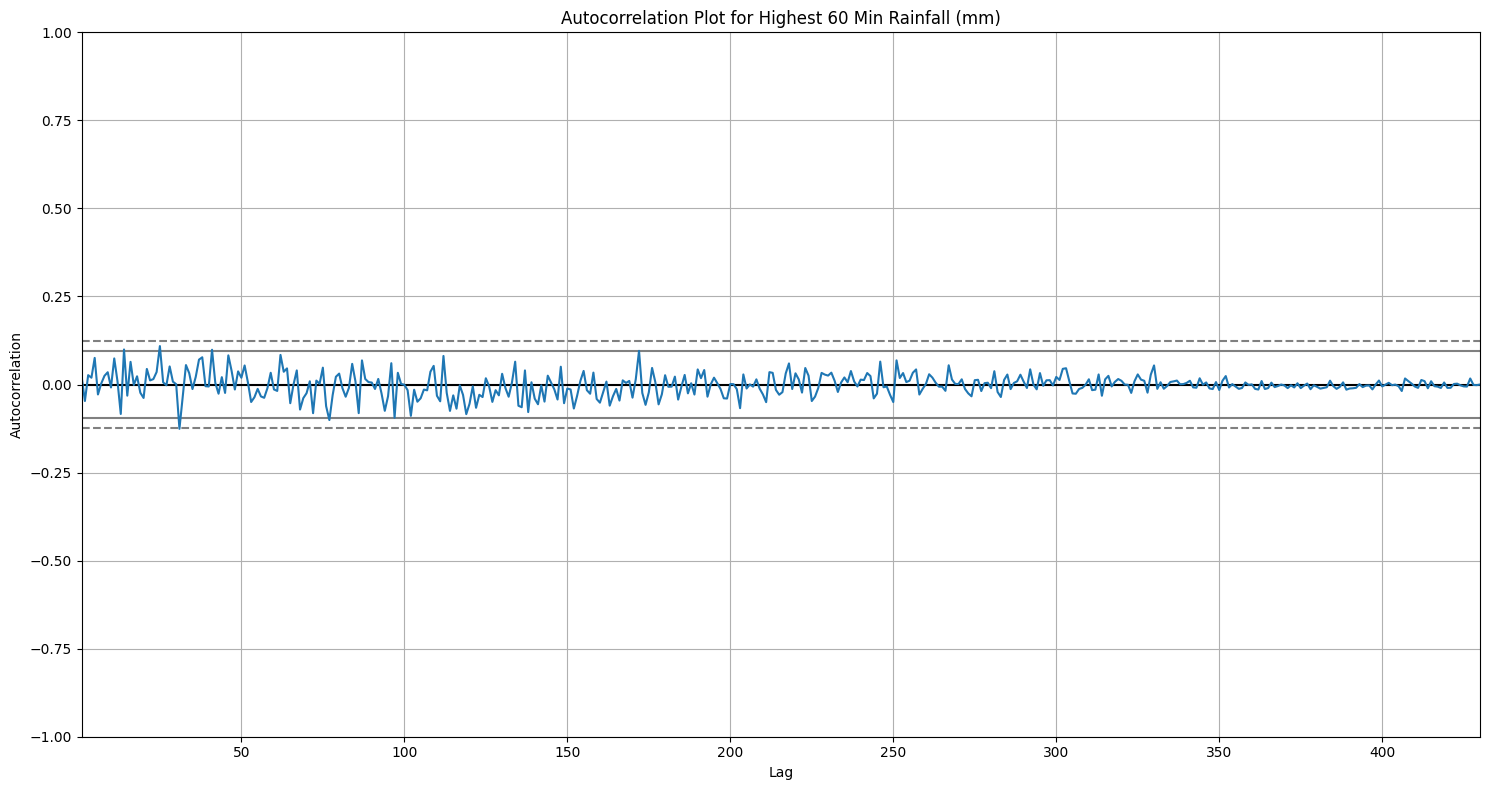

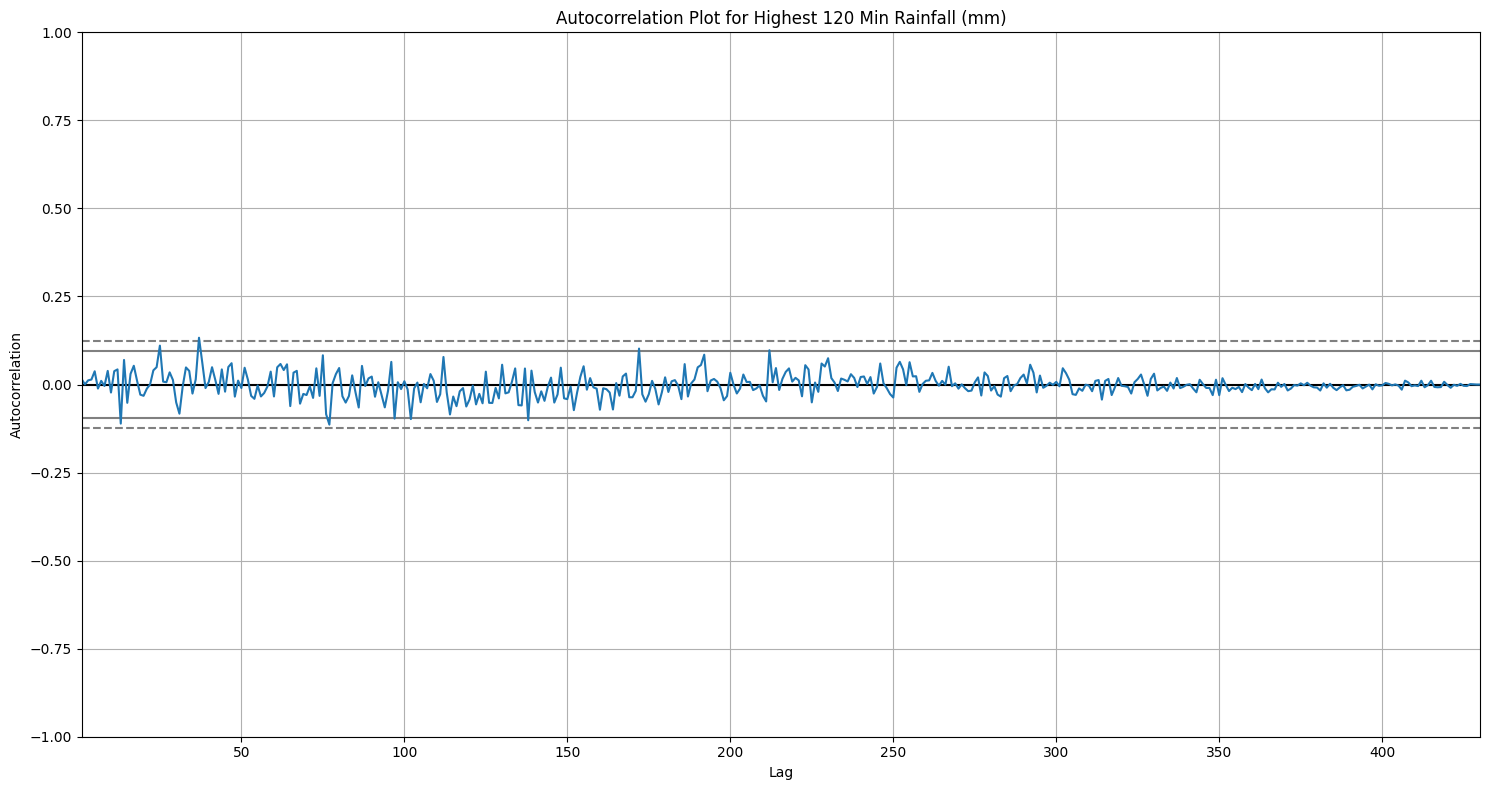

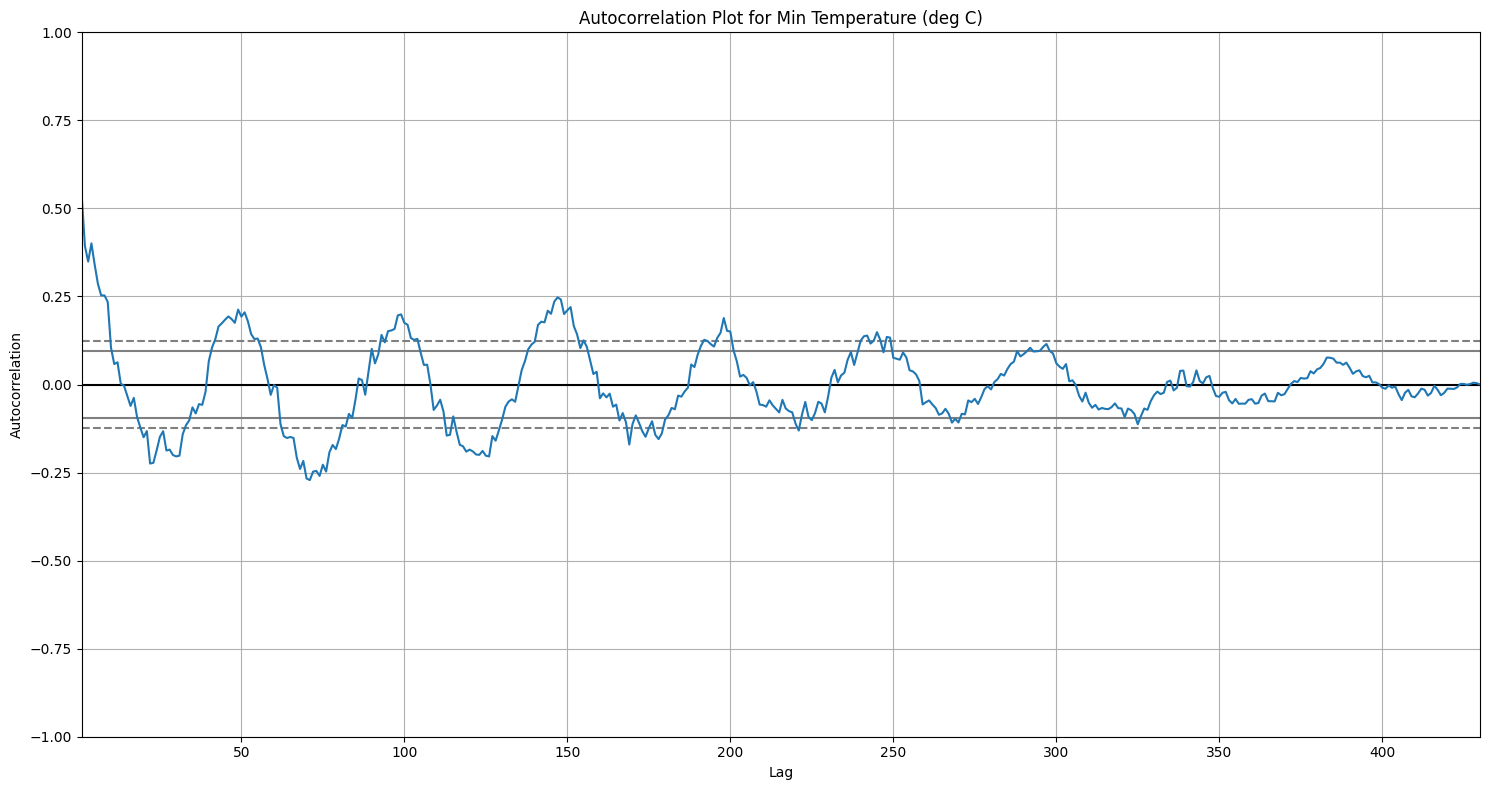

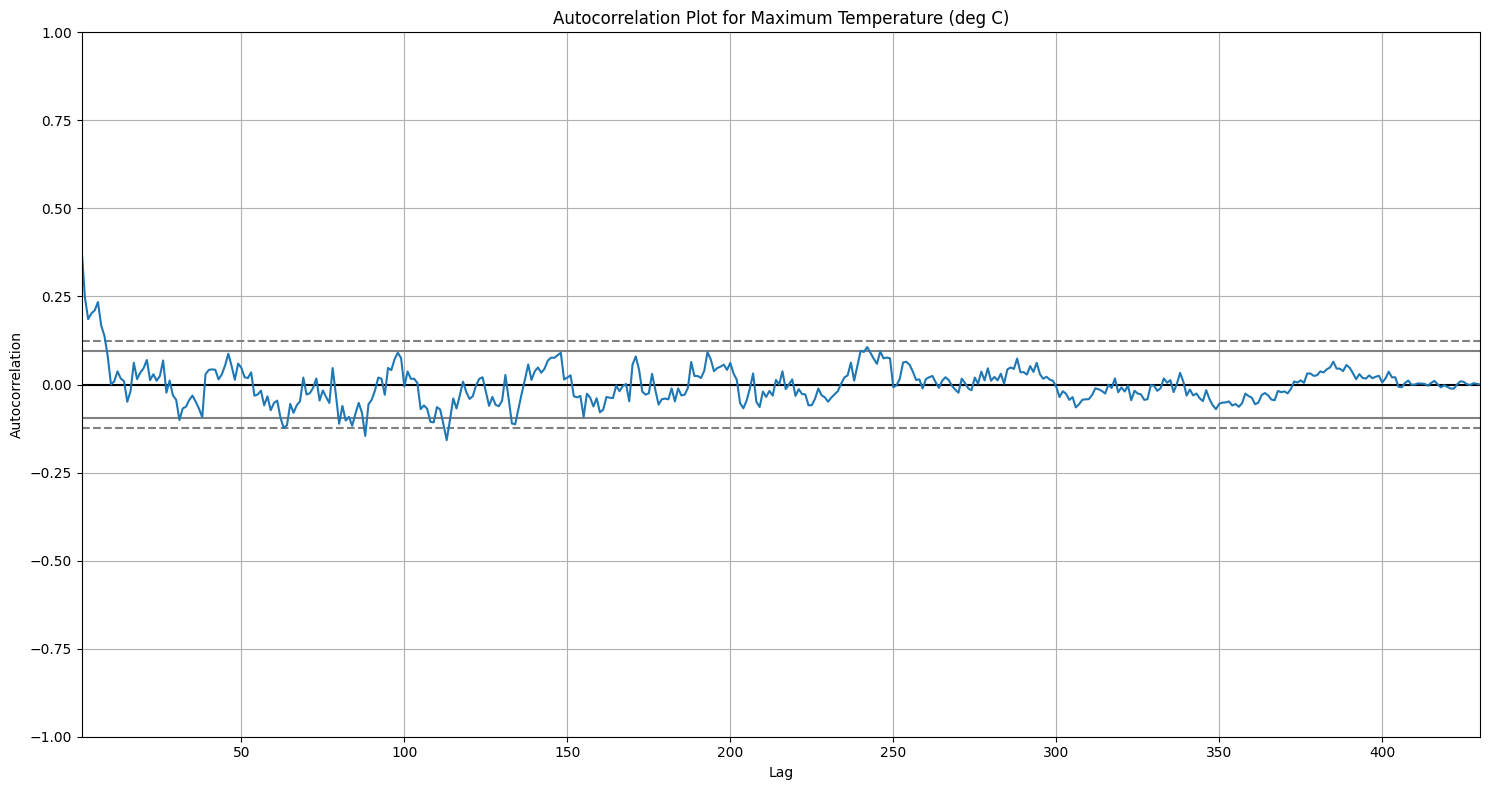

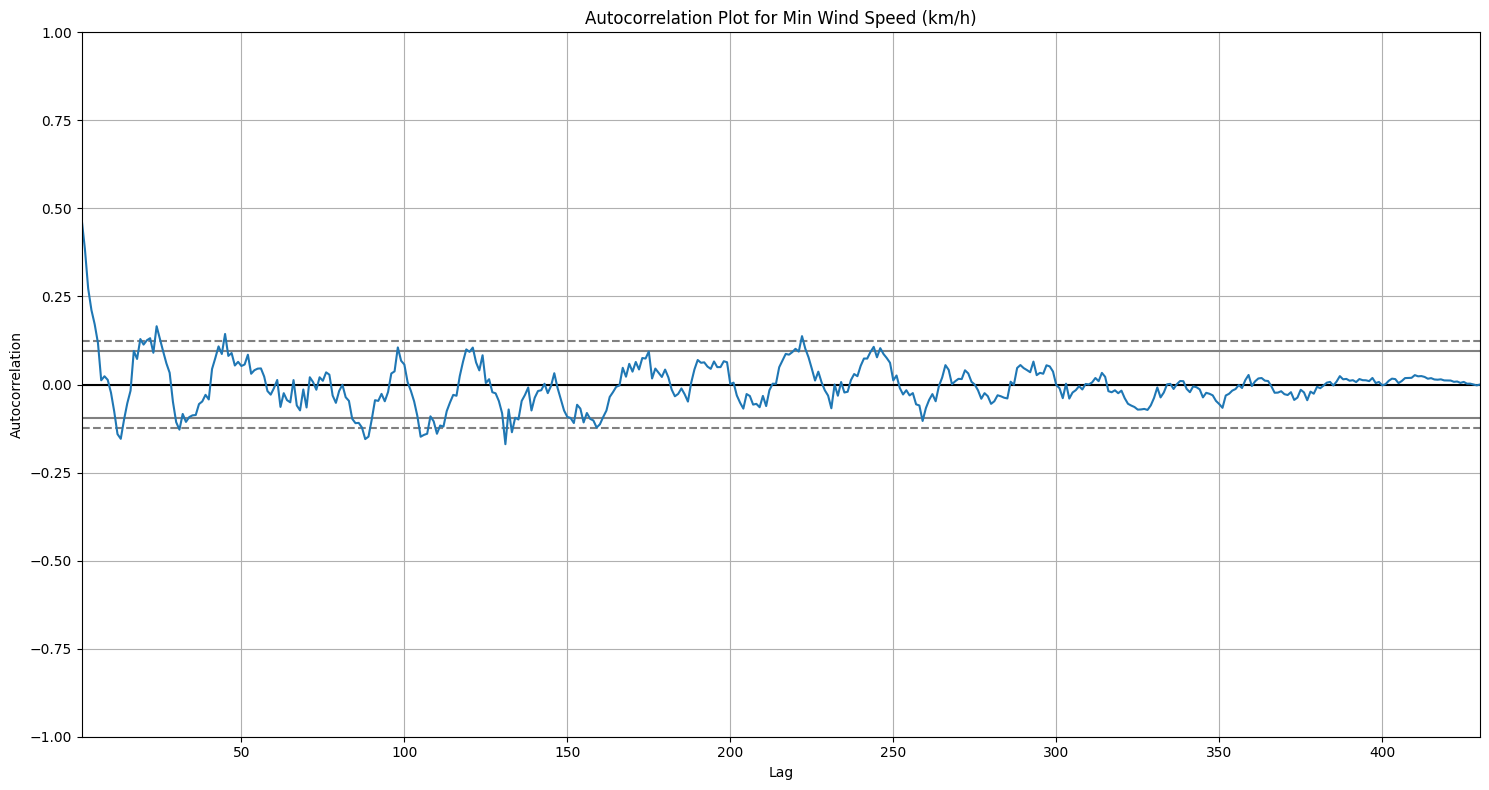

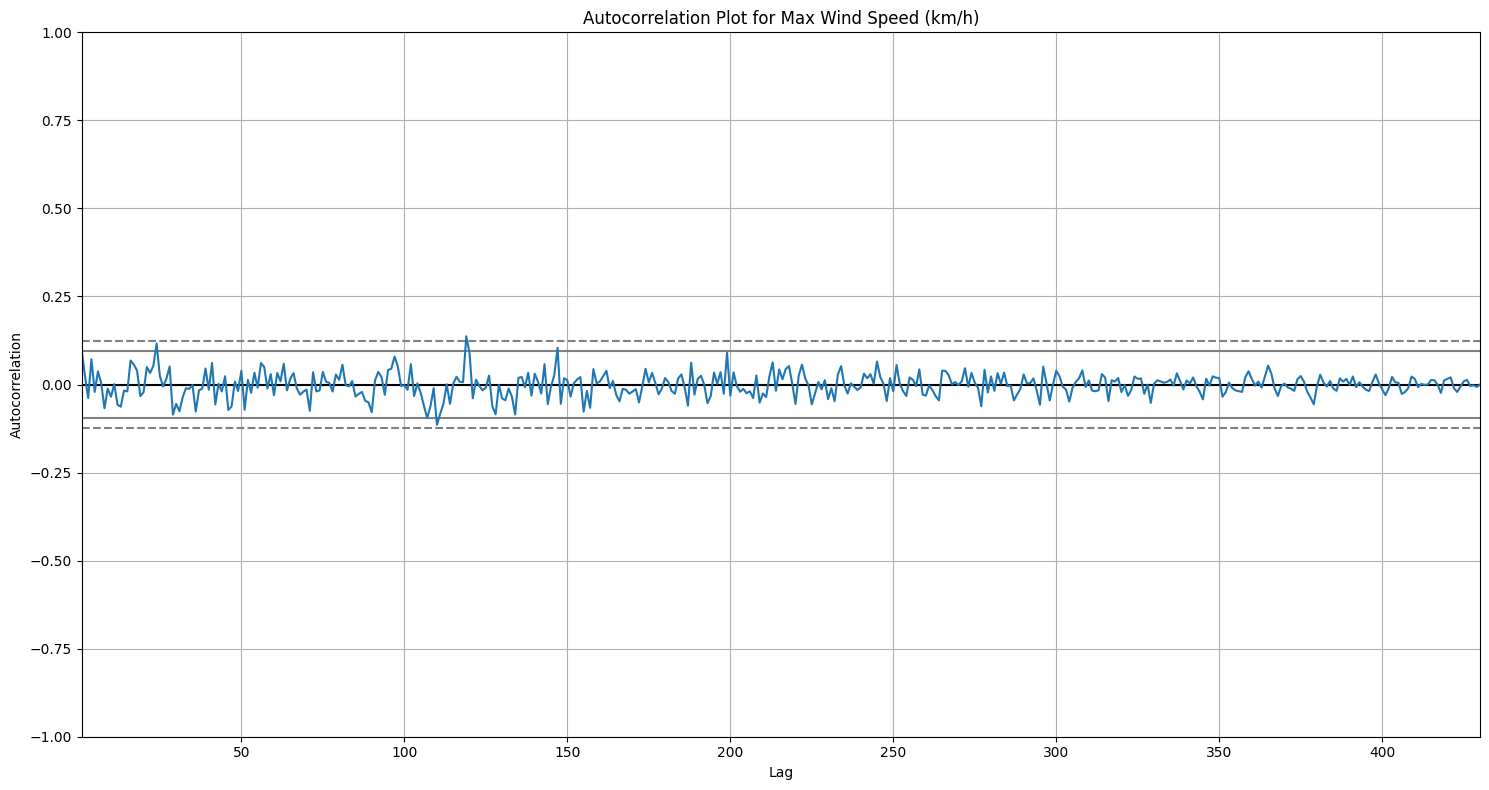

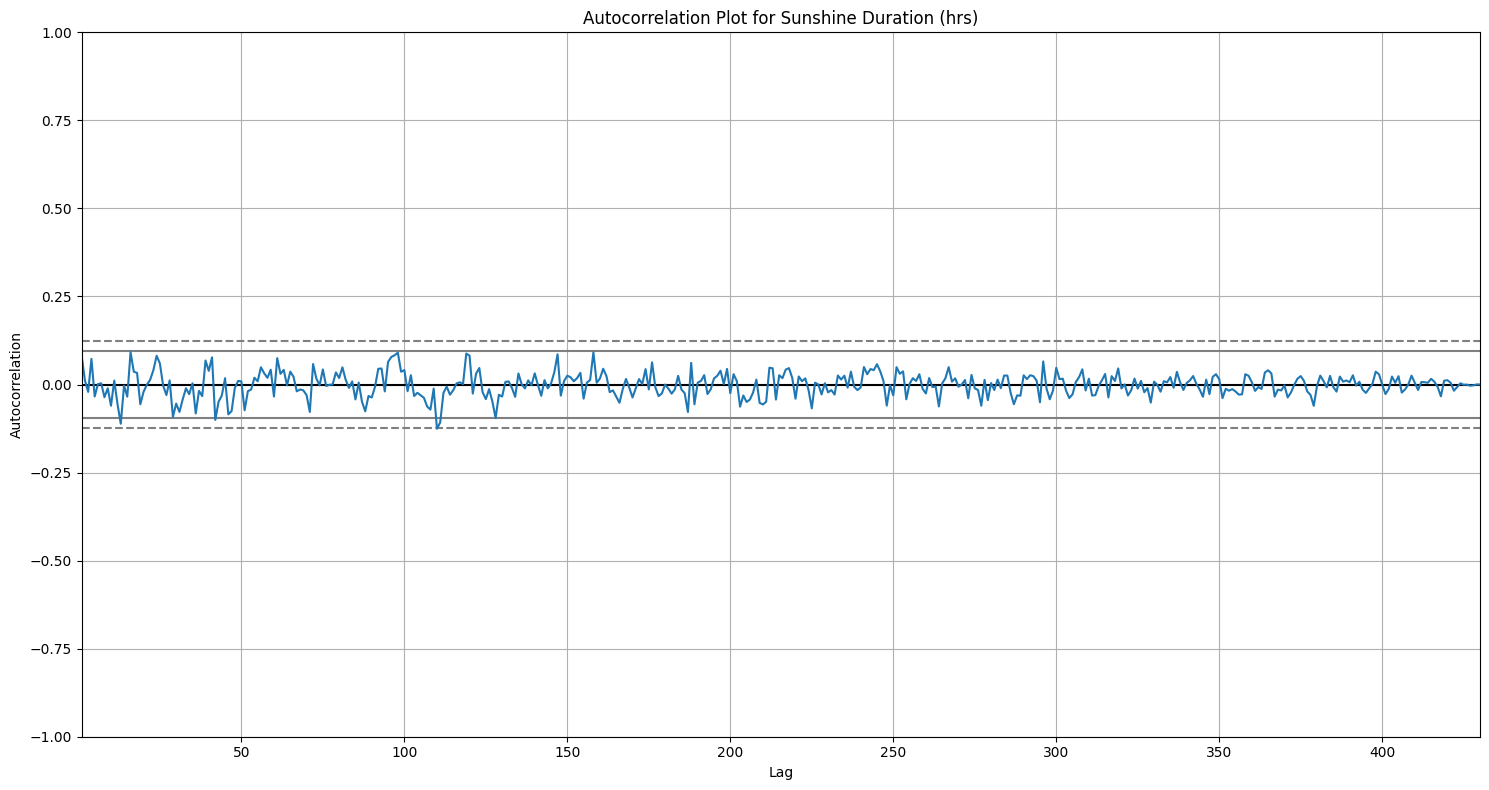

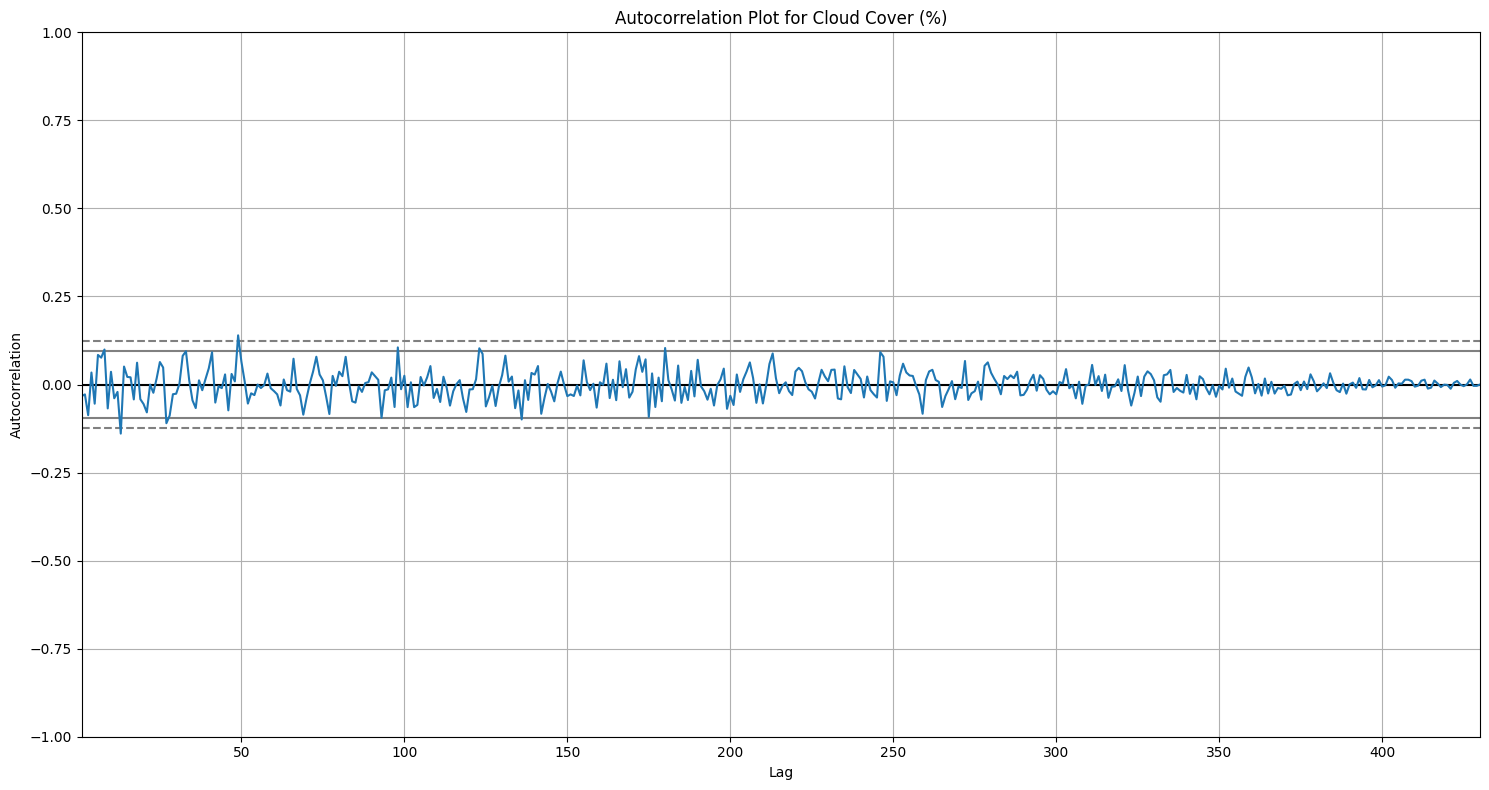

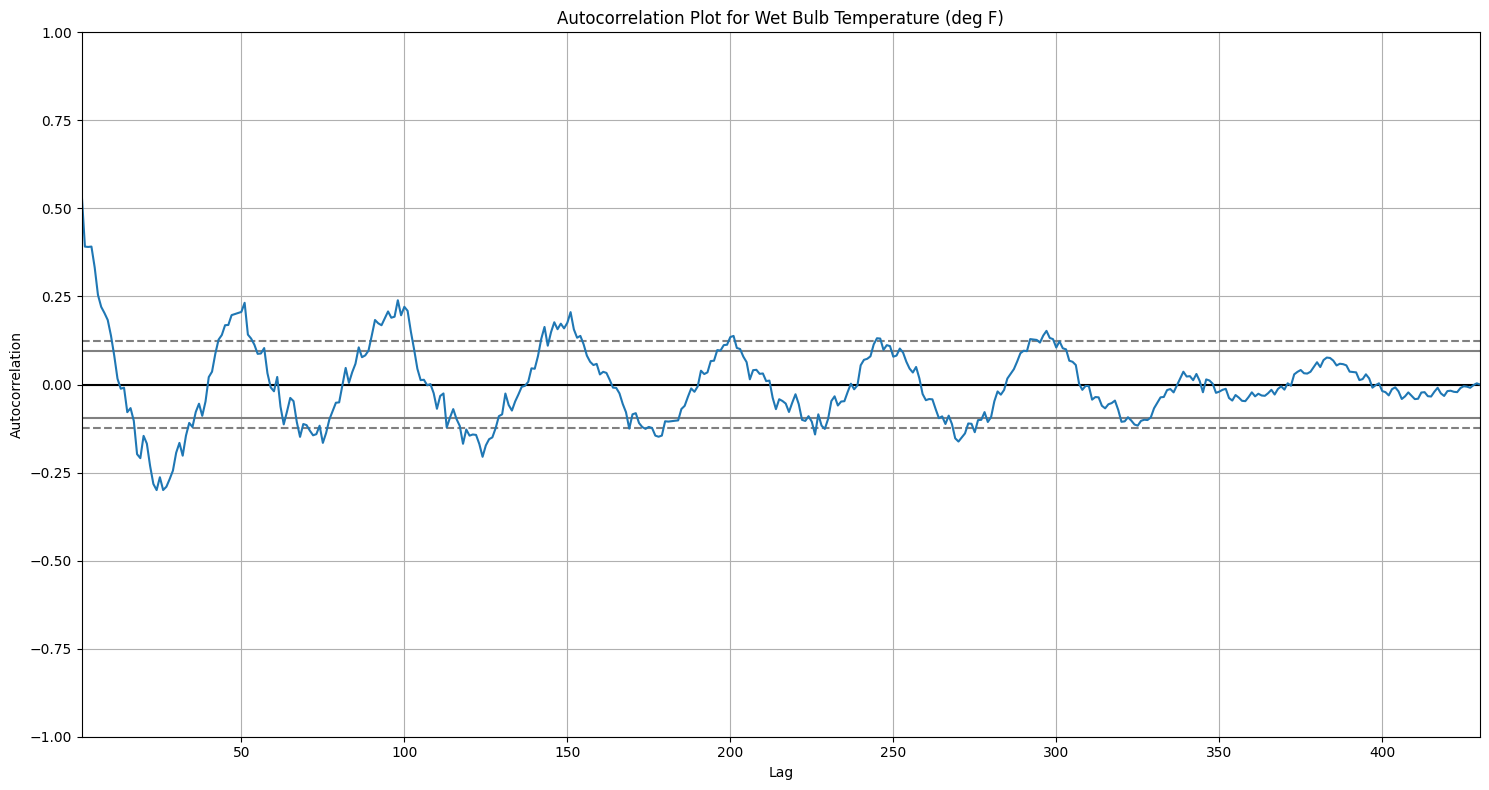

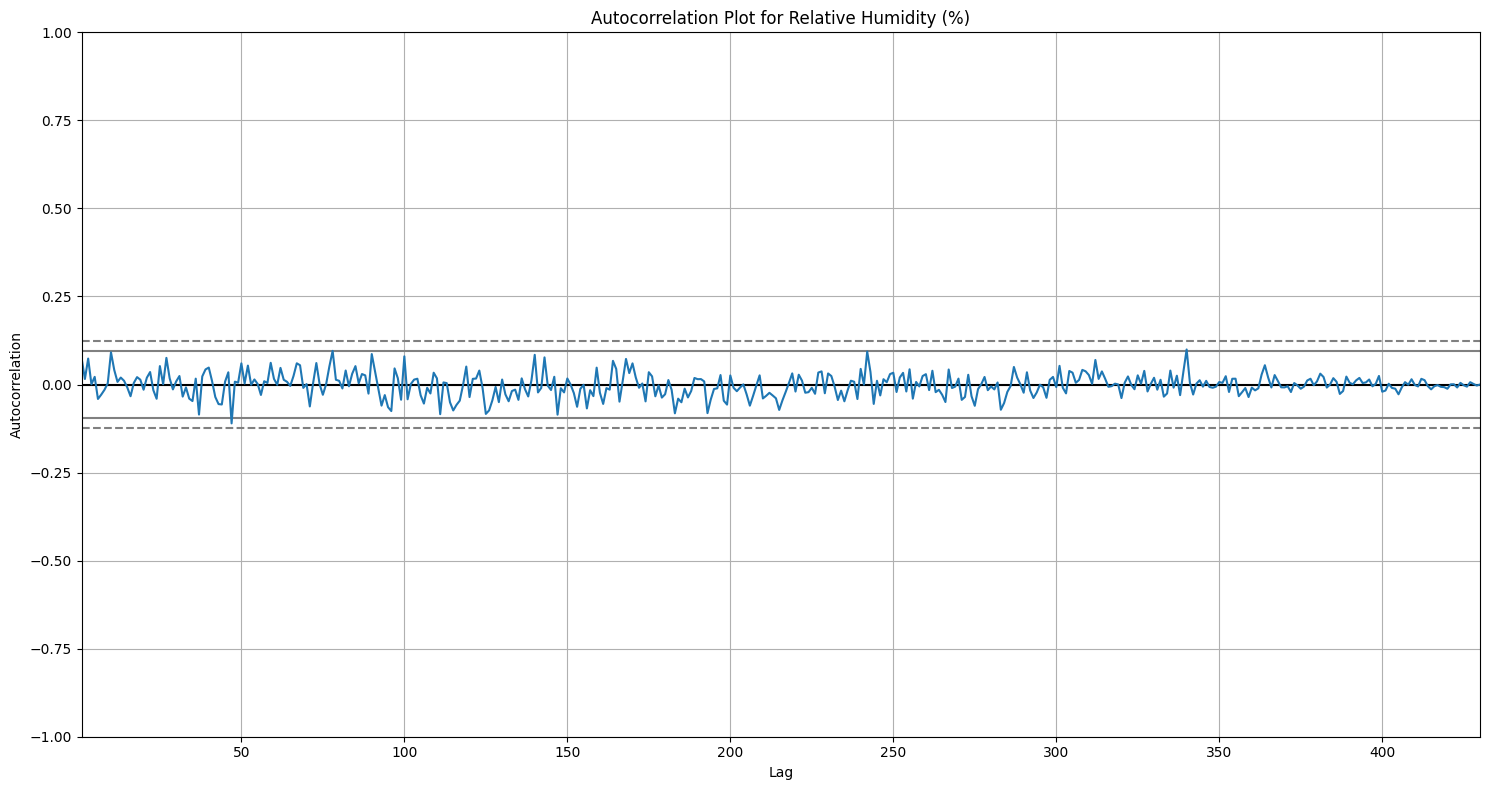

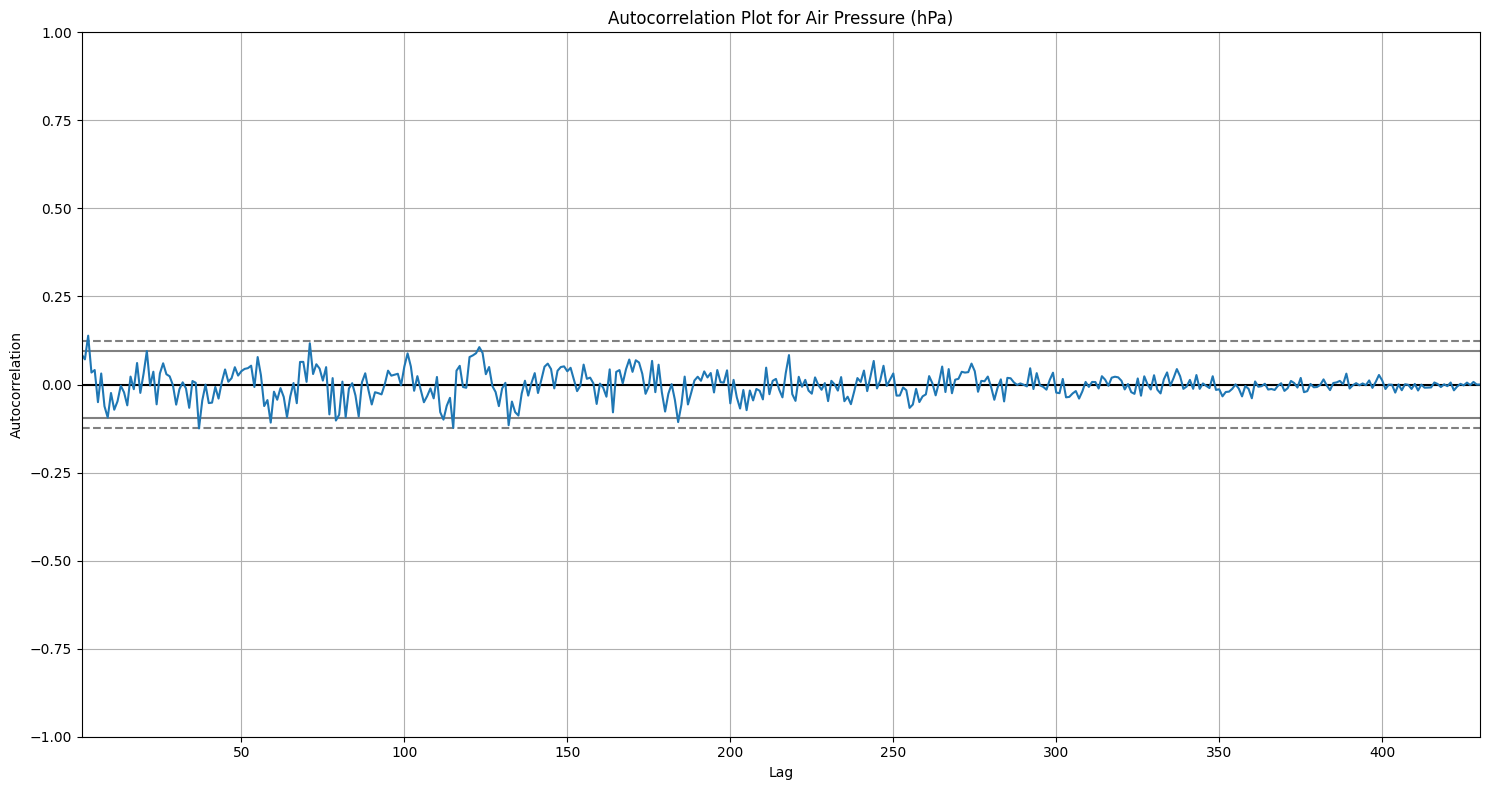

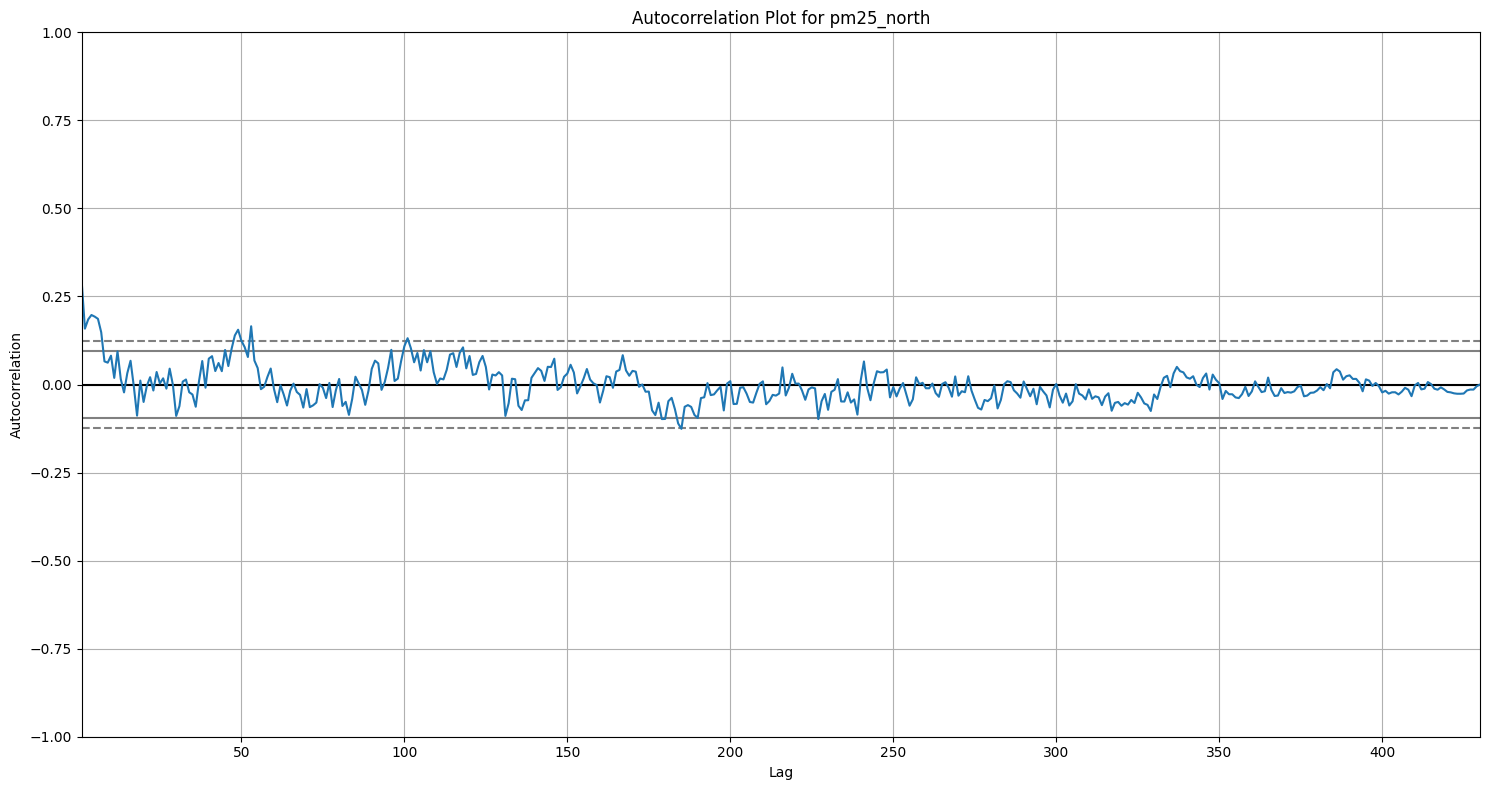

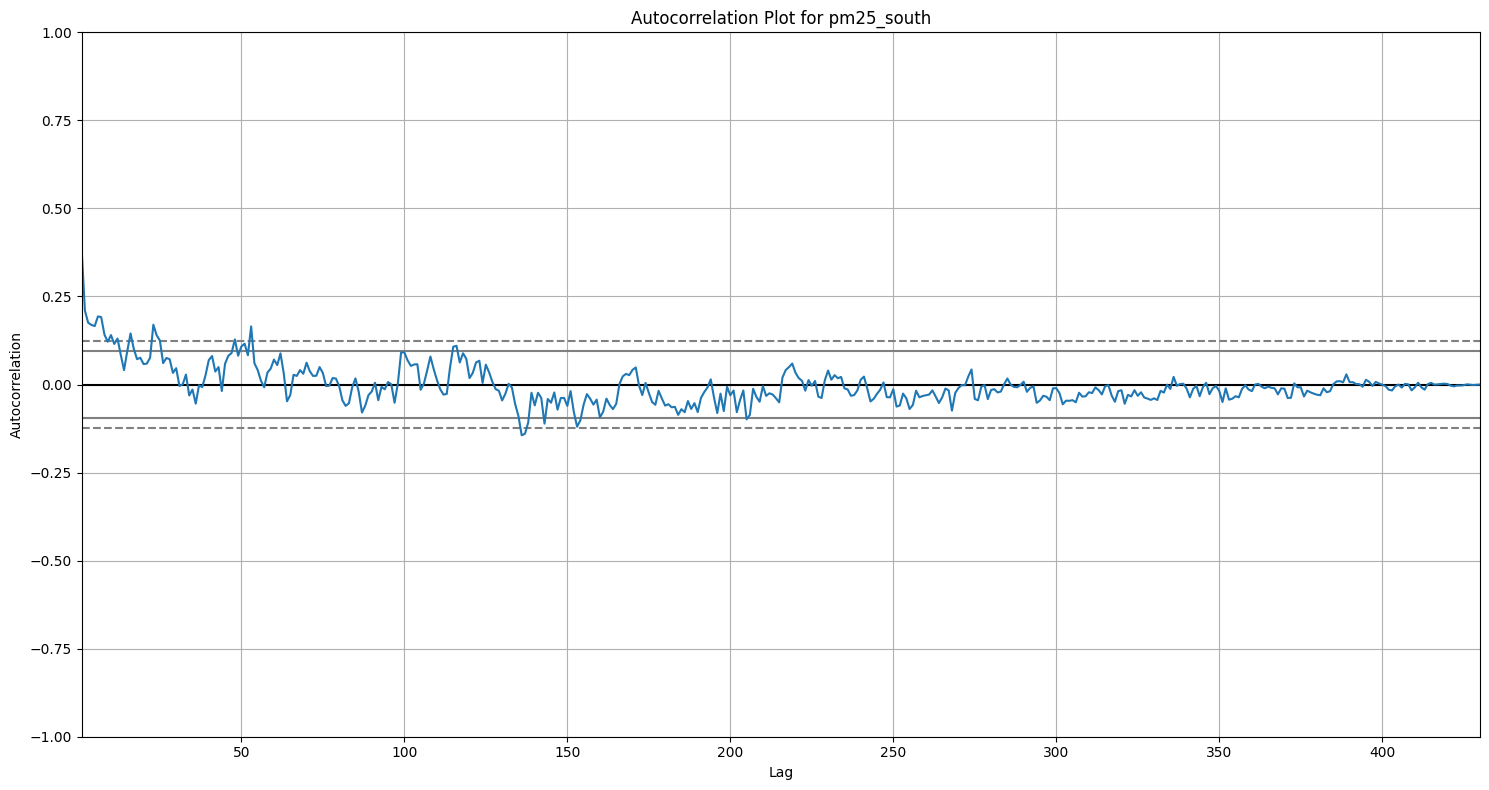

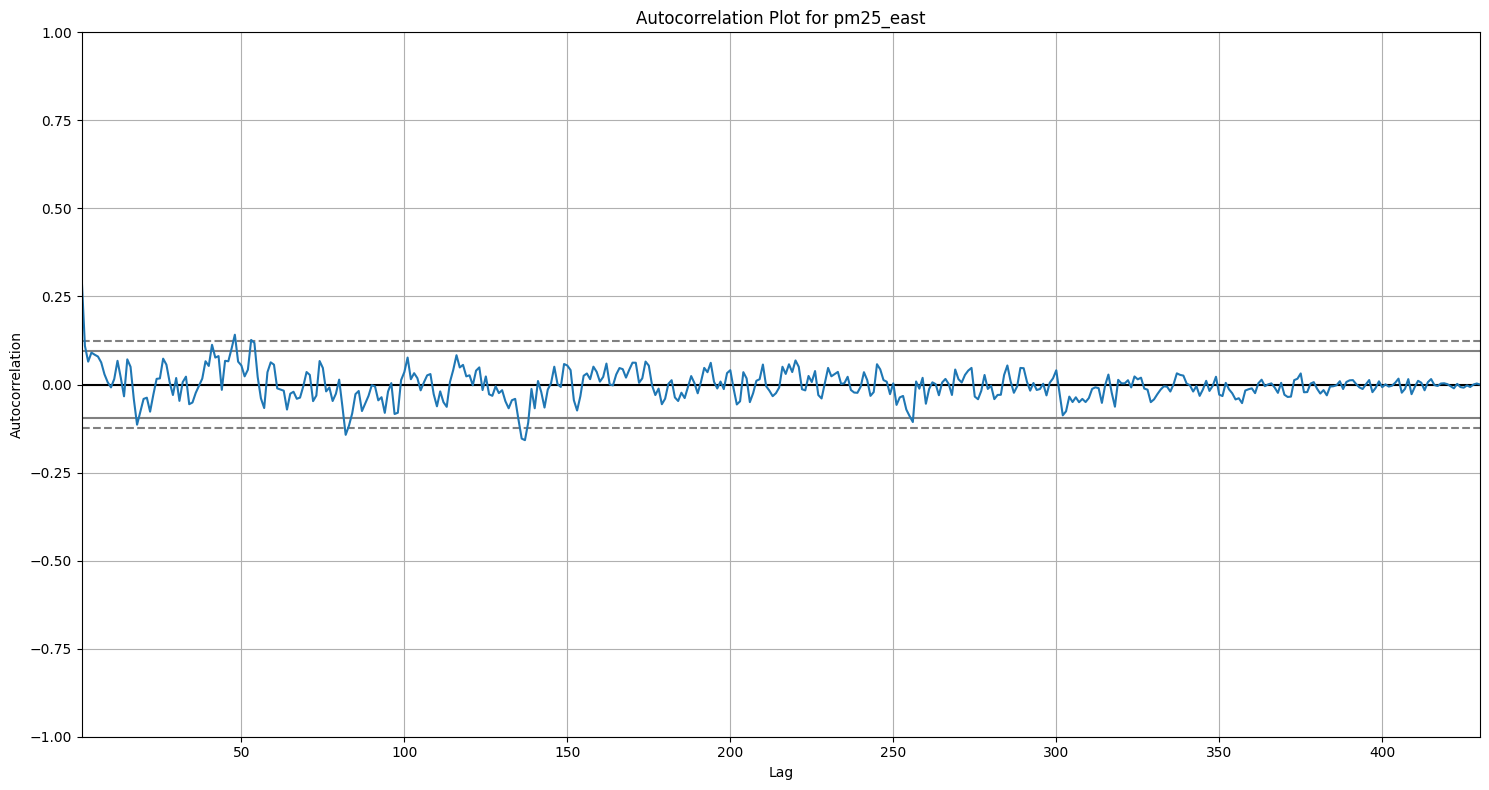

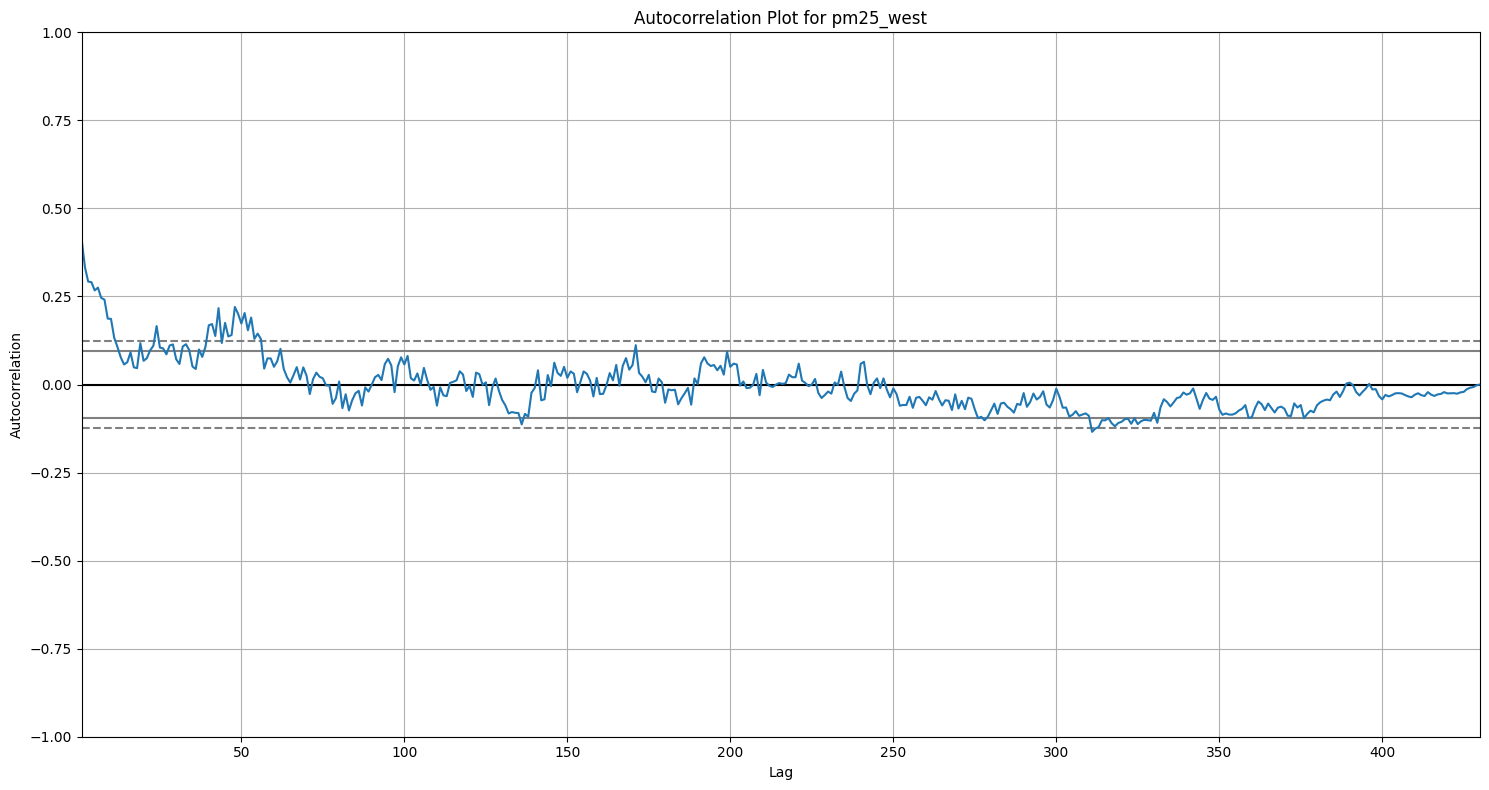

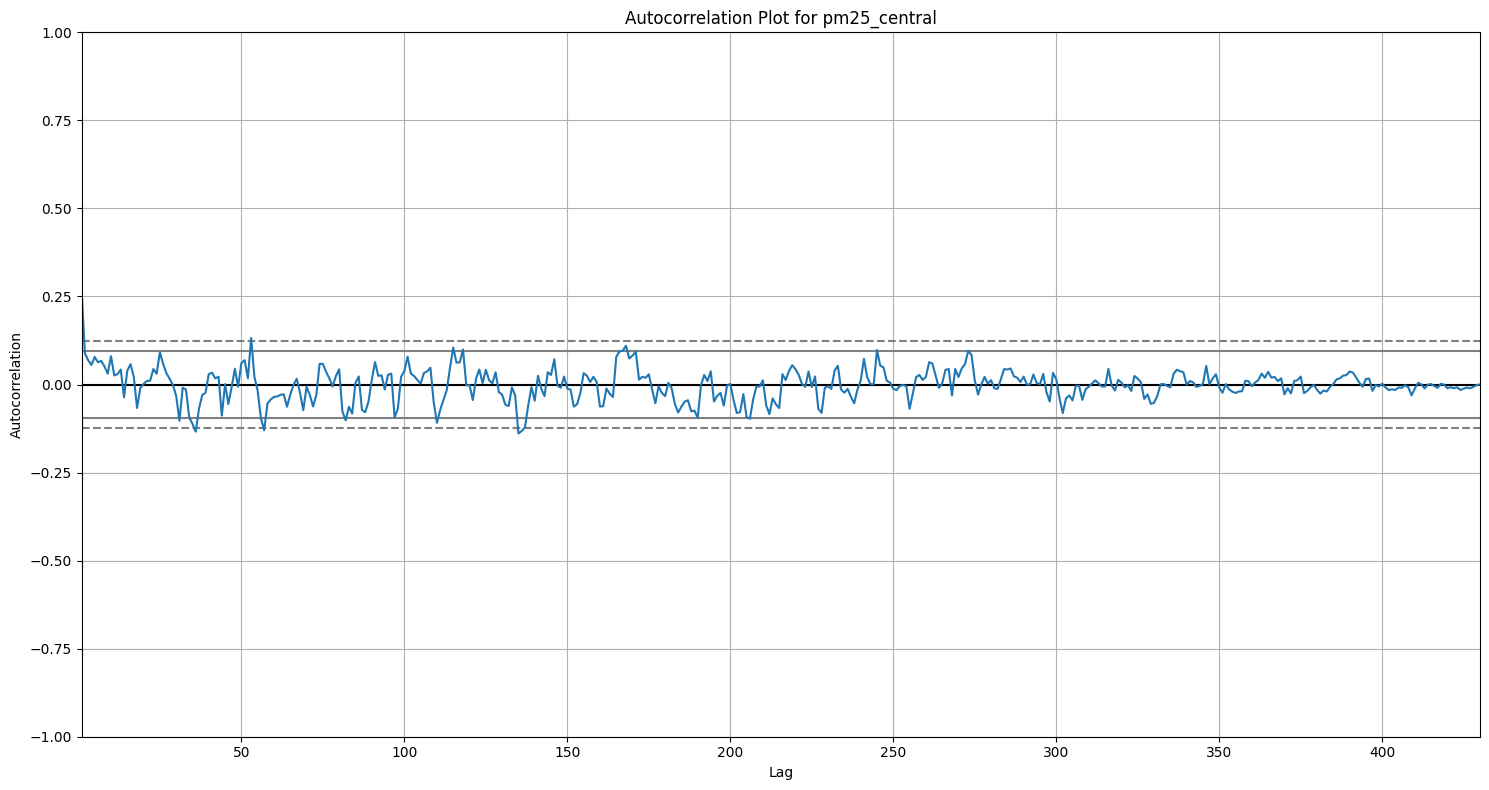

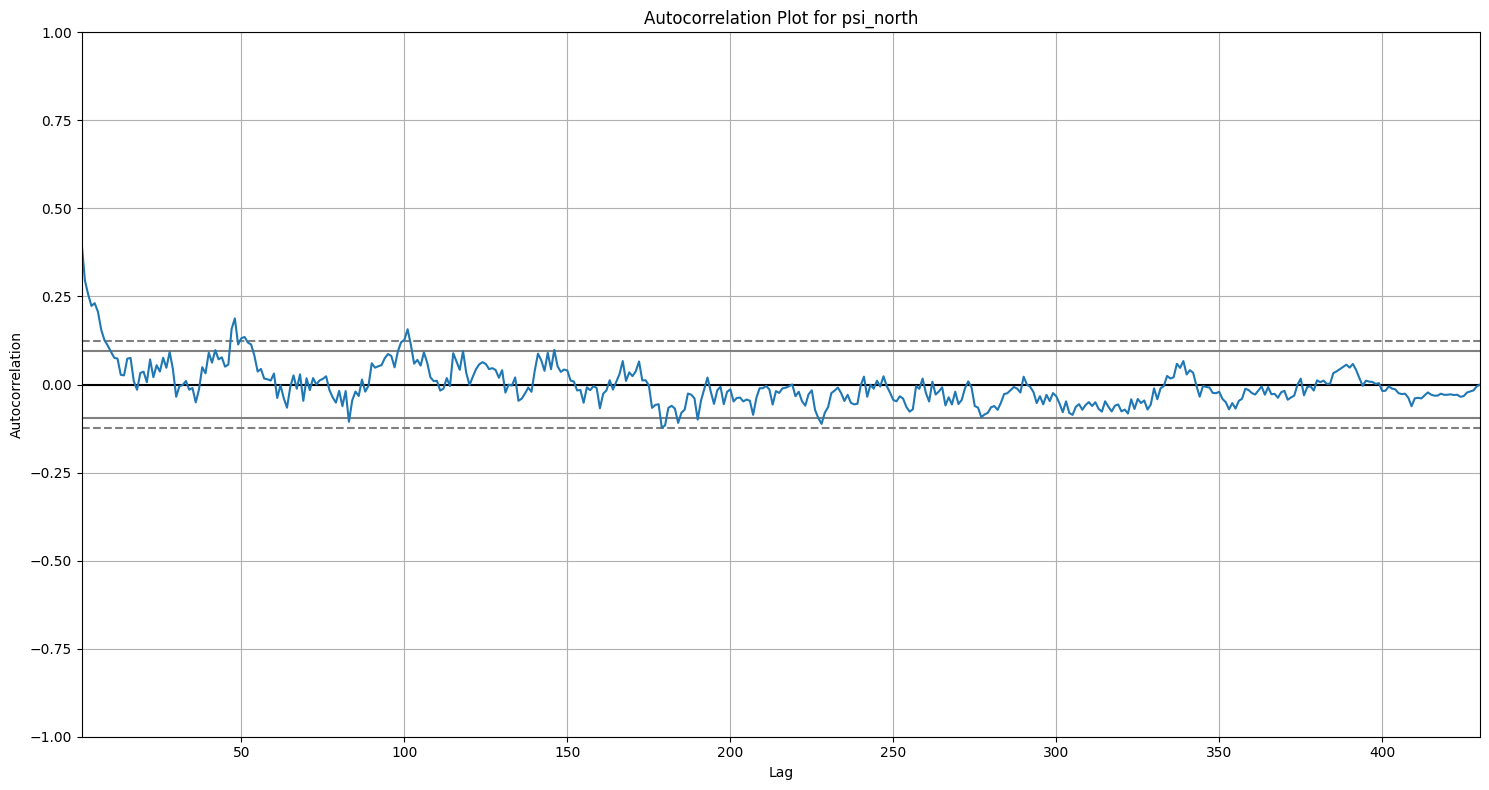

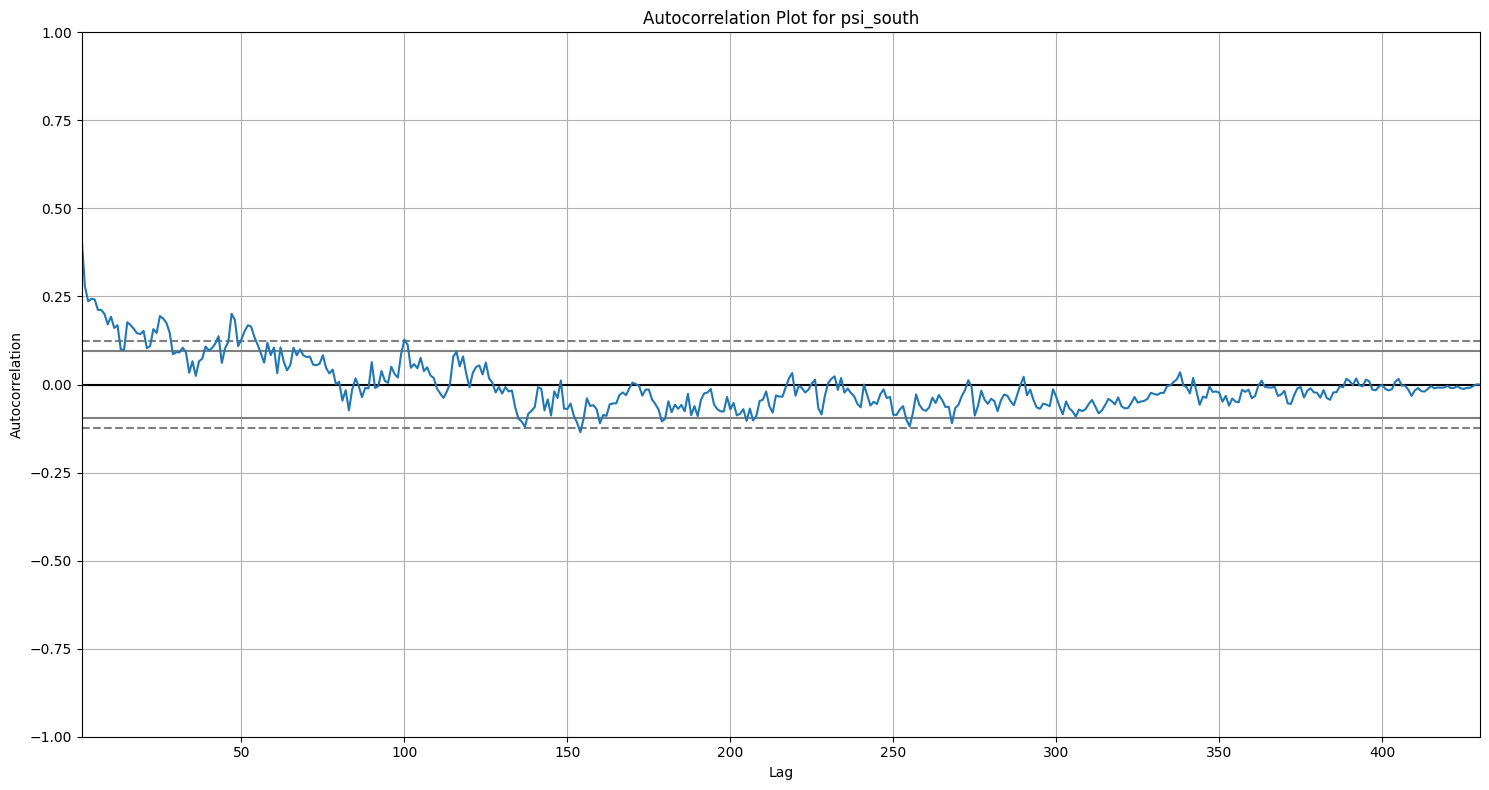

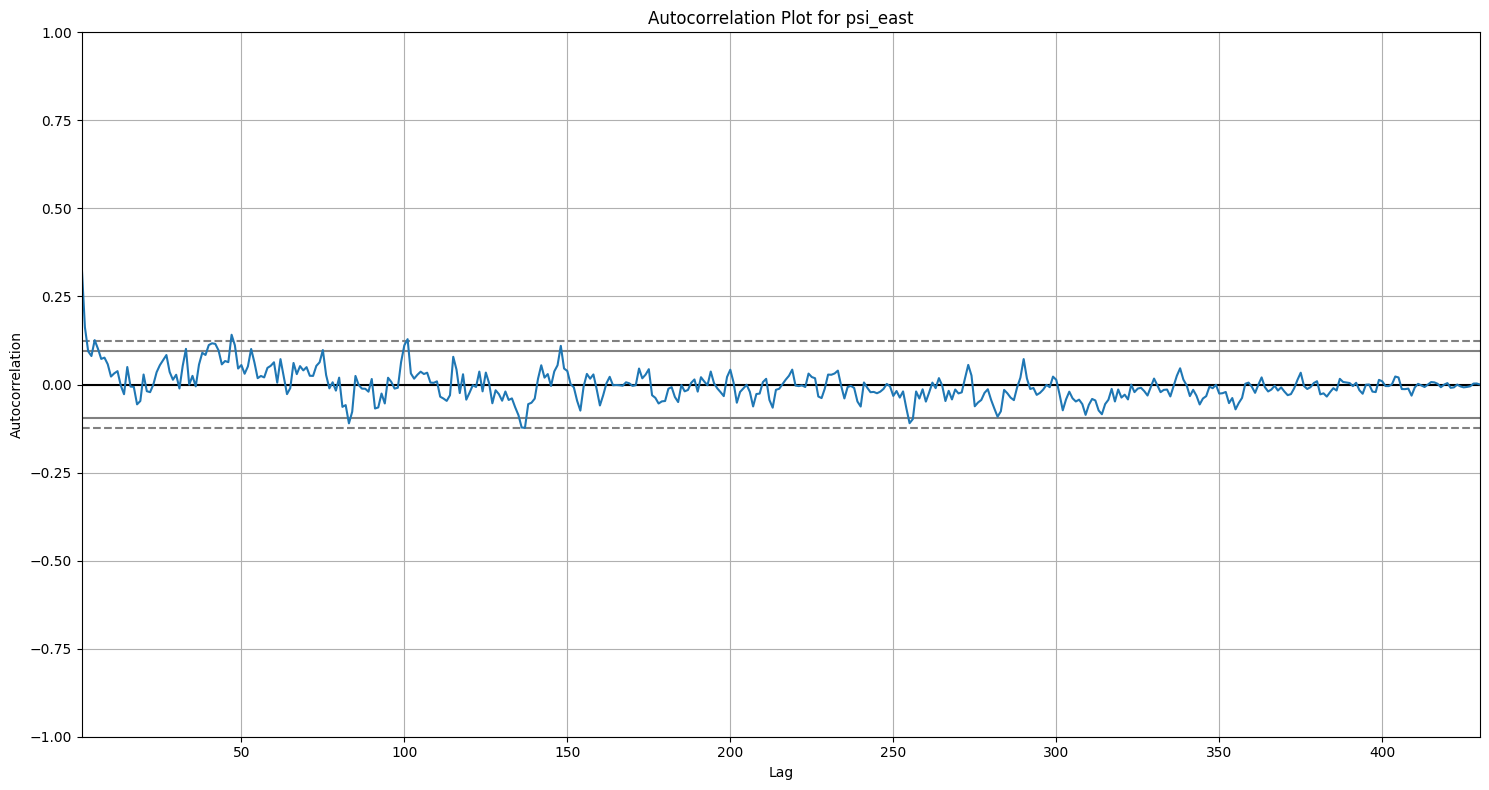

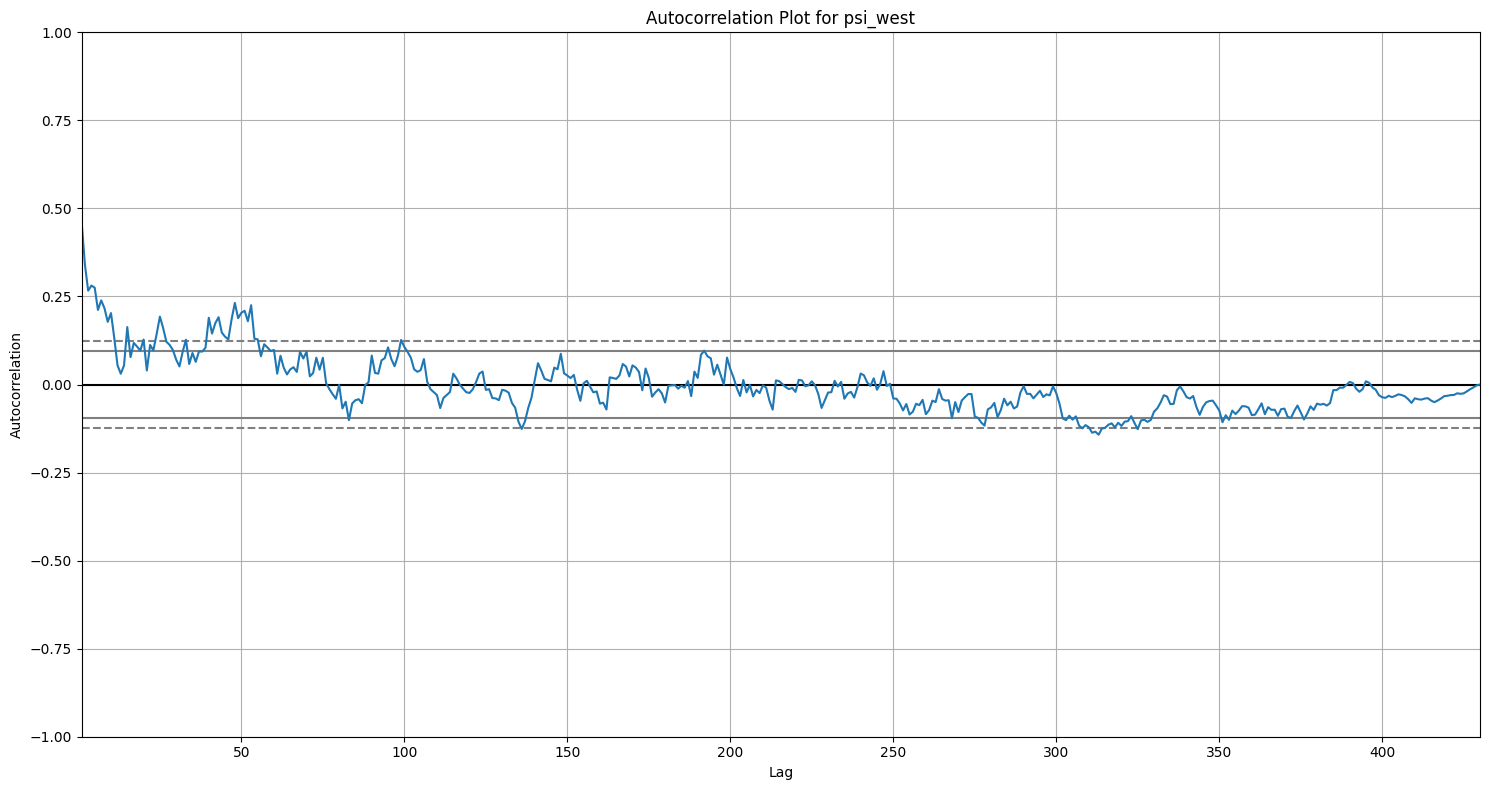

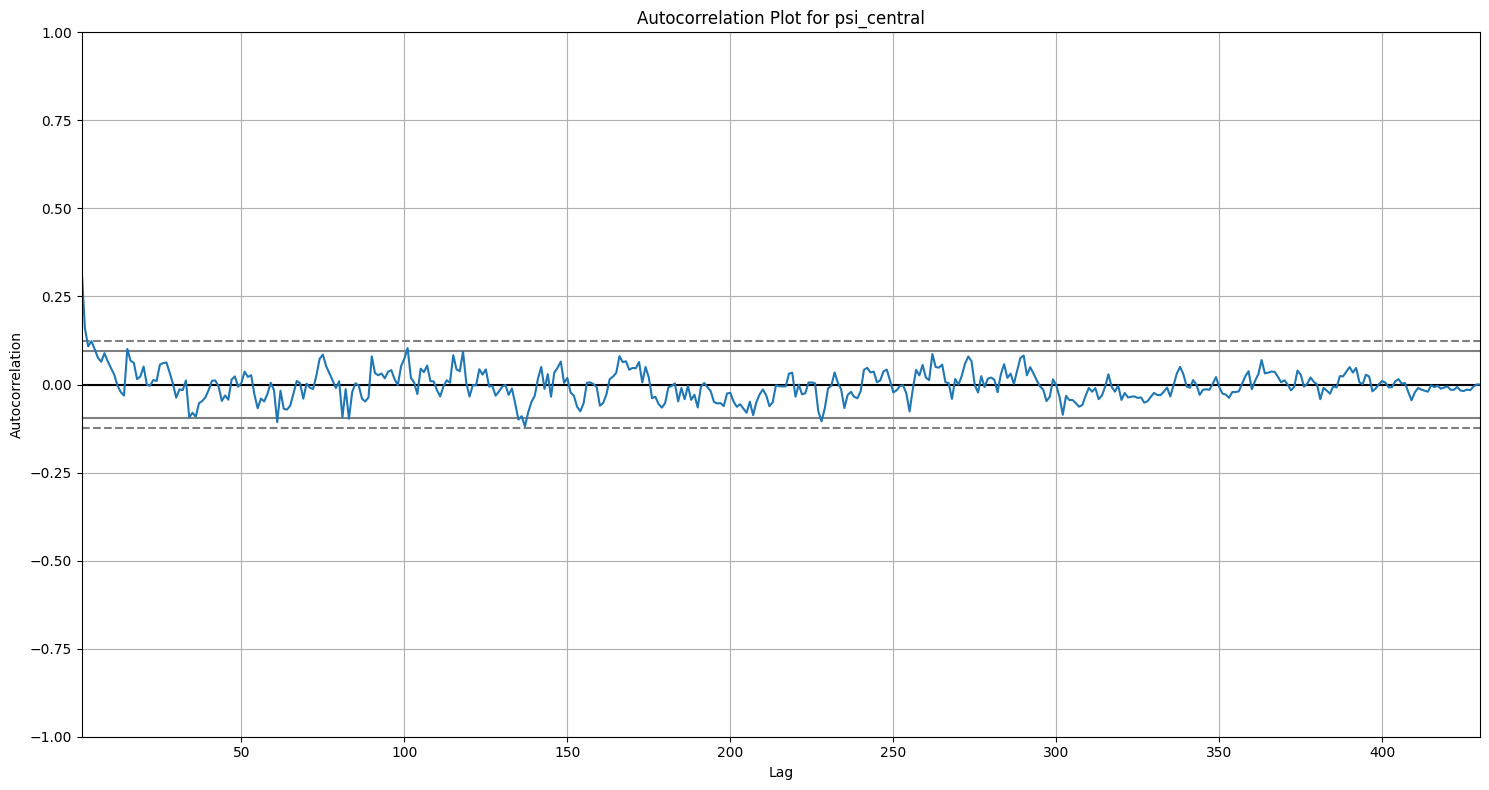

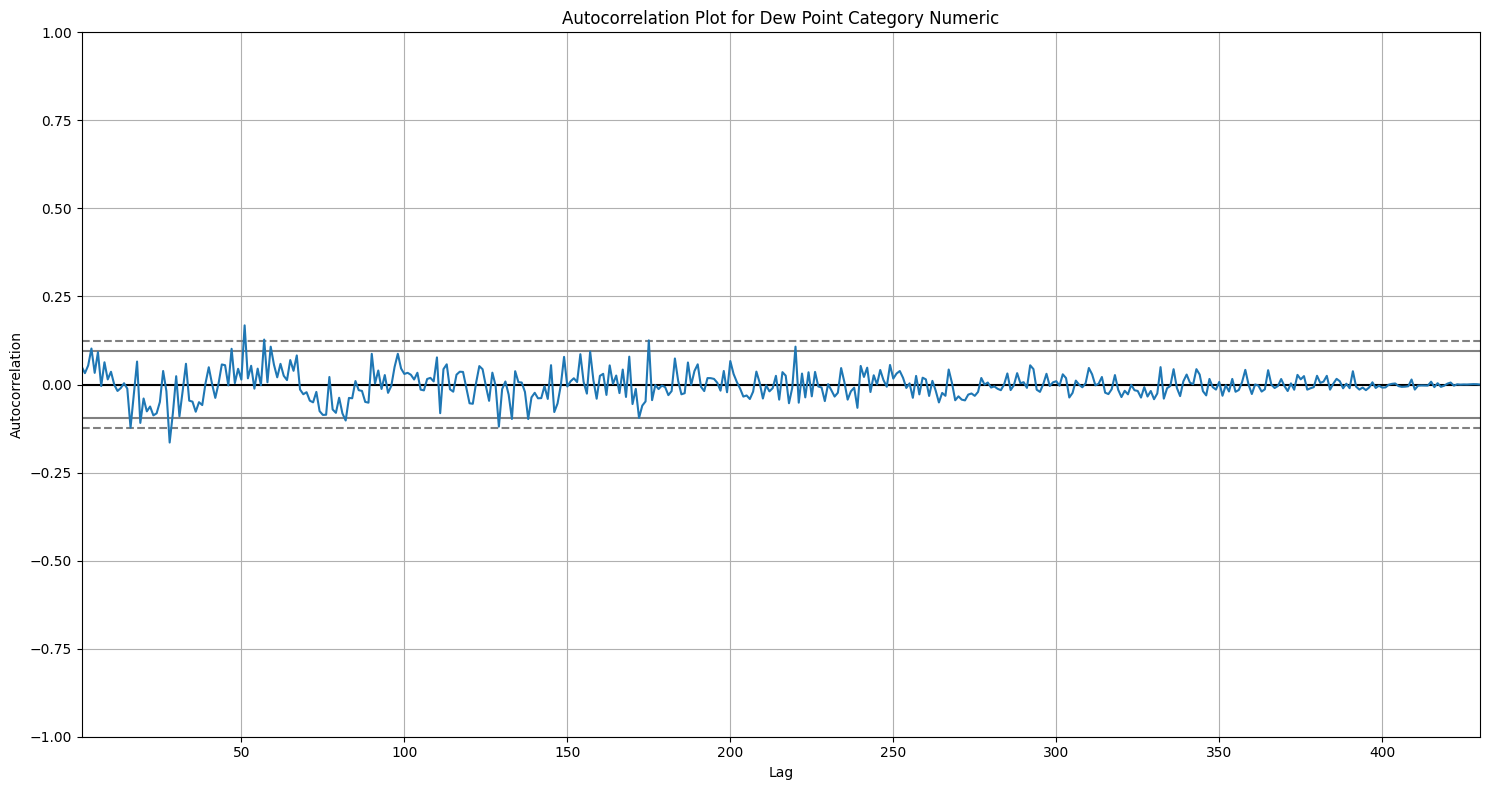

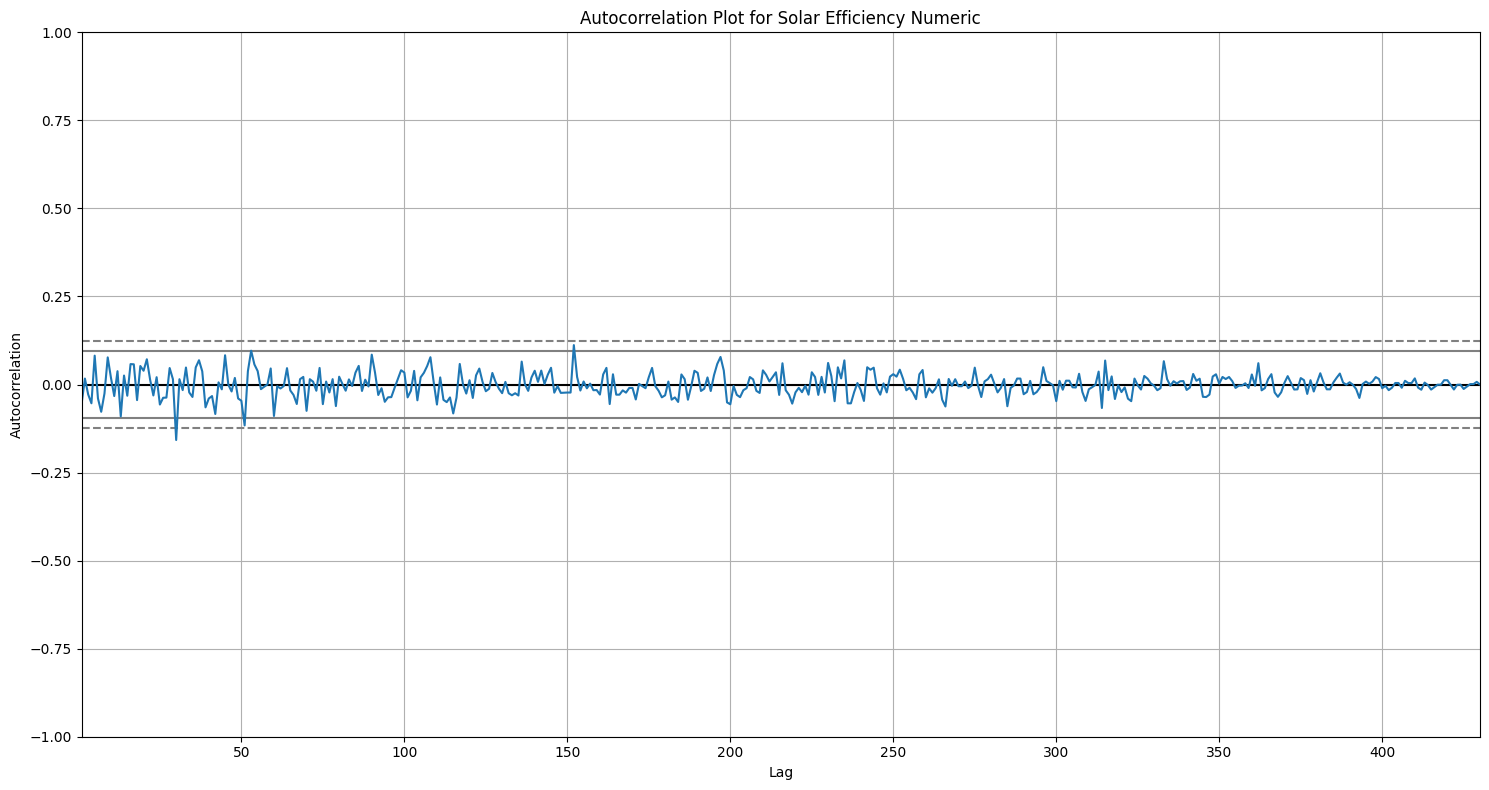

In [61]:
print("\nTime Series Analysis")

for column in eda.df.columns:
    if column not in ['data_ref', 'date', target_variable, 'Dew Point Category', 'Wind Direction', 'Daily Solar Panel Efficiency']:
        eda.time_series_analysis(column)

### Key observations

1. The time series analysis show significant fluctuations over the observed period
2. Several spikes across the data are a recurring pattern
3. THere are no clear long term trend to be observed for any variable
4. The variability of the values seem to be relatively consistent, with no obvious period of sustained high or low variability.

From this, I would remove the date from potential features as it does not seem that temporal patterns lead to any distinguishable patterns